In [1]:
# SARIMAX

In [62]:
import pandas as pd
import pmdarima as pm
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from matplotlib import pyplot as plt

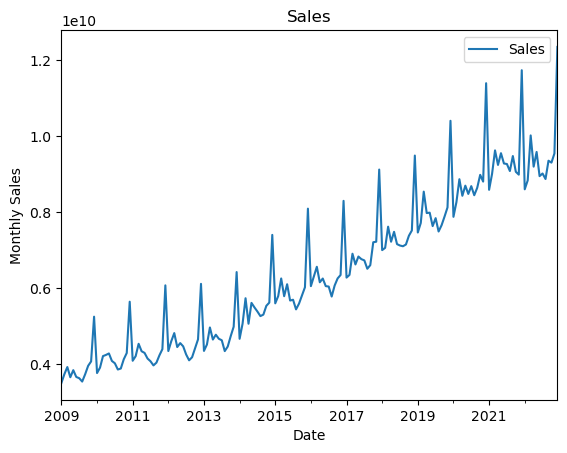

In [64]:
# pandasを使う
df = pd.read_csv("../public/full_monthly_sales.csv", index_col='Month', parse_dates=True)
df.plot()
plt.title('Sales')
plt.ylabel('Monthly Sales')
plt.xlabel('Date')
plt.show()

In [66]:
df_train = df[:120]
df_test = df[120:168]

# 対数変換
df_log = np.log(df).dropna()
df_log_train = df_log[:120]
df_log_test = df_log[120:168]

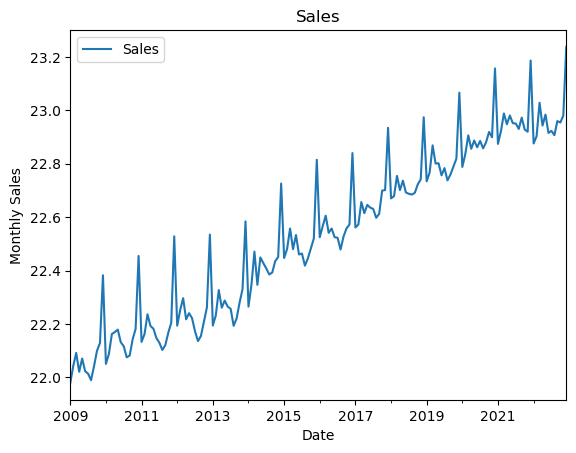

In [545]:
df_log.plot()
plt.title('Sales')
plt.ylabel('Monthly Sales')
plt.xlabel('Date')
plt.show()

In [67]:
# pmdarimaのauto_arima関数を使って、ARIMAモデルを自動構築する。

arima_model = pm.auto_arima(df_log_train, 
                            seasonal=True,
                            m=12,
                            trace=True,
                            n_jobs=-1,
                            maxiter=10)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-456.959, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-157.171, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-300.773, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-158.622, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-300.621, Time=0.18 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-450.683, Time=0.42 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-450.372, Time=0.44 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-449.126, Time=0.42 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-202.900, Time=0.07 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-348.126, Time=0.30 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-458.882, Time=0.40 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=-459.961, Time=0.28 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-451.162, Time=0.18 sec
 ARIMA(1,1,2)(2,0,1)[12]

In [68]:
# 予測
##学習データの期間の予測値
sarimax_train_log_pred = arima_model.predict_in_sample()
##テストデータの期間の予測値
sarimax_test_log_pred, sarimax_test_log_pred_ci = arima_model.predict(
    n_periods=df_log_test.shape[0], 
    return_conf_int=True
)

sarimax_train_pred = np.exp(sarimax_train_log_pred)
sarimax_test_pred = np.exp(sarimax_test_log_pred)

In [69]:
# 元系列に戻してMAPEを計算
print('MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))

MAPE:
0.0382686725025465


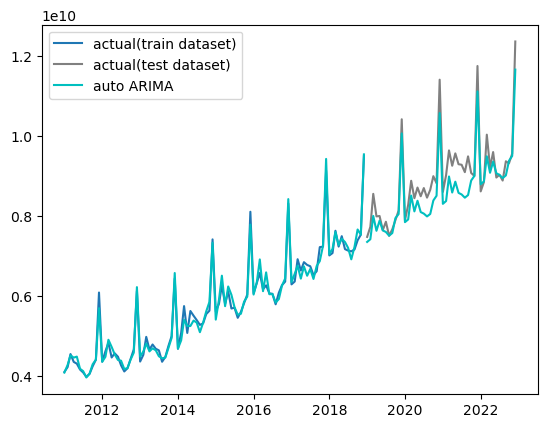

In [70]:
# 元系列のグラフ化
fig, ax = plt.subplots()
ax.plot(df_train[24:].index, df_train[24:].values, label="actual(train dataset)")
ax.plot(df_test.index, df_test.values, label="actual(test dataset)", color="gray")
ax.plot(df_train[24:].index, sarimax_train_pred[24:], color="c")
ax.plot(df_test.index, sarimax_test_pred, label="auto ARIMA", color="c") 
ax.legend()

In [ ]:
#残差の偏自己相関を確認し、12ヶ月の循環成分をモデルが表現できているか確認する

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.15393D+00    |proj g|=  8.64723D+00

At iterate    5    f= -2.02250D+00    |proj g|=  3.18587D+00

At iterate   10    f= -2.05590D+00    |proj g|=  2.06099D-01

At iterate   15    f= -2.05594D+00    |proj g|=  2.45394D-01

At iterate   20    f= -2.05753D+00    |proj g|=  1.78297D+00

At iterate   25    f= -2.05881D+00    |proj g|=  4.90070D-02

At iterate   30    f= -2.06593D+00    |proj g|=  8.98921D-02

At iterate   35    f= -2.06607D+00    |proj g|=  3.00550D-02

At iterate   40    f= -2.06684D+00    |proj g|=  3.72691D-02

At iterate   45    f= -2.06704D+00    |proj g|=  4.17370D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

<BarContainer object of 120 artists>

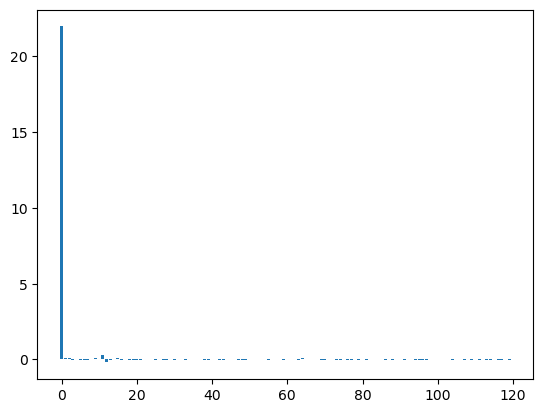

In [542]:
result = SARIMAX(
    df_log_train,
    order=(1,1,1),
    seasonal_order=(2,0,0,12),
    enfore_stationarity=False,
    enforce_invertibility=False
                ).fit()

# 残差の抽出
res = result.resid
# 残差の出力
plt.bar(range(len(res)), res)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


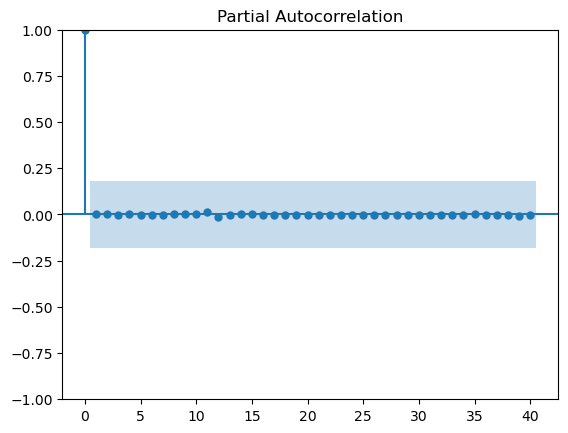

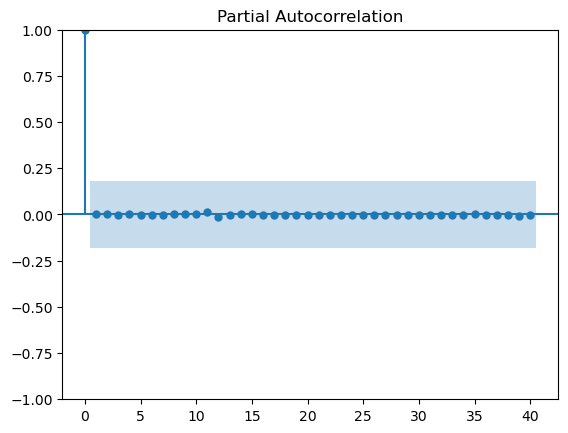

In [543]:
# 偏自己相関の出力
from statsmodels.graphics import tsaplots

tsaplots.plot_pacf(res, lags=40)

In [71]:
# DNN

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, PReLU
from keras_tuner.tuners import RandomSearch

from sklearn.metrics import mean_absolute_percentage_error

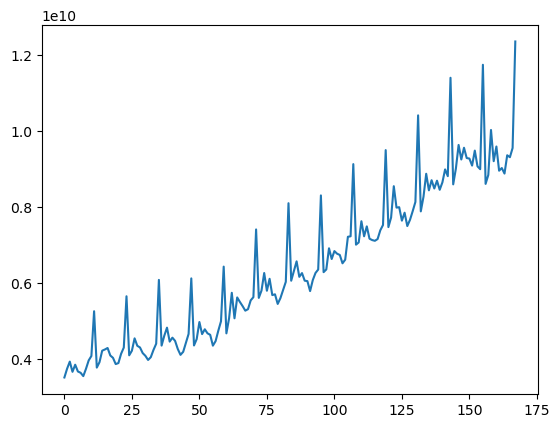

In [2]:
# numpyを使う
# ここでは元系列のまま分析を行う
series = np.loadtxt("../public/full_monthly_sales_without_header.csv")
plt.plot(series)
plt.show()

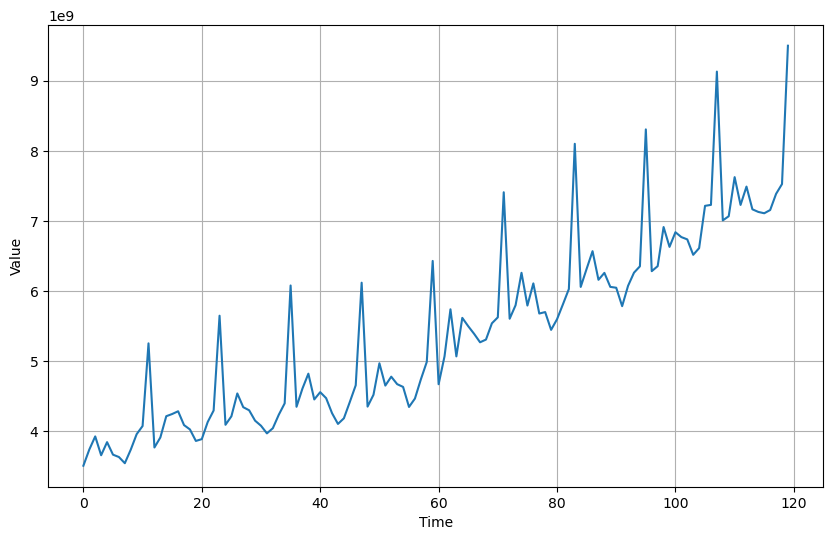

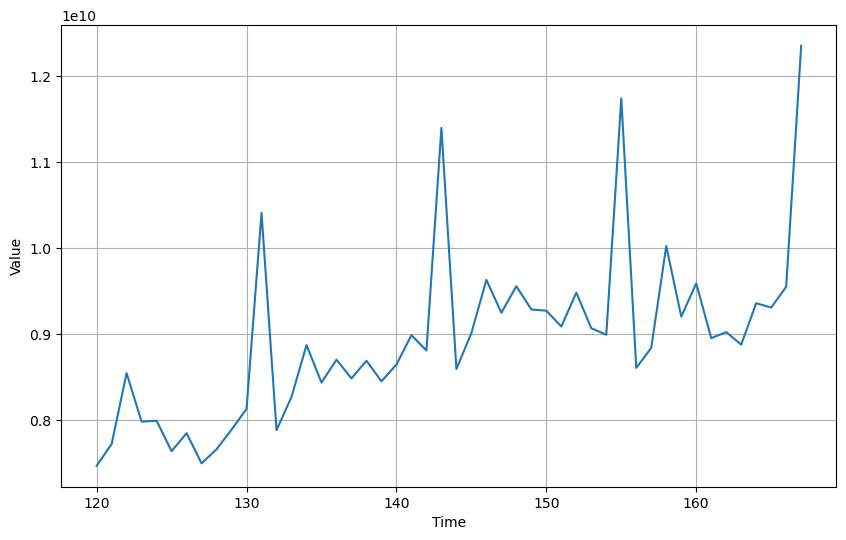

In [3]:
# 前半120時点を学習データ、以降を48時点を検証データとして分割

split_time = 120
time = np.arange(168, dtype="float32")

time_train = time[:split_time]
x_train = series[:split_time]
time_train_pred = time[20:split_time]
time_valid = time[split_time:168]
x_valid = series[split_time:168]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train) # 学習セット
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid) # 検証セット
plt.show()

In [4]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [58]:
# DNN

In [12]:
%%time
# PReLU・エポック数500
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 12ms/step - loss: 57.8941
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 57.2837
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 56.5930
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 55.8965
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 55.1904
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 54.4780
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 53.7566
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 53.0354
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 52.3064
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 51.5688
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 50.8304
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 50.0877
Epoch 13/500
4/4 [==============================

Epoch 104/500
4/4 [==============================] - 0s 3ms/step - loss: 7.0278
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 7.0159
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9922
Epoch 107/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9786
Epoch 108/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9695
Epoch 109/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9551
Epoch 110/500
4/4 [==============================] - 0s 3ms/step - loss: 6.9417
Epoch 111/500
4/4 [==============================] - 0s 3ms/step - loss: 6.9415
Epoch 112/500
4/4 [==============================] - 0s 4ms/step - loss: 6.9184
Epoch 113/500
4/4 [==============================] - 0s 3ms/step - loss: 6.9053
Epoch 114/500
4/4 [==============================] - 0s 3ms/step - loss: 6.8922
Epoch 115/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8874
Epoch 116/500
4/4 [=====================

4/4 [==============================] - 0s 2ms/step - loss: 5.8512
Epoch 309/500
4/4 [==============================] - 0s 4ms/step - loss: 5.8483
Epoch 310/500
4/4 [==============================] - 0s 9ms/step - loss: 5.8433
Epoch 311/500
4/4 [==============================] - 0s 5ms/step - loss: 5.8408
Epoch 312/500
4/4 [==============================] - 0s 3ms/step - loss: 5.8438
Epoch 313/500
4/4 [==============================] - 0s 5ms/step - loss: 5.8346
Epoch 314/500
4/4 [==============================] - 0s 3ms/step - loss: 5.8304
Epoch 315/500
4/4 [==============================] - 0s 6ms/step - loss: 5.8329
Epoch 316/500
4/4 [==============================] - 0s 7ms/step - loss: 5.8285
Epoch 317/500
4/4 [==============================] - 0s 4ms/step - loss: 5.8286
Epoch 318/500
4/4 [==============================] - 0s 3ms/step - loss: 5.8273
Epoch 319/500
4/4 [==============================] - 0s 3ms/step - loss: 5.8247
Epoch 320/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 18ms/step


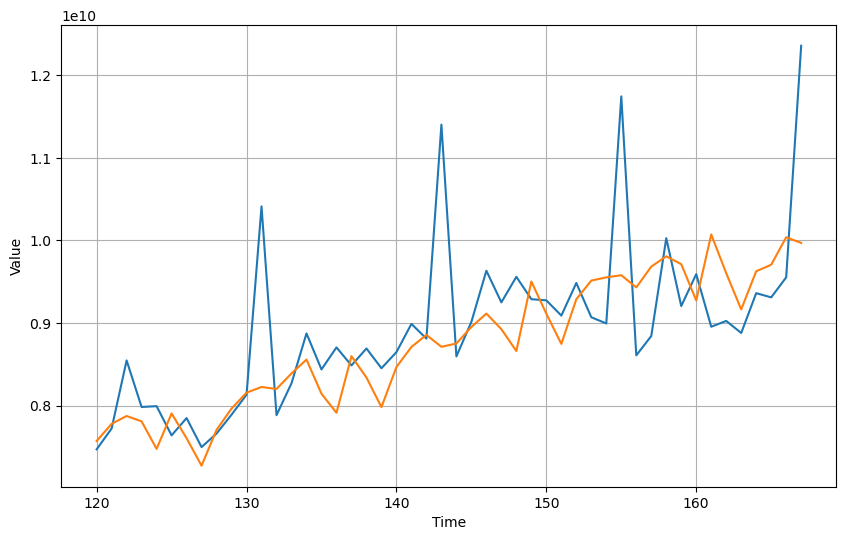

In [13]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [14]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.053474064268647335


In [15]:
%%time
# PReLU・エポック数500
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 13ms/step - loss: 111.5980
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 111.2753
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 110.8977
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 110.5159
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 110.1371
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 109.7578
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 109.3802
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 109.0061
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 108.6298
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 108.2520
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 107.8749
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 107.4998
Epoch 13/500
4/4 [==============================

4/4 [==============================] - 0s 5ms/step - loss: 80.9248
Epoch 104/500
4/4 [==============================] - 0s 6ms/step - loss: 80.6716
Epoch 105/500
4/4 [==============================] - 0s 3ms/step - loss: 80.4207
Epoch 106/500
4/4 [==============================] - 0s 5ms/step - loss: 80.1687
Epoch 107/500
4/4 [==============================] - 0s 6ms/step - loss: 79.9137
Epoch 108/500
4/4 [==============================] - 0s 4ms/step - loss: 79.6579
Epoch 109/500
4/4 [==============================] - 0s 4ms/step - loss: 79.3986
Epoch 110/500
4/4 [==============================] - 0s 4ms/step - loss: 79.1400
Epoch 111/500
4/4 [==============================] - 0s 4ms/step - loss: 78.8810
Epoch 112/500
4/4 [==============================] - 0s 4ms/step - loss: 78.6214
Epoch 113/500
4/4 [==============================] - 0s 4ms/step - loss: 78.3563
Epoch 114/500
4/4 [==============================] - 0s 12ms/step - loss: 78.0952
Epoch 115/500
4/4 [======================

4/4 [==============================] - 0s 5ms/step - loss: 7.2980
Epoch 306/500
4/4 [==============================] - 0s 4ms/step - loss: 7.2856
Epoch 307/500
4/4 [==============================] - 0s 18ms/step - loss: 7.2691
Epoch 308/500
4/4 [==============================] - 0s 8ms/step - loss: 7.2595
Epoch 309/500
4/4 [==============================] - 0s 4ms/step - loss: 7.2529
Epoch 310/500
4/4 [==============================] - 0s 4ms/step - loss: 7.2523
Epoch 311/500
4/4 [==============================] - 0s 4ms/step - loss: 7.2549
Epoch 312/500
4/4 [==============================] - 0s 4ms/step - loss: 7.2570
Epoch 313/500
4/4 [==============================] - 0s 4ms/step - loss: 7.2529
Epoch 314/500
4/4 [==============================] - 0s 5ms/step - loss: 7.2455
Epoch 315/500
4/4 [==============================] - 0s 3ms/step - loss: 7.2418
Epoch 316/500
4/4 [==============================] - 0s 5ms/step - loss: 7.2380
Epoch 317/500
4/4 [==============================] - 

1/1 [==============================] - 0s 24ms/step


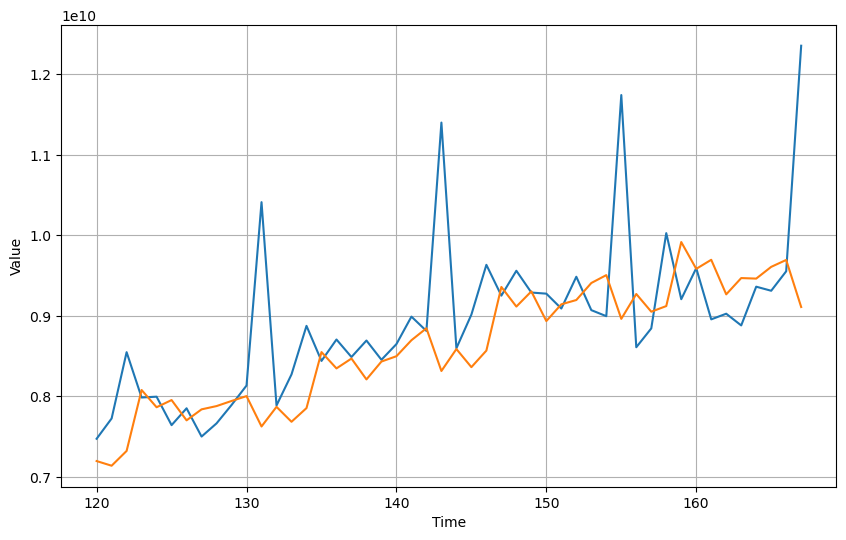

In [16]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [17]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.057266794317636406


In [18]:
%%time
# PReLU・エポック数1000
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.5))
model.fit(dataset,epochs=1000,verbose=1)

Epoch 1/1000


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 33ms/step - loss: 132.3694
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 132.0591
Epoch 3/1000
4/4 [==============================] - 0s 19ms/step - loss: 131.7025
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 131.3486
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 130.9979
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 130.6495
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 130.2995
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 129.9546
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 129.6092
Epoch 10/1000
4/4 [==============================] - 0s 5ms/step - loss: 129.2705
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 128.9285
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 128.5855
Epoch 13/1000
4/4 [================

4/4 [==============================] - 0s 3ms/step - loss: 104.8150
Epoch 102/1000
4/4 [==============================] - 0s 3ms/step - loss: 104.5949
Epoch 103/1000
4/4 [==============================] - 0s 2ms/step - loss: 104.3788
Epoch 104/1000
4/4 [==============================] - 0s 3ms/step - loss: 104.1637
Epoch 105/1000
4/4 [==============================] - 0s 6ms/step - loss: 103.9477
Epoch 106/1000
4/4 [==============================] - 0s 4ms/step - loss: 103.7317
Epoch 107/1000
4/4 [==============================] - 0s 4ms/step - loss: 103.5192
Epoch 108/1000
4/4 [==============================] - 0s 4ms/step - loss: 103.3085
Epoch 109/1000
4/4 [==============================] - 0s 4ms/step - loss: 103.0991
Epoch 110/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.8895
Epoch 111/1000
4/4 [==============================] - 0s 3ms/step - loss: 102.6824
Epoch 112/1000
4/4 [==============================] - 0s 3ms/step - loss: 102.4752
Epoch 113/1000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 59.3988
Epoch 301/1000
4/4 [==============================] - 0s 2ms/step - loss: 59.0754
Epoch 302/1000
4/4 [==============================] - 0s 2ms/step - loss: 58.7469
Epoch 303/1000
4/4 [==============================] - 0s 2ms/step - loss: 58.4159
Epoch 304/1000
4/4 [==============================] - 0s 2ms/step - loss: 58.0794
Epoch 305/1000
4/4 [==============================] - 0s 2ms/step - loss: 57.7451
Epoch 306/1000
4/4 [==============================] - 0s 3ms/step - loss: 57.4080
Epoch 307/1000
4/4 [==============================] - 0s 3ms/step - loss: 57.0672
Epoch 308/1000
4/4 [==============================] - 0s 3ms/step - loss: 56.7260
Epoch 309/1000
4/4 [==============================] - 0s 2ms/step - loss: 56.3838
Epoch 310/1000
4/4 [==============================] - 0s 3ms/step - loss: 56.0391
Epoch 311/1000
4/4 [==============================] - 0s 3ms/step - loss: 55.6908
Epoch 312/1000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 12.3288
Epoch 401/1000
4/4 [==============================] - 0s 3ms/step - loss: 11.6943
Epoch 402/1000
4/4 [==============================] - 0s 3ms/step - loss: 11.0545
Epoch 403/1000
4/4 [==============================] - 0s 3ms/step - loss: 10.4271
Epoch 404/1000
4/4 [==============================] - 0s 3ms/step - loss: 9.8153
Epoch 405/1000
4/4 [==============================] - 0s 3ms/step - loss: 9.2215
Epoch 406/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.6674
Epoch 407/1000
4/4 [==============================] - 0s 3ms/step - loss: 8.2537
Epoch 408/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.9606
Epoch 409/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.7005
Epoch 410/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.4573
Epoch 411/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1995
Epoch 412/1000
4/4 [===================

4/4 [==============================] - 0s 2ms/step - loss: 5.6842
Epoch 603/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.6848
Epoch 604/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.6829
Epoch 605/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.6811
Epoch 606/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.6788
Epoch 607/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.6737
Epoch 608/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.6747
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.6729
Epoch 610/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.6685
Epoch 611/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.6688
Epoch 612/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.6670
Epoch 613/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.6651
Epoch 614/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 5.4913
Epoch 805/1000
4/4 [==============================] - 0s 45ms/step - loss: 5.4907
Epoch 806/1000
4/4 [==============================] - 0s 7ms/step - loss: 5.4881
Epoch 807/1000
4/4 [==============================] - 0s 5ms/step - loss: 5.4921
Epoch 808/1000
4/4 [==============================] - 0s 4ms/step - loss: 5.4859
Epoch 809/1000
4/4 [==============================] - 0s 5ms/step - loss: 5.4960
Epoch 810/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.4921
Epoch 811/1000
4/4 [==============================] - 0s 5ms/step - loss: 5.4910
Epoch 812/1000
4/4 [==============================] - 0s 5ms/step - loss: 5.4907
Epoch 813/1000
4/4 [==============================] - 0s 5ms/step - loss: 5.4912
Epoch 814/1000
4/4 [==============================] - 0s 8ms/step - loss: 5.4964
Epoch 815/1000
4/4 [==============================] - 0s 4ms/step - loss: 5.4876
Epoch 816/1000
4/4 [======================

1/1 [==============================] - 0s 58ms/step


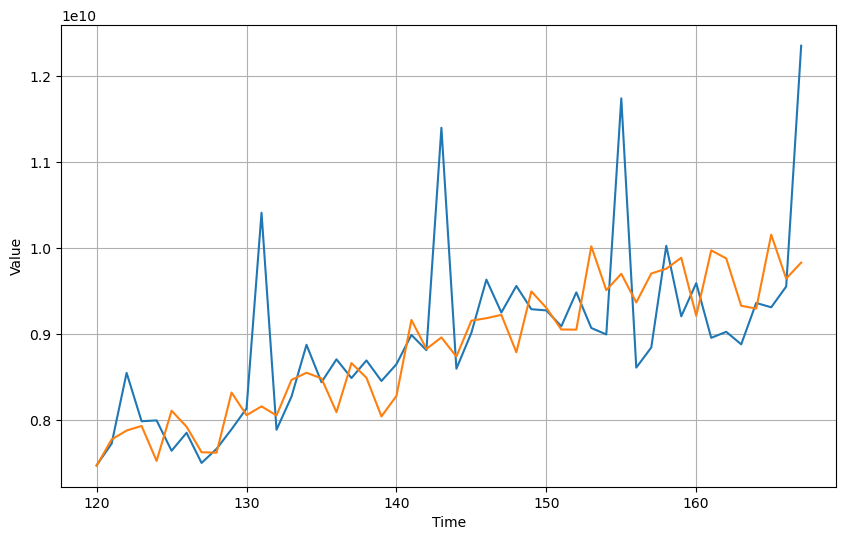

In [19]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [20]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.05255742040203675


In [21]:
%%time
# PReLU・エポック数2000
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.5))
model.fit(dataset,epochs=2000,verbose=1)

Epoch 1/2000


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 15ms/step - loss: 132.0611
Epoch 2/2000
4/4 [==============================] - 0s 6ms/step - loss: 130.4130
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 128.5289
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 126.6014
Epoch 5/2000
4/4 [==============================] - 0s 43ms/step - loss: 124.6160
Epoch 6/2000
4/4 [==============================] - 0s 6ms/step - loss: 122.6274
Epoch 7/2000
4/4 [==============================] - 0s 4ms/step - loss: 120.6790
Epoch 8/2000
4/4 [==============================] - 0s 4ms/step - loss: 118.7033
Epoch 9/2000
4/4 [==============================] - 0s 8ms/step - loss: 116.7093
Epoch 10/2000
4/4 [==============================] - 0s 3ms/step - loss: 114.7081
Epoch 11/2000
4/4 [==============================] - 0s 3ms/step - loss: 112.7116
Epoch 12/2000
4/4 [==============================] - 0s 7ms/step - loss: 110.7429
Epoch 13/2000
4/4 [=================

4/4 [==============================] - 0s 3ms/step - loss: 6.3792
Epoch 204/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.3690
Epoch 205/2000
4/4 [==============================] - 0s 6ms/step - loss: 6.3635
Epoch 206/2000
4/4 [==============================] - 0s 3ms/step - loss: 6.3627
Epoch 207/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.3629
Epoch 208/2000
4/4 [==============================] - 0s 4ms/step - loss: 6.3657
Epoch 209/2000
4/4 [==============================] - 0s 3ms/step - loss: 6.3674
Epoch 210/2000
4/4 [==============================] - 0s 3ms/step - loss: 6.3730
Epoch 211/2000
4/4 [==============================] - 0s 3ms/step - loss: 6.3719
Epoch 212/2000
4/4 [==============================] - 0s 5ms/step - loss: 6.3682
Epoch 213/2000
4/4 [==============================] - 0s 5ms/step - loss: 6.3650
Epoch 214/2000
4/4 [==============================] - 0s 4ms/step - loss: 6.3607
Epoch 215/2000
4/4 [=======================

4/4 [==============================] - 0s 6ms/step - loss: 6.1373
Epoch 406/2000
4/4 [==============================] - 0s 3ms/step - loss: 6.1354
Epoch 407/2000
4/4 [==============================] - 0s 5ms/step - loss: 6.1389
Epoch 408/2000
4/4 [==============================] - 0s 4ms/step - loss: 6.1366
Epoch 409/2000
4/4 [==============================] - 0s 5ms/step - loss: 6.1313
Epoch 410/2000
4/4 [==============================] - 0s 4ms/step - loss: 6.1344
Epoch 411/2000
4/4 [==============================] - 0s 7ms/step - loss: 6.1336
Epoch 412/2000
4/4 [==============================] - 0s 5ms/step - loss: 6.1423
Epoch 413/2000
4/4 [==============================] - 0s 4ms/step - loss: 6.1320
Epoch 414/2000
4/4 [==============================] - 0s 4ms/step - loss: 6.1288
Epoch 415/2000
4/4 [==============================] - 0s 5ms/step - loss: 6.1295
Epoch 416/2000
4/4 [==============================] - 0s 4ms/step - loss: 6.1297
Epoch 417/2000
4/4 [=======================

4/4 [==============================] - 0s 8ms/step - loss: 6.0955
Epoch 507/2000
4/4 [==============================] - 0s 4ms/step - loss: 6.0902
Epoch 508/2000
4/4 [==============================] - 0s 4ms/step - loss: 6.0807
Epoch 509/2000
4/4 [==============================] - 0s 3ms/step - loss: 6.0887
Epoch 510/2000
4/4 [==============================] - 0s 4ms/step - loss: 6.0841
Epoch 511/2000
4/4 [==============================] - 0s 5ms/step - loss: 6.0807
Epoch 512/2000
4/4 [==============================] - 0s 5ms/step - loss: 6.0842
Epoch 513/2000
4/4 [==============================] - 0s 3ms/step - loss: 6.0793
Epoch 514/2000
4/4 [==============================] - 0s 8ms/step - loss: 6.0795
Epoch 515/2000
4/4 [==============================] - 0s 11ms/step - loss: 6.0829
Epoch 516/2000
4/4 [==============================] - 0s 5ms/step - loss: 6.0793
Epoch 517/2000
4/4 [==============================] - 0s 8ms/step - loss: 6.0859
Epoch 518/2000
4/4 [======================

4/4 [==============================] - 0s 5ms/step - loss: 6.0496
Epoch 608/2000
4/4 [==============================] - 0s 11ms/step - loss: 6.0467
Epoch 609/2000
4/4 [==============================] - 0s 7ms/step - loss: 6.0386
Epoch 610/2000
4/4 [==============================] - 0s 5ms/step - loss: 6.0355
Epoch 611/2000
4/4 [==============================] - 0s 6ms/step - loss: 6.0315
Epoch 612/2000
4/4 [==============================] - 0s 5ms/step - loss: 6.0276
Epoch 613/2000
4/4 [==============================] - 0s 5ms/step - loss: 6.0292
Epoch 614/2000
4/4 [==============================] - 0s 7ms/step - loss: 6.0288
Epoch 615/2000
4/4 [==============================] - 0s 3ms/step - loss: 6.0325
Epoch 616/2000
4/4 [==============================] - 0s 9ms/step - loss: 6.0268
Epoch 617/2000
4/4 [==============================] - 0s 8ms/step - loss: 6.0269
Epoch 618/2000
4/4 [==============================] - 0s 12ms/step - loss: 6.0296
Epoch 619/2000
4/4 [=====================

4/4 [==============================] - 0s 6ms/step - loss: 5.9846
Epoch 709/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.9803
Epoch 710/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.9774
Epoch 711/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.9771
Epoch 712/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.9780
Epoch 713/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.9897
Epoch 714/2000
4/4 [==============================] - 0s 15ms/step - loss: 5.9834
Epoch 715/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.9827
Epoch 716/2000
4/4 [==============================] - 0s 9ms/step - loss: 5.9837
Epoch 717/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.9866
Epoch 718/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.9873
Epoch 719/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.9736
Epoch 720/2000
4/4 [======================

4/4 [==============================] - 0s 4ms/step - loss: 5.9448
Epoch 810/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.9298
Epoch 811/2000
4/4 [==============================] - 0s 21ms/step - loss: 5.9173
Epoch 812/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.9084
Epoch 813/2000
4/4 [==============================] - 0s 10ms/step - loss: 5.9154
Epoch 814/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.9104
Epoch 815/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.9112
Epoch 816/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.9083
Epoch 817/2000
4/4 [==============================] - 0s 9ms/step - loss: 5.9068
Epoch 818/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.9075
Epoch 819/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.9058
Epoch 820/2000
4/4 [==============================] - 0s 9ms/step - loss: 5.9059
Epoch 821/2000
4/4 [=====================

4/4 [==============================] - 0s 4ms/step - loss: 5.8733
Epoch 911/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.8773
Epoch 912/2000
4/4 [==============================] - 0s 26ms/step - loss: 5.8725
Epoch 913/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.8677
Epoch 914/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.8676
Epoch 915/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.8686
Epoch 916/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.8678
Epoch 917/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.8670
Epoch 918/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.8661
Epoch 919/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.8652
Epoch 920/2000
4/4 [==============================] - 0s 10ms/step - loss: 5.8645
Epoch 921/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.8687
Epoch 922/2000
4/4 [=====================

4/4 [==============================] - 0s 4ms/step - loss: 5.8241
Epoch 1012/2000
4/4 [==============================] - 0s 8ms/step - loss: 5.8234
Epoch 1013/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.8230
Epoch 1014/2000
4/4 [==============================] - 0s 8ms/step - loss: 5.8247
Epoch 1015/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.8251
Epoch 1016/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.8224
Epoch 1017/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.8250
Epoch 1018/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.8171
Epoch 1019/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.8223
Epoch 1020/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.8218
Epoch 1021/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.8183
Epoch 1022/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.8162
Epoch 1023/2000
4/4 [===========

Epoch 1210/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.7016
Epoch 1211/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.7003
Epoch 1212/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.6974
Epoch 1213/2000
4/4 [==============================] - 0s 12ms/step - loss: 5.6962
Epoch 1214/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.6951
Epoch 1215/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.6960
Epoch 1216/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.6942
Epoch 1217/2000
4/4 [==============================] - 0s 8ms/step - loss: 5.6915
Epoch 1218/2000
4/4 [==============================] - 0s 7ms/step - loss: 5.6900
Epoch 1219/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.6878
Epoch 1220/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.6855
Epoch 1221/2000
4/4 [==============================] - 0s 16ms/step - loss: 5.6862
Epoch 1222/200

4/4 [==============================] - 0s 4ms/step - loss: 5.5084
Epoch 1410/2000
4/4 [==============================] - 0s 12ms/step - loss: 5.5078
Epoch 1411/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.5131
Epoch 1412/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.5076
Epoch 1413/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.5112
Epoch 1414/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.5108
Epoch 1415/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.5074
Epoch 1416/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.5087
Epoch 1417/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.5081
Epoch 1418/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.5058
Epoch 1419/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.5061
Epoch 1420/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.5190
Epoch 1421/2000
4/4 [==========

4/4 [==============================] - 0s 7ms/step - loss: 5.4737
Epoch 1510/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.4742
Epoch 1511/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.4757
Epoch 1512/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4722
Epoch 1513/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4747
Epoch 1514/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4734
Epoch 1515/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.4694
Epoch 1516/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4704
Epoch 1517/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.4744
Epoch 1518/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.4685
Epoch 1519/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.4688
Epoch 1520/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.4684
Epoch 1521/2000
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 5.4496
Epoch 1610/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4472
Epoch 1611/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.4463
Epoch 1612/2000
4/4 [==============================] - 0s 7ms/step - loss: 5.4532
Epoch 1613/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4565
Epoch 1614/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4473
Epoch 1615/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4427
Epoch 1616/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4469
Epoch 1617/2000
4/4 [==============================] - 0s 8ms/step - loss: 5.4446
Epoch 1618/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4482
Epoch 1619/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4442
Epoch 1620/2000
4/4 [==============================] - 0s 8ms/step - loss: 5.4434
Epoch 1621/2000
4/4 [===========

Epoch 1709/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4270
Epoch 1710/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4288
Epoch 1711/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4268
Epoch 1712/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.4286
Epoch 1713/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4339
Epoch 1714/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4279
Epoch 1715/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.4277
Epoch 1716/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.4261
Epoch 1717/2000
4/4 [==============================] - 0s 7ms/step - loss: 5.4278
Epoch 1718/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.4290
Epoch 1719/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4251
Epoch 1720/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4346
Epoch 1721/2000


Epoch 1908/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.3906
Epoch 1909/2000
4/4 [==============================] - 0s 6ms/step - loss: 5.3939
Epoch 1910/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.3942
Epoch 1911/2000
4/4 [==============================] - 0s 11ms/step - loss: 5.3923
Epoch 1912/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.3937
Epoch 1913/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.3952
Epoch 1914/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.3932
Epoch 1915/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.3941
Epoch 1916/2000
4/4 [==============================] - 0s 3ms/step - loss: 5.3890
Epoch 1917/2000
4/4 [==============================] - 0s 11ms/step - loss: 5.3946
Epoch 1918/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.4048
Epoch 1919/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.4042
Epoch 1920/200

1/1 [==============================] - 0s 43ms/step


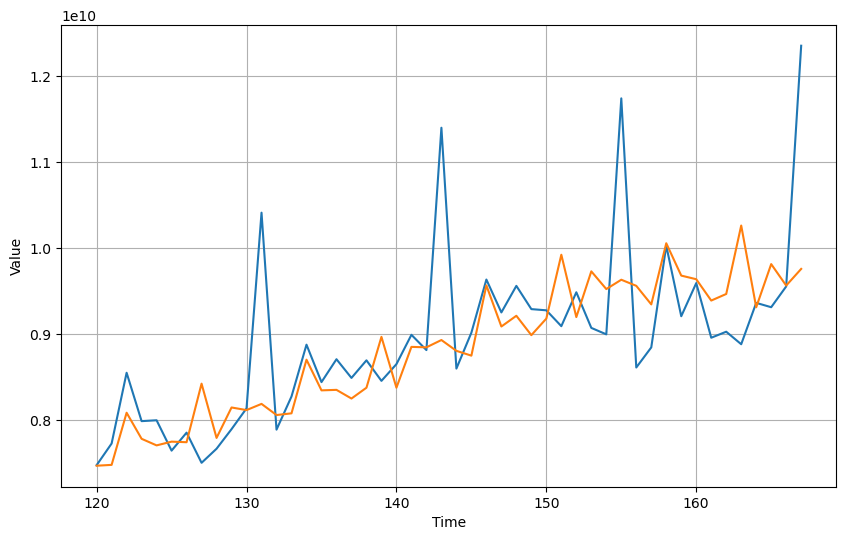

In [22]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [23]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.050368105877037155


Epoch 1/5000
4/4 [==============================] - 0s 11ms/step - loss: 62.5973
Epoch 2/5000
4/4 [==============================] - 0s 4ms/step - loss: 61.8367
Epoch 3/5000
4/4 [==============================] - 0s 2ms/step - loss: 60.9611
Epoch 4/5000
4/4 [==============================] - 0s 3ms/step - loss: 60.0658
Epoch 5/5000
4/4 [==============================] - 0s 3ms/step - loss: 59.1644
Epoch 6/5000
4/4 [==============================] - 0s 3ms/step - loss: 58.2617
Epoch 7/5000
4/4 [==============================] - 0s 3ms/step - loss: 57.3633
Epoch 8/5000
4/4 [==============================] - 0s 3ms/step - loss: 56.4521
Epoch 9/5000
4/4 [==============================] - 0s 3ms/step - loss: 55.5508
Epoch 10/5000
4/4 [==============================] - 0s 3ms/step - loss: 54.6388
Epoch 11/5000
4/4 [==============================] - 0s 3ms/step - loss: 53.7166
Epoch 12/5000
4/4 [==============================] - 0s 7ms/step - loss: 52.7898
Epoch 13/5000
4/4 [=================

4/4 [==============================] - 0s 3ms/step - loss: 11.8299
Epoch 203/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.8239
Epoch 204/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.8086
Epoch 205/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.7984
Epoch 206/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.8030
Epoch 207/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.8015
Epoch 208/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.7946
Epoch 209/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.7925
Epoch 210/5000
4/4 [==============================] - 0s 3ms/step - loss: 11.7884
Epoch 211/5000
4/4 [==============================] - 0s 3ms/step - loss: 11.7903
Epoch 212/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.7918
Epoch 213/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.7858
Epoch 214/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 11.5682
Epoch 303/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.5667
Epoch 304/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.5643
Epoch 305/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.5641
Epoch 306/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.5623
Epoch 307/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.5565
Epoch 308/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.5575
Epoch 309/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.5527
Epoch 310/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.5512
Epoch 311/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.5500
Epoch 312/5000
4/4 [==============================] - 0s 3ms/step - loss: 11.5465
Epoch 313/5000
4/4 [==============================] - 0s 3ms/step - loss: 11.5457
Epoch 314/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 11.3377
Epoch 403/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.3339
Epoch 404/5000
4/4 [==============================] - 0s 3ms/step - loss: 11.3335
Epoch 405/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.3331
Epoch 406/5000
4/4 [==============================] - 0s 3ms/step - loss: 11.3274
Epoch 407/5000
4/4 [==============================] - 0s 4ms/step - loss: 11.3324
Epoch 408/5000
4/4 [==============================] - 0s 3ms/step - loss: 11.3314
Epoch 409/5000
4/4 [==============================] - 0s 3ms/step - loss: 11.3216
Epoch 410/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.3229
Epoch 411/5000
4/4 [==============================] - 0s 1ms/step - loss: 11.3182
Epoch 412/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.3250
Epoch 413/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.3139
Epoch 414/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 11.1301
Epoch 503/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.1231
Epoch 504/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.1220
Epoch 505/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.1209
Epoch 506/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.1184
Epoch 507/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.1131
Epoch 508/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.1160
Epoch 509/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.1120
Epoch 510/5000
4/4 [==============================] - 0s 3ms/step - loss: 11.1206
Epoch 511/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.1072
Epoch 512/5000
4/4 [==============================] - 0s 3ms/step - loss: 11.1076
Epoch 513/5000
4/4 [==============================] - 0s 2ms/step - loss: 11.1069
Epoch 514/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 10.9381
Epoch 603/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.9341
Epoch 604/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.9415
Epoch 605/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.9499
Epoch 606/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.9464
Epoch 607/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.9636
Epoch 608/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.9536
Epoch 609/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.9446
Epoch 610/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.9369
Epoch 611/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.9317
Epoch 612/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.9314
Epoch 613/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.9313
Epoch 614/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 10.7643
Epoch 703/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.7630
Epoch 704/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.7631
Epoch 705/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.7610
Epoch 706/5000
4/4 [==============================] - 0s 1ms/step - loss: 10.7586
Epoch 707/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.7569
Epoch 708/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.7609
Epoch 709/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.7555
Epoch 710/5000
4/4 [==============================] - 0s 3ms/step - loss: 10.7523
Epoch 711/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.7527
Epoch 712/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.7509
Epoch 713/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.7520
Epoch 714/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 10.6129
Epoch 803/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.6021
Epoch 804/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.6022
Epoch 805/5000
4/4 [==============================] - 0s 3ms/step - loss: 10.6043
Epoch 806/5000
4/4 [==============================] - 0s 3ms/step - loss: 10.6035
Epoch 807/5000
4/4 [==============================] - 0s 3ms/step - loss: 10.6034
Epoch 808/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.6044
Epoch 809/5000
4/4 [==============================] - 0s 3ms/step - loss: 10.5961
Epoch 810/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.5933
Epoch 811/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.5907
Epoch 812/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.5919
Epoch 813/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.5880
Epoch 814/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 10.4589
Epoch 903/5000
4/4 [==============================] - 0s 3ms/step - loss: 10.4722
Epoch 904/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.4632
Epoch 905/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.4616
Epoch 906/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.4635
Epoch 907/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.4484
Epoch 908/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.4449
Epoch 909/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.4386
Epoch 910/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.4389
Epoch 911/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.4380
Epoch 912/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.4356
Epoch 913/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.4337
Epoch 914/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 10.3003
Epoch 1003/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.3042
Epoch 1004/5000
4/4 [==============================] - 0s 3ms/step - loss: 10.2966
Epoch 1005/5000
4/4 [==============================] - 0s 3ms/step - loss: 10.2998
Epoch 1006/5000
4/4 [==============================] - 0s 3ms/step - loss: 10.2926
Epoch 1007/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.2954
Epoch 1008/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.2919
Epoch 1009/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.2942
Epoch 1010/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.2916
Epoch 1011/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.2917
Epoch 1012/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.2877
Epoch 1013/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.2874
Epoch 1014/5000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 10.0355
Epoch 1199/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.0328
Epoch 1200/5000
4/4 [==============================] - 0s 3ms/step - loss: 10.0281
Epoch 1201/5000
4/4 [==============================] - 0s 3ms/step - loss: 10.0248
Epoch 1202/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.0194
Epoch 1203/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.0223
Epoch 1204/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.0193
Epoch 1205/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.0182
Epoch 1206/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.0193
Epoch 1207/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.0190
Epoch 1208/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.0181
Epoch 1209/5000
4/4 [==============================] - 0s 2ms/step - loss: 10.0174
Epoch 1210/5000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 9.7731
Epoch 1398/5000
4/4 [==============================] - 0s 4ms/step - loss: 9.7693
Epoch 1399/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.7670
Epoch 1400/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.7655
Epoch 1401/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.7658
Epoch 1402/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.7622
Epoch 1403/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.7696
Epoch 1404/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.7650
Epoch 1405/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.7657
Epoch 1406/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.7618
Epoch 1407/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.7611
Epoch 1408/5000
4/4 [==============================] - 0s 4ms/step - loss: 9.7586
Epoch 1409/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 9.6498
Epoch 1498/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.6484
Epoch 1499/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.6515
Epoch 1500/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.6474
Epoch 1501/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.6480
Epoch 1502/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.6397
Epoch 1503/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.6389
Epoch 1504/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.6406
Epoch 1505/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.6397
Epoch 1506/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.6369
Epoch 1507/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.6359
Epoch 1508/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.6345
Epoch 1509/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 9.5321
Epoch 1598/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.5321
Epoch 1599/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.5301
Epoch 1600/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.5370
Epoch 1601/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.5286
Epoch 1602/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.5226
Epoch 1603/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.5243
Epoch 1604/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.5199
Epoch 1605/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.5208
Epoch 1606/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.5204
Epoch 1607/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.5205
Epoch 1608/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.5343
Epoch 1609/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 9.4173
Epoch 1698/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.4150
Epoch 1699/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.4141
Epoch 1700/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.4136
Epoch 1701/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.4101
Epoch 1702/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.4147
Epoch 1703/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.4091
Epoch 1704/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.4101
Epoch 1705/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.4105
Epoch 1706/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.4072
Epoch 1707/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.4057
Epoch 1708/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.4073
Epoch 1709/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 9.3281
Epoch 1798/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.3153
Epoch 1799/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.3110
Epoch 1800/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.3156
Epoch 1801/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.3129
Epoch 1802/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.3084
Epoch 1803/5000
4/4 [==============================] - 0s 4ms/step - loss: 9.3001
Epoch 1804/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.3014
Epoch 1805/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.3007
Epoch 1806/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.3000
Epoch 1807/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.2989
Epoch 1808/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.3016
Epoch 1809/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 9.2175
Epoch 1898/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.2121
Epoch 1899/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.2042
Epoch 1900/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.2034
Epoch 1901/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.2107
Epoch 1902/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.2039
Epoch 1903/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.2073
Epoch 1904/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.2102
Epoch 1905/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.1970
Epoch 1906/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.1962
Epoch 1907/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.1962
Epoch 1908/5000
4/4 [==============================] - 0s 4ms/step - loss: 9.1969
Epoch 1909/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 9.0981
Epoch 1998/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.1041
Epoch 1999/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.0998
Epoch 2000/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.0948
Epoch 2001/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.0961
Epoch 2002/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.0970
Epoch 2003/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.0935
Epoch 2004/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.1009
Epoch 2005/5000
4/4 [==============================] - 0s 3ms/step - loss: 9.0918
Epoch 2006/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.0908
Epoch 2007/5000
4/4 [==============================] - 0s 2ms/step - loss: 9.0928
Epoch 2008/5000
4/4 [==============================] - 0s 1ms/step - loss: 9.0924
Epoch 2009/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 8.9965
Epoch 2098/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.9941
Epoch 2099/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.9963
Epoch 2100/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.9970
Epoch 2101/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.9954
Epoch 2102/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.9949
Epoch 2103/5000
4/4 [==============================] - 0s 1ms/step - loss: 8.9926
Epoch 2104/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.9901
Epoch 2105/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.9887
Epoch 2106/5000
4/4 [==============================] - 0s 1ms/step - loss: 8.9905
Epoch 2107/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.9890
Epoch 2108/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.9849
Epoch 2109/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 8.9018
Epoch 2198/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8991
Epoch 2199/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.9057
Epoch 2200/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8965
Epoch 2201/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8925
Epoch 2202/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8923
Epoch 2203/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8924
Epoch 2204/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.9031
Epoch 2205/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8997
Epoch 2206/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8947
Epoch 2207/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8904
Epoch 2208/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8892
Epoch 2209/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 8.8080
Epoch 2298/5000
4/4 [==============================] - 0s 4ms/step - loss: 8.8113
Epoch 2299/5000
4/4 [==============================] - 0s 4ms/step - loss: 8.8148
Epoch 2300/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.8096
Epoch 2301/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8077
Epoch 2302/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8088
Epoch 2303/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8085
Epoch 2304/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8199
Epoch 2305/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8189
Epoch 2306/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.8178
Epoch 2307/5000
4/4 [==============================] - 0s 5ms/step - loss: 8.8179
Epoch 2308/5000
4/4 [==============================] - 0s 4ms/step - loss: 8.8101
Epoch 2309/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 8.7141
Epoch 2398/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.7123
Epoch 2399/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.7116
Epoch 2400/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.7122
Epoch 2401/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.7119
Epoch 2402/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.7143
Epoch 2403/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.7128
Epoch 2404/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.7131
Epoch 2405/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.7099
Epoch 2406/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.7087
Epoch 2407/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.7094
Epoch 2408/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.7070
Epoch 2409/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 8.6241
Epoch 2498/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.6228
Epoch 2499/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.6229
Epoch 2500/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.6236
Epoch 2501/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.6212
Epoch 2502/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.6170
Epoch 2503/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.6207
Epoch 2504/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.6153
Epoch 2505/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.6194
Epoch 2506/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.6135
Epoch 2507/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.6118
Epoch 2508/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.6127
Epoch 2509/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 8.5357
Epoch 2598/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.5364
Epoch 2599/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.5382
Epoch 2600/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.5347
Epoch 2601/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.5323
Epoch 2602/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.5316
Epoch 2603/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.5460
Epoch 2604/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.5349
Epoch 2605/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.5373
Epoch 2606/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.5317
Epoch 2607/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.5239
Epoch 2608/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.5234
Epoch 2609/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 8.4566
Epoch 2698/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.4558
Epoch 2699/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.4513
Epoch 2700/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.4510
Epoch 2701/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.4490
Epoch 2702/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.4494
Epoch 2703/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.4492
Epoch 2704/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.4465
Epoch 2705/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.4432
Epoch 2706/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.4400
Epoch 2707/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.4454
Epoch 2708/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.4387
Epoch 2709/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 8.3671
Epoch 2798/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.3678
Epoch 2799/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.3693
Epoch 2800/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.3658
Epoch 2801/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.3624
Epoch 2802/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.3618
Epoch 2803/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.3599
Epoch 2804/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.3638
Epoch 2805/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.3631
Epoch 2806/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.3618
Epoch 2807/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.3592
Epoch 2808/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.3553
Epoch 2809/5000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 8.2846
Epoch 2898/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.2875
Epoch 2899/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2835
Epoch 2900/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2892
Epoch 2901/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2812
Epoch 2902/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2823
Epoch 2903/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2870
Epoch 2904/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2774
Epoch 2905/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2805
Epoch 2906/5000
4/4 [==============================] - 0s 4ms/step - loss: 8.2842
Epoch 2907/5000
4/4 [==============================] - 0s 5ms/step - loss: 8.2765
Epoch 2908/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2767
Epoch 2909/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 8.2074
Epoch 2998/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2062
Epoch 2999/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2062
Epoch 3000/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2082
Epoch 3001/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2043
Epoch 3002/5000
4/4 [==============================] - 0s 4ms/step - loss: 8.2038
Epoch 3003/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.2026
Epoch 3004/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.1998
Epoch 3005/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.1987
Epoch 3006/5000
4/4 [==============================] - 0s 6ms/step - loss: 8.1982
Epoch 3007/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.1969
Epoch 3008/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.1979
Epoch 3009/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 8.1302
Epoch 3098/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.1348
Epoch 3099/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.1277
Epoch 3100/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.1249
Epoch 3101/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.1206
Epoch 3102/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.1212
Epoch 3103/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.1228
Epoch 3104/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.1315
Epoch 3105/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.1321
Epoch 3106/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.1374
Epoch 3107/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.1324
Epoch 3108/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.1247
Epoch 3109/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 8.0529
Epoch 3198/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.0501
Epoch 3199/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.0529
Epoch 3200/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.0520
Epoch 3201/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.0495
Epoch 3202/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.0491
Epoch 3203/5000
4/4 [==============================] - 0s 6ms/step - loss: 8.0486
Epoch 3204/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.0508
Epoch 3205/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.0442
Epoch 3206/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.0431
Epoch 3207/5000
4/4 [==============================] - 0s 3ms/step - loss: 8.0422
Epoch 3208/5000
4/4 [==============================] - 0s 2ms/step - loss: 8.0414
Epoch 3209/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.9759
Epoch 3298/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9732
Epoch 3299/5000
4/4 [==============================] - 0s 1ms/step - loss: 7.9734
Epoch 3300/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9712
Epoch 3301/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9756
Epoch 3302/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9720
Epoch 3303/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9704
Epoch 3304/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9700
Epoch 3305/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9675
Epoch 3306/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9673
Epoch 3307/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9690
Epoch 3308/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9749
Epoch 3309/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.9020
Epoch 3398/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9026
Epoch 3399/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9077
Epoch 3400/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9031
Epoch 3401/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.9016
Epoch 3402/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9021
Epoch 3403/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9007
Epoch 3404/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8986
Epoch 3405/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8995
Epoch 3406/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.9026
Epoch 3407/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8995
Epoch 3408/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8936
Epoch 3409/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.8274
Epoch 3498/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8277
Epoch 3499/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.8258
Epoch 3500/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.8281
Epoch 3501/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8298
Epoch 3502/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8256
Epoch 3503/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8242
Epoch 3504/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8234
Epoch 3505/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8230
Epoch 3506/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8211
Epoch 3507/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8202
Epoch 3508/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.8188
Epoch 3509/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.7740
Epoch 3598/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.7748
Epoch 3599/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.7711
Epoch 3600/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.7653
Epoch 3601/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.7617
Epoch 3602/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.7616
Epoch 3603/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.7619
Epoch 3604/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.7672
Epoch 3605/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.7631
Epoch 3606/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.7623
Epoch 3607/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.7647
Epoch 3608/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.7649
Epoch 3609/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.7044
Epoch 3698/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.7010
Epoch 3699/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.7024
Epoch 3700/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6938
Epoch 3701/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6804
Epoch 3702/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6897
Epoch 3703/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6843
Epoch 3704/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6860
Epoch 3705/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6887
Epoch 3706/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6891
Epoch 3707/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6856
Epoch 3708/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6908
Epoch 3709/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.6281
Epoch 3798/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6248
Epoch 3799/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6230
Epoch 3800/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6206
Epoch 3801/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6218
Epoch 3802/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.6207
Epoch 3803/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6214
Epoch 3804/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6177
Epoch 3805/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6208
Epoch 3806/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6131
Epoch 3807/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.6124
Epoch 3808/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.6114
Epoch 3809/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 7.5769
Epoch 3898/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.5662
Epoch 3899/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.5592
Epoch 3900/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.5537
Epoch 3901/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.5521
Epoch 3902/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.5514
Epoch 3903/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.5542
Epoch 3904/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.5556
Epoch 3905/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.5548
Epoch 3906/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.5574
Epoch 3907/5000
4/4 [==============================] - 0s 5ms/step - loss: 7.5567
Epoch 3908/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.5515
Epoch 3909/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.4860
Epoch 3998/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.4849
Epoch 3999/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.4866
Epoch 4000/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.4895
Epoch 4001/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4863
Epoch 4002/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4847
Epoch 4003/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.4828
Epoch 4004/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.4825
Epoch 4005/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.4822
Epoch 4006/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.4840
Epoch 4007/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4835
Epoch 4008/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4845
Epoch 4009/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.4228
Epoch 4098/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4179
Epoch 4099/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4228
Epoch 4100/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4211
Epoch 4101/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4171
Epoch 4102/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4191
Epoch 4103/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4196
Epoch 4104/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4175
Epoch 4105/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4168
Epoch 4106/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4174
Epoch 4107/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4197
Epoch 4108/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4221
Epoch 4109/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.3599
Epoch 4198/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.3590
Epoch 4199/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.3573
Epoch 4200/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.3591
Epoch 4201/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.3592
Epoch 4202/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.3556
Epoch 4203/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.3543
Epoch 4204/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.3544
Epoch 4205/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.3544
Epoch 4206/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.3525
Epoch 4207/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.3523
Epoch 4208/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.3572
Epoch 4209/5000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 7.2978
Epoch 4298/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2977
Epoch 4299/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.3108
Epoch 4300/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.3018
Epoch 4301/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2946
Epoch 4302/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2988
Epoch 4303/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2935
Epoch 4304/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2912
Epoch 4305/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2921
Epoch 4306/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2937
Epoch 4307/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2980
Epoch 4308/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2982
Epoch 4309/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.2457
Epoch 4398/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2396
Epoch 4399/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2479
Epoch 4400/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2365
Epoch 4401/5000
4/4 [==============================] - 0s 1ms/step - loss: 7.2368
Epoch 4402/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2378
Epoch 4403/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2382
Epoch 4404/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2393
Epoch 4405/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2351
Epoch 4406/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2343
Epoch 4407/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2365
Epoch 4408/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2323
Epoch 4409/5000
4/4 [===========

4/4 [==============================] - 0s 6ms/step - loss: 7.1832
Epoch 4498/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1831
Epoch 4499/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.1803
Epoch 4500/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.1823
Epoch 4501/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1823
Epoch 4502/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1787
Epoch 4503/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1786
Epoch 4504/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1765
Epoch 4505/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1769
Epoch 4506/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1754
Epoch 4507/5000
4/4 [==============================] - 0s 8ms/step - loss: 7.1759
Epoch 4508/5000
4/4 [==============================] - 0s 6ms/step - loss: 7.1745
Epoch 4509/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 7.1363
Epoch 4598/5000
4/4 [==============================] - 0s 5ms/step - loss: 7.1342
Epoch 4599/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1303
Epoch 4600/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1261
Epoch 4601/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.1262
Epoch 4602/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1268
Epoch 4603/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1260
Epoch 4604/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1240
Epoch 4605/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1253
Epoch 4606/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.1253
Epoch 4607/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1210
Epoch 4608/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1189
Epoch 4609/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 7.0751
Epoch 4698/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0728
Epoch 4699/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.0722
Epoch 4700/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0741
Epoch 4701/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0706
Epoch 4702/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.0701
Epoch 4703/5000
4/4 [==============================] - 0s 5ms/step - loss: 7.0672
Epoch 4704/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0698
Epoch 4705/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0699
Epoch 4706/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0666
Epoch 4707/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0645
Epoch 4708/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0641
Epoch 4709/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.0180
Epoch 4798/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0164
Epoch 4799/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0173
Epoch 4800/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0147
Epoch 4801/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0155
Epoch 4802/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0164
Epoch 4803/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0159
Epoch 4804/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0127
Epoch 4805/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0140
Epoch 4806/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0144
Epoch 4807/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0124
Epoch 4808/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0100
Epoch 4809/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.9717
Epoch 4898/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9747
Epoch 4899/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9672
Epoch 4900/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9676
Epoch 4901/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9666
Epoch 4902/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9672
Epoch 4903/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9655
Epoch 4904/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9645
Epoch 4905/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9646
Epoch 4906/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9637
Epoch 4907/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9751
Epoch 4908/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9609
Epoch 4909/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.9192
Epoch 4998/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9195
Epoch 4999/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9187
Epoch 5000/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9222


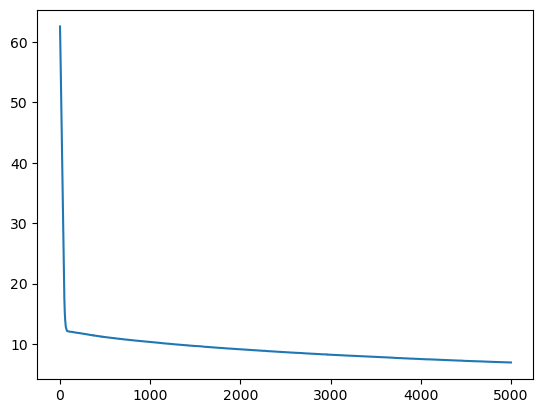

CPU times: user 3min 20s, sys: 30.9 s, total: 3min 51s
Wall time: 3min 52s


In [105]:
%%time
# PReLU・エポック数5000
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.5))
history = model.fit(dataset,epochs=5000,verbose=1)

loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss)
plt.show()

In [106]:
# エポック数は増加させるほどMAPEは緩やかに減少するが、500程度で十分

1/1 [==============================] - 0s 37ms/step


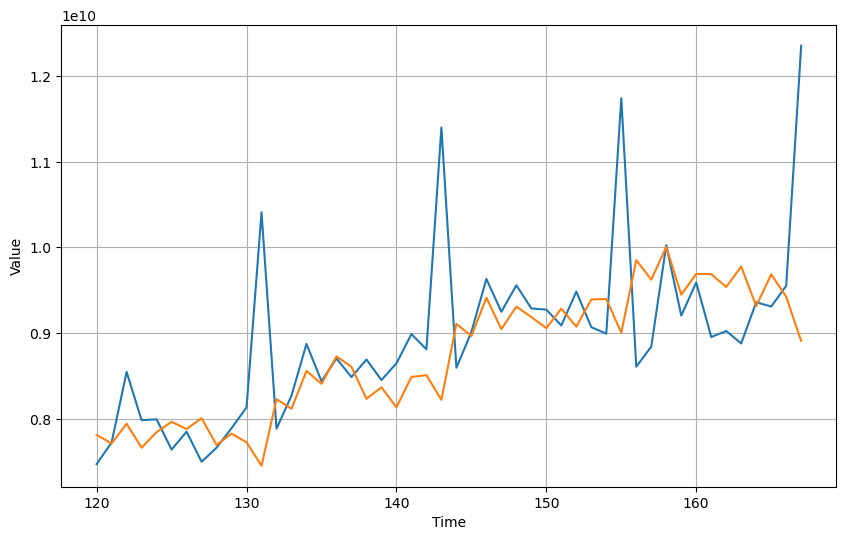

In [25]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [26]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.055112380318286504


In [28]:
%%time
# 学習率の大まかなエリアを絞り込む
# PReLU・エポック数500

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss="mape", optimizer=optimizer)
history = model.fit(dataset, epochs=500, callbacks=[lr_schedule], verbose=0)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


CPU times: user 27.3 s, sys: 3.87 s, total: 31.2 s
Wall time: 41.5 s


(1e-08, 0.001, 0.0, 300.0)

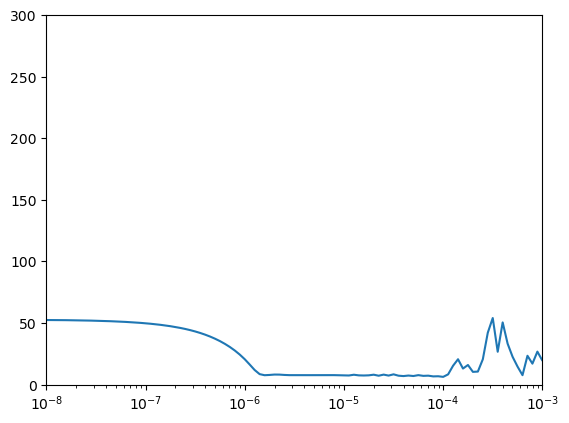

In [29]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

(1e-06, 0.0001, 0.0, 20.0)

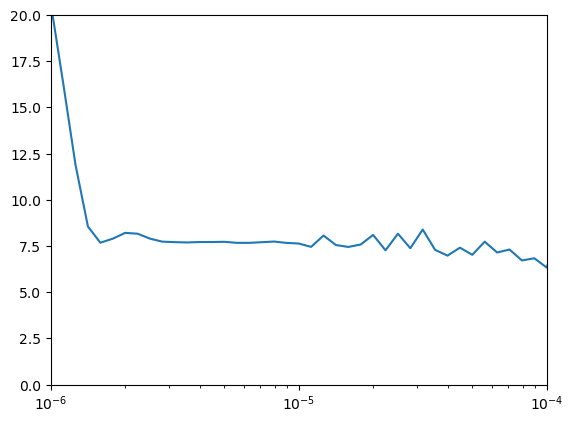

In [30]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-6, 1e-4, 0, 20])

In [31]:
# 0.1〜1*10^-5くらいの学習率でMAPEが最小になる

In [32]:
# ここまでのパラメータのまとめ
# エポック数：500〜5000にかけてMAPEは減少するが、大差ないため計算速度を考慮して500
# 学習率：0.1〜1*10^-5

In [33]:
# keras tunerでニューロンの数を試すための予備シミュレーションをする

In [34]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(5, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(5))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 54ms/step - loss: 36.3287
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 29.6218
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 21.4615
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 12.9007
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 9.2979
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 8.9593
Epoch 7/500
4/4 [==============================] - 0s 8ms/step - loss: 8.9137
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 9.0865
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 8.9973
Epoch 10/500
4/4 [==============================] - 0s 25ms/step - loss: 8.9813
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 9.0379
Epoch 12/500
4/4 [==============================] - 0s 7ms/step - loss: 8.9200
Epoch 13/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 7ms/step - loss: 7.5854
Epoch 207/500
4/4 [==============================] - 0s 5ms/step - loss: 7.6262
Epoch 208/500
4/4 [==============================] - 0s 5ms/step - loss: 7.5380
Epoch 209/500
4/4 [==============================] - 0s 5ms/step - loss: 7.5607
Epoch 210/500
4/4 [==============================] - 0s 8ms/step - loss: 7.5955
Epoch 211/500
4/4 [==============================] - 0s 14ms/step - loss: 7.5282
Epoch 212/500
4/4 [==============================] - 0s 7ms/step - loss: 7.5525
Epoch 213/500
4/4 [==============================] - 0s 4ms/step - loss: 7.5855
Epoch 214/500
4/4 [==============================] - 0s 4ms/step - loss: 7.5887
Epoch 215/500
4/4 [==============================] - 0s 5ms/step - loss: 7.5537
Epoch 216/500
4/4 [==============================] - 0s 10ms/step - loss: 7.5136
Epoch 217/500
4/4 [==============================] - 0s 11ms/step - loss: 7.5238
Epoch 218/500
4/4 [==============================] 

4/4 [==============================] - 0s 6ms/step - loss: 6.8699
Epoch 411/500
4/4 [==============================] - 0s 4ms/step - loss: 6.8050
Epoch 412/500
4/4 [==============================] - 0s 3ms/step - loss: 6.8046
Epoch 413/500
4/4 [==============================] - 0s 4ms/step - loss: 6.8592
Epoch 414/500
4/4 [==============================] - 0s 14ms/step - loss: 6.9262
Epoch 415/500
4/4 [==============================] - 0s 5ms/step - loss: 6.7842
Epoch 416/500
4/4 [==============================] - 0s 3ms/step - loss: 6.7833
Epoch 417/500
4/4 [==============================] - 0s 4ms/step - loss: 6.7828
Epoch 418/500
4/4 [==============================] - 0s 16ms/step - loss: 6.7894
Epoch 419/500
4/4 [==============================] - 0s 3ms/step - loss: 6.7970
Epoch 420/500
4/4 [==============================] - 0s 3ms/step - loss: 6.7829
Epoch 421/500
4/4 [==============================] - 0s 7ms/step - loss: 6.7619
Epoch 422/500
4/4 [==============================] -

1/1 [==============================] - 0s 66ms/step


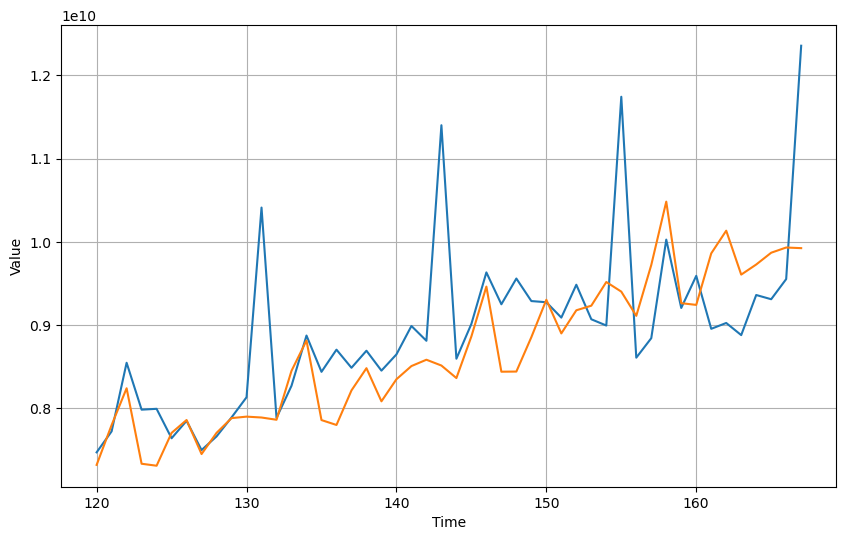

In [35]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [36]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.0568655518275771


In [37]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(15, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(15))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 2s 25ms/step - loss: 104.6996
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 103.3411
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 101.7764
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 100.2361
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 98.8025
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 97.4365
Epoch 7/500
4/4 [==============================] - 0s 23ms/step - loss: 96.0910
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 94.7563
Epoch 9/500
4/4 [==============================] - 0s 6ms/step - loss: 93.4024
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 92.0639
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 90.6813
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 89.3007
Epoch 13/500
4/4 [==============================] - 0s

4/4 [==============================] - 0s 4ms/step - loss: 5.8421
Epoch 207/500
4/4 [==============================] - 0s 6ms/step - loss: 5.6702
Epoch 208/500
4/4 [==============================] - 0s 6ms/step - loss: 5.7685
Epoch 209/500
4/4 [==============================] - 0s 4ms/step - loss: 5.6989
Epoch 210/500
4/4 [==============================] - 0s 10ms/step - loss: 5.7409
Epoch 211/500
4/4 [==============================] - 0s 3ms/step - loss: 5.7183
Epoch 212/500
4/4 [==============================] - 0s 3ms/step - loss: 5.7192
Epoch 213/500
4/4 [==============================] - 0s 11ms/step - loss: 5.7024
Epoch 214/500
4/4 [==============================] - 0s 6ms/step - loss: 5.6725
Epoch 215/500
4/4 [==============================] - 0s 8ms/step - loss: 5.6961
Epoch 216/500
4/4 [==============================] - 0s 6ms/step - loss: 5.7043
Epoch 217/500
4/4 [==============================] - 0s 6ms/step - loss: 5.6693
Epoch 218/500
4/4 [==============================] -

4/4 [==============================] - 0s 5ms/step - loss: 5.3832
Epoch 411/500
4/4 [==============================] - 0s 4ms/step - loss: 5.3770
Epoch 412/500
4/4 [==============================] - 0s 4ms/step - loss: 5.3413
Epoch 413/500
4/4 [==============================] - 0s 10ms/step - loss: 5.3577
Epoch 414/500
4/4 [==============================] - 0s 3ms/step - loss: 5.3385
Epoch 415/500
4/4 [==============================] - 0s 8ms/step - loss: 5.3483
Epoch 416/500
4/4 [==============================] - 0s 4ms/step - loss: 5.3716
Epoch 417/500
4/4 [==============================] - 0s 4ms/step - loss: 5.3568
Epoch 418/500
4/4 [==============================] - 0s 12ms/step - loss: 5.3439
Epoch 419/500
4/4 [==============================] - 0s 5ms/step - loss: 5.4589
Epoch 420/500
4/4 [==============================] - 0s 12ms/step - loss: 5.4126
Epoch 421/500
4/4 [==============================] - 0s 5ms/step - loss: 5.3308
Epoch 422/500
4/4 [==============================] 

1/1 [==============================] - 0s 135ms/step


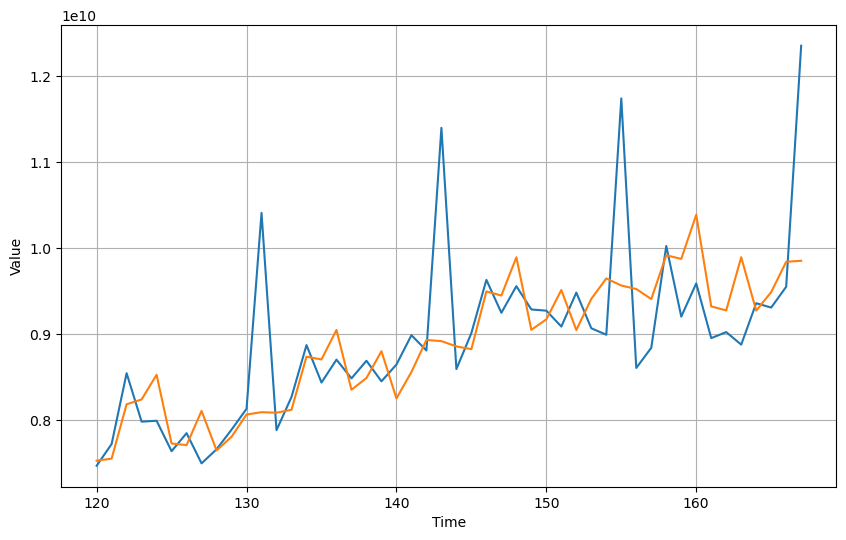

In [38]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [39]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.04980197408674786


In [40]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(20, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(20))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 2s 11ms/step - loss: 245.8466
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 228.1530
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 209.3624
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 191.7336
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 175.2878
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 160.2318
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 146.1732
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 132.5146
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 118.7548
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 104.7245
Epoch 11/500
4/4 [==============================] - 0s 5ms/step - loss: 90.4801
Epoch 12/500
4/4 [==============================] - 0s 8ms/step - loss: 76.4737
Epoch 13/500
4/4 [==============================] 

4/4 [==============================] - 0s 8ms/step - loss: 6.3179
Epoch 207/500
4/4 [==============================] - 0s 34ms/step - loss: 6.4118
Epoch 208/500
4/4 [==============================] - 0s 4ms/step - loss: 6.2356
Epoch 209/500
4/4 [==============================] - 0s 5ms/step - loss: 6.2489
Epoch 210/500
4/4 [==============================] - 0s 4ms/step - loss: 6.6273
Epoch 211/500
4/4 [==============================] - 0s 4ms/step - loss: 6.2682
Epoch 212/500
4/4 [==============================] - 0s 13ms/step - loss: 6.2270
Epoch 213/500
4/4 [==============================] - 0s 9ms/step - loss: 6.2205
Epoch 214/500
4/4 [==============================] - 0s 5ms/step - loss: 6.2067
Epoch 215/500
4/4 [==============================] - 0s 8ms/step - loss: 6.2104
Epoch 216/500
4/4 [==============================] - 0s 4ms/step - loss: 6.3442
Epoch 217/500
4/4 [==============================] - 0s 4ms/step - loss: 6.2780
Epoch 218/500
4/4 [==============================] -

4/4 [==============================] - 0s 3ms/step - loss: 5.9434
Epoch 411/500
4/4 [==============================] - 0s 3ms/step - loss: 6.0233
Epoch 412/500
4/4 [==============================] - 0s 4ms/step - loss: 5.8262
Epoch 413/500
4/4 [==============================] - 0s 5ms/step - loss: 5.8173
Epoch 414/500
4/4 [==============================] - 0s 10ms/step - loss: 5.8381
Epoch 415/500
4/4 [==============================] - 0s 4ms/step - loss: 5.8183
Epoch 416/500
4/4 [==============================] - 0s 27ms/step - loss: 5.7734
Epoch 417/500
4/4 [==============================] - 0s 11ms/step - loss: 5.8787
Epoch 418/500
4/4 [==============================] - 0s 31ms/step - loss: 5.7273
Epoch 419/500
4/4 [==============================] - 0s 4ms/step - loss: 5.7572
Epoch 420/500
4/4 [==============================] - 0s 4ms/step - loss: 5.7847
Epoch 421/500
4/4 [==============================] - 0s 6ms/step - loss: 5.7492
Epoch 422/500
4/4 [==============================]

1/1 [==============================] - 0s 38ms/step


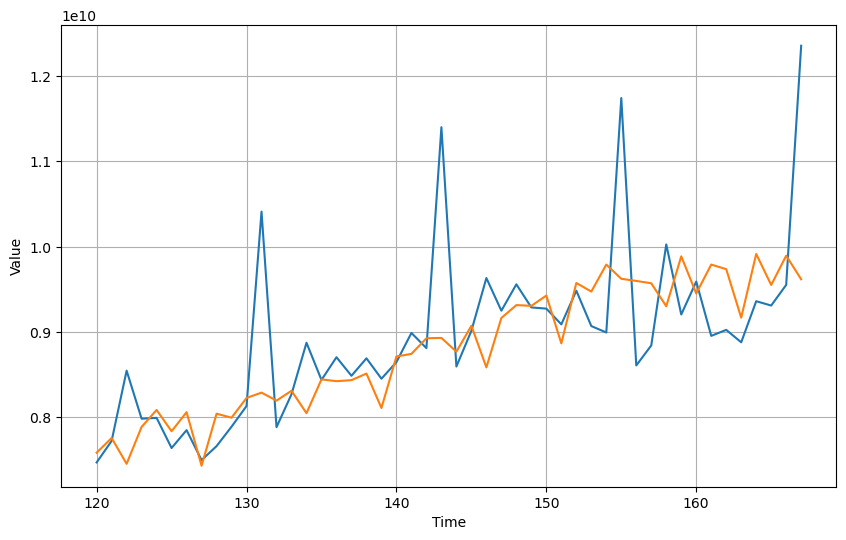

In [41]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [42]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.051149999374663614


In [43]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(25, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(25))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 2s 20ms/step - loss: 130.3174
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 111.4108
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 88.6197
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 67.0585
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 47.4542
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 29.0083
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 13.0710
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 8.4098
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 8.2968
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 8.2406
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 8.1188
Epoch 12/500
4/4 [==============================] - 0s 5ms/step - loss: 8.2612
Epoch 13/500
4/4 [==============================] - 0s 4ms/step

4/4 [==============================] - 0s 3ms/step - loss: 5.8054
Epoch 207/500
4/4 [==============================] - 0s 10ms/step - loss: 5.7638
Epoch 208/500
4/4 [==============================] - 0s 4ms/step - loss: 6.0756
Epoch 209/500
4/4 [==============================] - 0s 8ms/step - loss: 6.1719
Epoch 210/500
4/4 [==============================] - 0s 12ms/step - loss: 5.7220
Epoch 211/500
4/4 [==============================] - 0s 6ms/step - loss: 6.0241
Epoch 212/500
4/4 [==============================] - 0s 5ms/step - loss: 5.7635
Epoch 213/500
4/4 [==============================] - 0s 5ms/step - loss: 5.7892
Epoch 214/500
4/4 [==============================] - 0s 4ms/step - loss: 5.7235
Epoch 215/500
4/4 [==============================] - 0s 4ms/step - loss: 5.7580
Epoch 216/500
4/4 [==============================] - 0s 3ms/step - loss: 5.7096
Epoch 217/500
4/4 [==============================] - 0s 6ms/step - loss: 6.2959
Epoch 218/500
4/4 [==============================] -

4/4 [==============================] - 0s 3ms/step - loss: 5.0433
Epoch 411/500
4/4 [==============================] - 0s 4ms/step - loss: 5.1298
Epoch 412/500
4/4 [==============================] - 0s 5ms/step - loss: 4.9581
Epoch 413/500
4/4 [==============================] - 0s 6ms/step - loss: 5.2802
Epoch 414/500
4/4 [==============================] - 0s 11ms/step - loss: 5.1767
Epoch 415/500
4/4 [==============================] - 0s 5ms/step - loss: 5.1699
Epoch 416/500
4/4 [==============================] - 0s 3ms/step - loss: 5.0402
Epoch 417/500
4/4 [==============================] - 0s 4ms/step - loss: 4.9551
Epoch 418/500
4/4 [==============================] - 0s 5ms/step - loss: 5.2772
Epoch 419/500
4/4 [==============================] - 0s 5ms/step - loss: 5.4920
Epoch 420/500
4/4 [==============================] - 0s 6ms/step - loss: 5.1275
Epoch 421/500
4/4 [==============================] - 0s 5ms/step - loss: 5.0814
Epoch 422/500
4/4 [==============================] - 

1/1 [==============================] - 0s 23ms/step


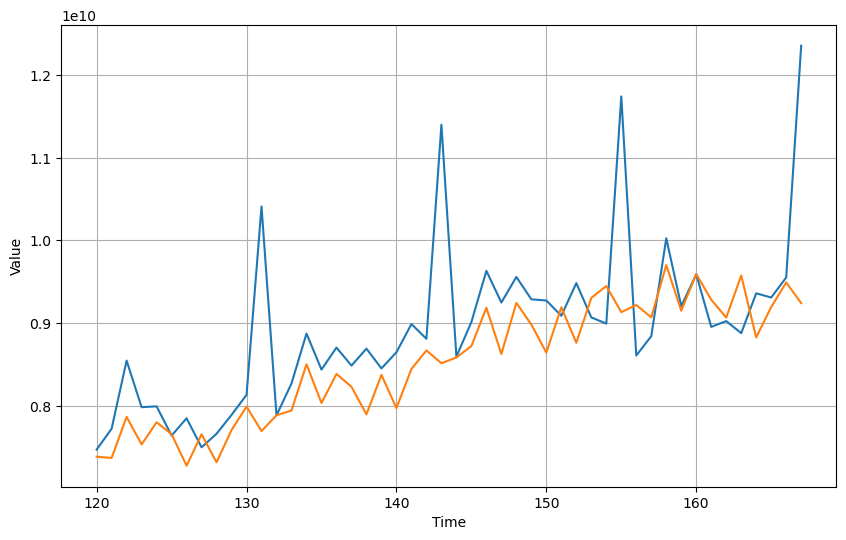

In [44]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [45]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.05449426081722572


In [46]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(30, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(30))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 15ms/step - loss: 83.8989
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 75.7796
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 66.4982
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 56.7039
Epoch 5/500
4/4 [==============================] - 0s 13ms/step - loss: 46.9887
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 37.1426
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 27.0634
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 16.9268
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 10.1873
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 8.1195
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 7.6591
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 7.6710
Epoch 13/500
4/4 [==============================] - 0s 3ms/ste

4/4 [==============================] - 0s 5ms/step - loss: 6.6767
Epoch 207/500
4/4 [==============================] - 0s 5ms/step - loss: 6.9985
Epoch 208/500
4/4 [==============================] - 0s 7ms/step - loss: 6.6779
Epoch 209/500
4/4 [==============================] - 0s 4ms/step - loss: 6.6661
Epoch 210/500
4/4 [==============================] - 0s 3ms/step - loss: 6.6476
Epoch 211/500
4/4 [==============================] - 0s 6ms/step - loss: 6.6762
Epoch 212/500
4/4 [==============================] - 0s 13ms/step - loss: 6.6614
Epoch 213/500
4/4 [==============================] - 0s 8ms/step - loss: 6.7402
Epoch 214/500
4/4 [==============================] - 0s 4ms/step - loss: 6.6333
Epoch 215/500
4/4 [==============================] - 0s 4ms/step - loss: 6.8555
Epoch 216/500
4/4 [==============================] - 0s 4ms/step - loss: 6.7638
Epoch 217/500
4/4 [==============================] - 0s 4ms/step - loss: 6.6741
Epoch 218/500
4/4 [==============================] - 

4/4 [==============================] - 0s 3ms/step - loss: 6.1999
Epoch 411/500
4/4 [==============================] - 0s 5ms/step - loss: 6.3160
Epoch 412/500
4/4 [==============================] - 0s 4ms/step - loss: 6.2513
Epoch 413/500
4/4 [==============================] - 0s 7ms/step - loss: 6.2529
Epoch 414/500
4/4 [==============================] - 0s 4ms/step - loss: 6.2240
Epoch 415/500
4/4 [==============================] - 0s 4ms/step - loss: 6.3924
Epoch 416/500
4/4 [==============================] - 0s 4ms/step - loss: 6.2460
Epoch 417/500
4/4 [==============================] - 0s 5ms/step - loss: 6.1663
Epoch 418/500
4/4 [==============================] - 0s 5ms/step - loss: 6.4439
Epoch 419/500
4/4 [==============================] - 0s 11ms/step - loss: 6.2322
Epoch 420/500
4/4 [==============================] - 0s 3ms/step - loss: 6.1602
Epoch 421/500
4/4 [==============================] - 0s 26ms/step - loss: 6.2155
Epoch 422/500
4/4 [==============================] -

1/1 [==============================] - 0s 20ms/step


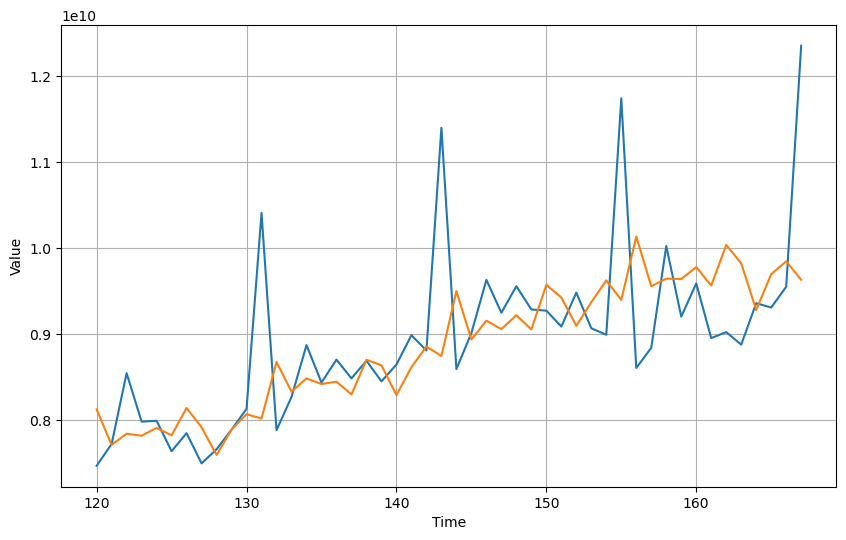

In [47]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [48]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.05677096042204179


In [49]:
%%time
# PReLU・エポック数500
# split_by_120/PReLU_500_1

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):

  model = Sequential()
  model.add(Dense(units=hp.Int('units1', min_value=2, max_value=30, step=4), input_shape=[window_size]))
  model.add(PReLU())
  model.add(Dense(units=hp.Int('units2', min_value=2, max_value=30, step=4)))
  model.add(PReLU())
  model.add(Dense(1))

  model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[0.5, 0.7, 0.9]), lr=1e-5))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=60, executions_per_trial=3, directory='split_by_120', project_name='PReLU_500_1')

tuner.search_space_summary()

tuner.search(dataset, epochs=500, verbose=0)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Search space summary
Default search space size: 3
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 30, 'step': 4, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 30, 'step': 4, 'sampling': None}
momentum (Choice)
{'default': 0.5, 'conditions': [], 'values': [0.5, 0.7, 0.9], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
CPU times: user 1h 7min 41s, sys: 8min 49s, total: 1h 16min 30s
Wall time: 1h 39min 54s


In [50]:
tuner.results_summary()

Results summary
Results in split_by_120/PReLU_500_1
Showing 10 best trials
Trial summary
Hyperparameters:
units1: 26
units2: 22
momentum: 0.5
Score: 4.780365784962972
Trial summary
Hyperparameters:
units1: 30
units2: 10
momentum: 0.7
Score: 4.892710208892822
Trial summary
Hyperparameters:
units1: 22
units2: 26
momentum: 0.7
Score: 5.001861095428467
Trial summary
Hyperparameters:
units1: 22
units2: 6
momentum: 0.7
Score: 5.155774275461833
Trial summary
Hyperparameters:
units1: 22
units2: 26
momentum: 0.5
Score: 5.276647408803304
Trial summary
Hyperparameters:
units1: 26
units2: 6
momentum: 0.9
Score: 5.368731339772542
Trial summary
Hyperparameters:
units1: 30
units2: 14
momentum: 0.7
Score: 5.484117031097412
Trial summary
Hyperparameters:
units1: 14
units2: 22
momentum: 0.9
Score: 5.539851665496826
Trial summary
Hyperparameters:
units1: 18
units2: 18
momentum: 0.9
Score: 5.553933302561442
Trial summary
Hyperparameters:
units1: 22
units2: 22
momentum: 0.7
Score: 5.5608894030253095


In [423]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(26, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(22))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 43ms/step - loss: 75.2459
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 65.7963
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 54.8485
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 43.5839
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 31.7888
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 19.5135
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 9.8549
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 7.8520
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 7.5202
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 7.1964
Epoch 11/500
4/4 [==============================] - 0s 10ms/step - loss: 6.9785
Epoch 12/500
4/4 [==============================] - 0s 5ms/step - loss: 6.8201
Epoch 13/500
4/4 [==============================] - 0s 6ms/step -

4/4 [==============================] - 0s 5ms/step - loss: 5.3056
Epoch 207/500
4/4 [==============================] - 0s 6ms/step - loss: 5.0505
Epoch 208/500
4/4 [==============================] - 0s 5ms/step - loss: 5.0155
Epoch 209/500
4/4 [==============================] - 0s 6ms/step - loss: 5.0001
Epoch 210/500
4/4 [==============================] - 0s 5ms/step - loss: 5.1088
Epoch 211/500
4/4 [==============================] - 0s 5ms/step - loss: 4.9606
Epoch 212/500
4/4 [==============================] - 0s 3ms/step - loss: 4.9751
Epoch 213/500
4/4 [==============================] - 0s 7ms/step - loss: 5.1531
Epoch 214/500
4/4 [==============================] - 0s 4ms/step - loss: 5.0608
Epoch 215/500
4/4 [==============================] - 0s 6ms/step - loss: 5.0556
Epoch 216/500
4/4 [==============================] - 0s 6ms/step - loss: 5.3124
Epoch 217/500
4/4 [==============================] - 0s 4ms/step - loss: 5.1173
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 8ms/step - loss: 4.6959
Epoch 411/500
4/4 [==============================] - 0s 4ms/step - loss: 4.7089
Epoch 412/500
4/4 [==============================] - 0s 4ms/step - loss: 4.7830
Epoch 413/500
4/4 [==============================] - 0s 4ms/step - loss: 4.7327
Epoch 414/500
4/4 [==============================] - 0s 4ms/step - loss: 5.0808
Epoch 415/500
4/4 [==============================] - 0s 7ms/step - loss: 4.8154
Epoch 416/500
4/4 [==============================] - 0s 5ms/step - loss: 4.6960
Epoch 417/500
4/4 [==============================] - 0s 3ms/step - loss: 4.7099
Epoch 418/500
4/4 [==============================] - 0s 4ms/step - loss: 4.7306
Epoch 419/500
4/4 [==============================] - 0s 8ms/step - loss: 4.8558
Epoch 420/500
4/4 [==============================] - 0s 3ms/step - loss: 4.9401
Epoch 421/500
4/4 [==============================] - 0s 4ms/step - loss: 4.7970
Epoch 422/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 23ms/step


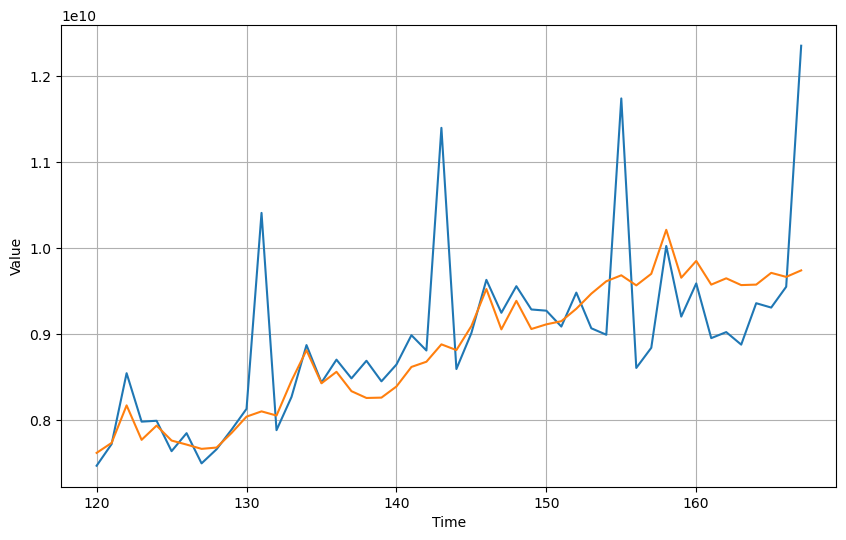

In [424]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [425]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.04399888258441107


In [429]:
dnn_forecast = forecast
dnn_train_pred = train_pred
dnn_test_pred = test_pred

In [72]:
# 一旦SARIMAXとDNNで考察する

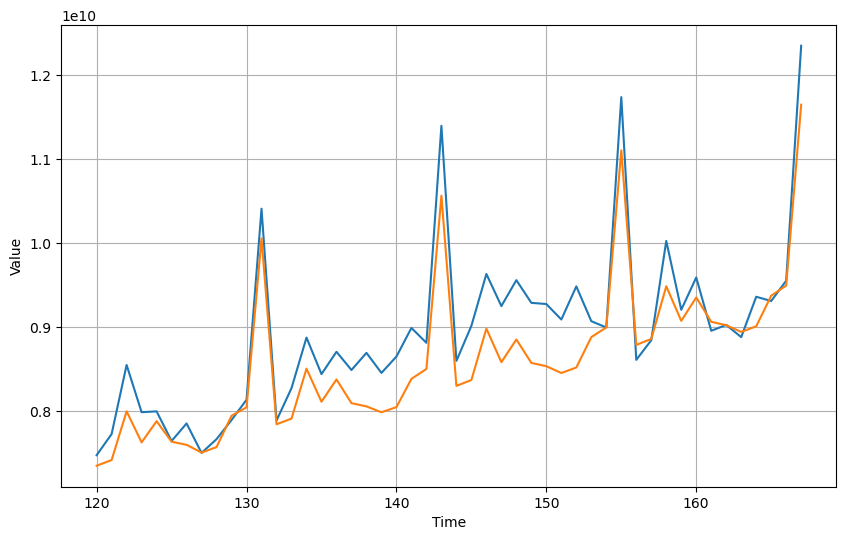

In [73]:
# SARIMAX
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, sarimax_test_pred)

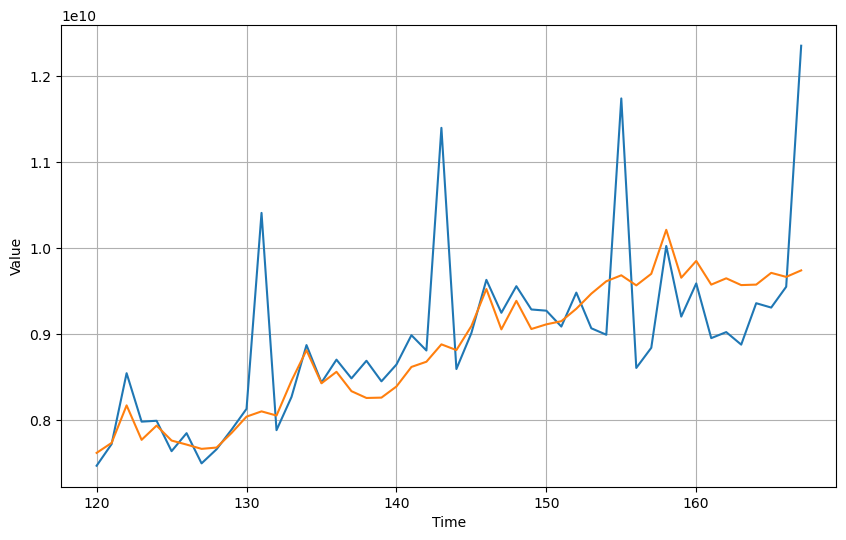

In [430]:
# DNN
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_test_pred)

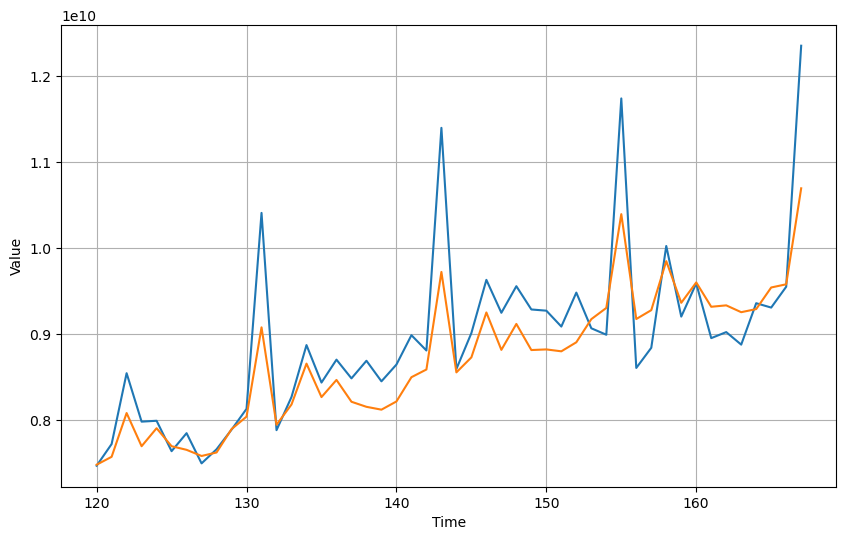

In [431]:
# SARIMAX DNN average
dnn_sarimax = np.stack((dnn_test_pred, sarimax_test_pred))
dnn_sarimax_ave_test_pred = np.mean(dnn_sarimax, axis=0)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_sarimax_ave_test_pred)

In [432]:
# MAPE
print('DNN MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_test_pred))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('DNN SARIMAX AVERAGE MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_sarimax_ave_test_pred))

DNN MAPE:
0.04399888258441107
SARIMAX MAPE:
0.0382686725025465
DNN SARIMAX AVERAGE MAPE:
0.03684939190882404


In [77]:
# SARIMAXとDNNの平均は、SARIMAX単体・DNN単体よりもMAPEが改善した。
# SARIMAXは12月の売上の上昇などの季節性トレンドを把握できているが、平時は微妙。
# 一方でDNNは平時の予想ができているが、季節性トレンドまでは把握できず。
# (DNNはエポック数を極端に増加させれば、季節性を捉えられることは予備実験済み。)
# 変動が小さい時はDNNに重みを、変動が大きい時はSARIMAXに重みを大きくつければ、予測精度はより向上すると考えられる。

In [170]:
# 月ごとの平均の先月比売上変動率
# average_monthly_volatility：[[1月の先月売上比],[2月の先月売上比],[3月の先月売上比], ....]

volatility_list = []
for time in range(len(x_train)-24):
    volatility_list.append(x_train[time+12] / x_train[time+11])

variable_ratio = np.array(volatility_list).reshape(8, -1).T
average_monthly_volatility = np.mean(variable_ratio, axis=-1)
average_monthly_volatility

array([0.73227805, 1.04238334, 1.07992383, 0.94123511, 1.03245552,
       0.96816749, 0.98601397, 0.96154212, 1.02150996, 1.05375961,
       1.03172453, 1.31595525])

In [237]:
# (変動率 - 1)の絶対値    (先月に比べて変動のしやすさのスコア)
a = np.abs(average_monthly_volatility-1)
a

array([0.26772195, 0.04238334, 0.07992383, 0.05876489, 0.03245552,
       0.03183251, 0.01398603, 0.03845788, 0.02150996, 0.05375961,
       0.03172453, 0.31595525])

In [238]:
# 変動のし易さの偏差値/100
# 0.5未満のとき、他の月と比べて変動しにくい
# 0.5以上のとき、他の月と比べて変動しやすい
b = np.array((50.0+10.0*(a-np.average(a))/np.std(a))/100)
b = np.ravel(np.repeat(b[None, :], 4, axis=0))                # 予想が4年分あるため
b

array([0.69375185, 0.45819746, 0.49743986, 0.47532167, 0.44781956,
       0.44716831, 0.42851275, 0.45409404, 0.43637778, 0.47008947,
       0.44705543, 0.74417181, 0.69375185, 0.45819746, 0.49743986,
       0.47532167, 0.44781956, 0.44716831, 0.42851275, 0.45409404,
       0.43637778, 0.47008947, 0.44705543, 0.74417181, 0.69375185,
       0.45819746, 0.49743986, 0.47532167, 0.44781956, 0.44716831,
       0.42851275, 0.45409404, 0.43637778, 0.47008947, 0.44705543,
       0.74417181, 0.69375185, 0.45819746, 0.49743986, 0.47532167,
       0.44781956, 0.44716831, 0.42851275, 0.45409404, 0.43637778,
       0.47008947, 0.44705543, 0.74417181])

In [196]:
c = np.array(1-b)
c

array([0.30624815, 0.54180254, 0.50256014, 0.52467833, 0.55218044,
       0.55283169, 0.57148725, 0.54590596, 0.56362222, 0.52991053,
       0.55294457, 0.25582819, 0.30624815, 0.54180254, 0.50256014,
       0.52467833, 0.55218044, 0.55283169, 0.57148725, 0.54590596,
       0.56362222, 0.52991053, 0.55294457, 0.25582819, 0.30624815,
       0.54180254, 0.50256014, 0.52467833, 0.55218044, 0.55283169,
       0.57148725, 0.54590596, 0.56362222, 0.52991053, 0.55294457,
       0.25582819, 0.30624815, 0.54180254, 0.50256014, 0.52467833,
       0.55218044, 0.55283169, 0.57148725, 0.54590596, 0.56362222,
       0.52991053, 0.55294457, 0.25582819])

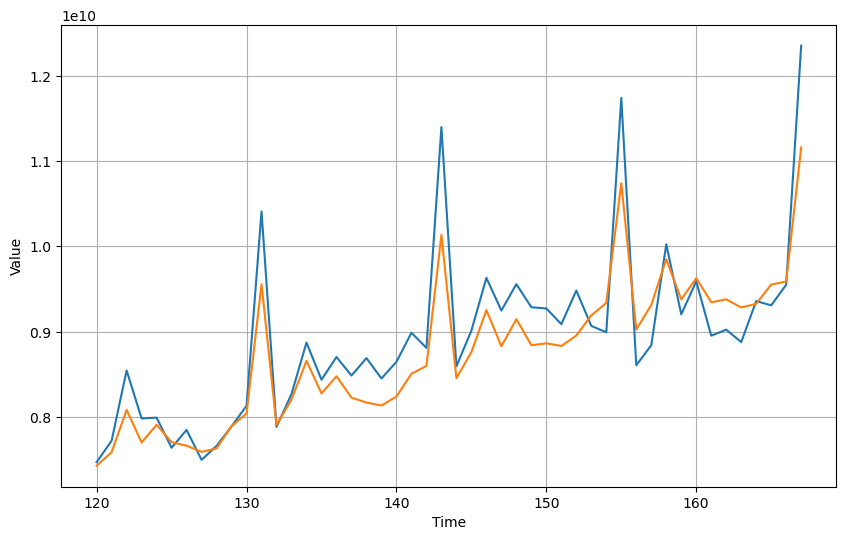

In [433]:
# b*SARIMAX+c*DNN

dnn_deviation_weighted_test_pred = np.array(b*sarimax_test_pred+c*dnn_test_pred)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_deviation_weighted_test_pred)

In [434]:
# MAPE
print('DNN MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_test_pred))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('DNN SARIMAX Average MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_sarimax_ave_test_pred))
print('DNN SARIMAX Deviation weighted MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_deviation_weighted_test_pred))

DNN MAPE:
0.04399888258441107
SARIMAX MAPE:
0.0382686725025465
DNN SARIMAX Average MAPE:
0.03684939190882404
DNN SARIMAX Deviation weighted MAPE:
0.03321738697872997


In [203]:
# 先月との変動率をもとに重みをつけた場合、MAPEを改善させることができた。

In [436]:
# 移動平均との差から変動の大きさをスコア化する

In [442]:
# 移動平均(12時点から108時点まで)
moving_average = np.array(df_train.Sales.rolling(24).mean().shift(-12).values[12:108])

# 月ごとの実測値と移動平均値との差の平均
diff_moving_average = (x_train[12:108] - moving_average).reshape(8, -1).T
d = np.mean(diff_moving_average, axis=-1)
d

array([-2.85945141e+08, -1.14577607e+08,  2.56042467e+08, -1.09616362e+08,
        3.26843775e+07, -1.68618972e+08, -2.66055100e+08, -4.94303370e+08,
       -4.16970116e+08, -1.79024485e+08, -5.95511637e+07,  1.60416059e+09])

In [443]:
# (実測値と移動平均値の差)の偏差値
e = np.array((50.0+10.0*(d-np.average(d))/np.std(d))/100)
e = np.ravel(np.repeat(e[None, :], 4, axis=0))                # 予想が4年分あるため
e

array([0.44865147, 0.48134739, 0.55205952, 0.48229397, 0.50944411,
       0.47103661, 0.45244637, 0.40889795, 0.42365268, 0.4690513 ,
       0.49184611, 0.80927252, 0.44865147, 0.48134739, 0.55205952,
       0.48229397, 0.50944411, 0.47103661, 0.45244637, 0.40889795,
       0.42365268, 0.4690513 , 0.49184611, 0.80927252, 0.44865147,
       0.48134739, 0.55205952, 0.48229397, 0.50944411, 0.47103661,
       0.45244637, 0.40889795, 0.42365268, 0.4690513 , 0.49184611,
       0.80927252, 0.44865147, 0.48134739, 0.55205952, 0.48229397,
       0.50944411, 0.47103661, 0.45244637, 0.40889795, 0.42365268,
       0.4690513 , 0.49184611, 0.80927252])

In [444]:
f = np.array(1-e)
f

array([0.55134853, 0.51865261, 0.44794048, 0.51770603, 0.49055589,
       0.52896339, 0.54755363, 0.59110205, 0.57634732, 0.5309487 ,
       0.50815389, 0.19072748, 0.55134853, 0.51865261, 0.44794048,
       0.51770603, 0.49055589, 0.52896339, 0.54755363, 0.59110205,
       0.57634732, 0.5309487 , 0.50815389, 0.19072748, 0.55134853,
       0.51865261, 0.44794048, 0.51770603, 0.49055589, 0.52896339,
       0.54755363, 0.59110205, 0.57634732, 0.5309487 , 0.50815389,
       0.19072748, 0.55134853, 0.51865261, 0.44794048, 0.51770603,
       0.49055589, 0.52896339, 0.54755363, 0.59110205, 0.57634732,
       0.5309487 , 0.50815389, 0.19072748])

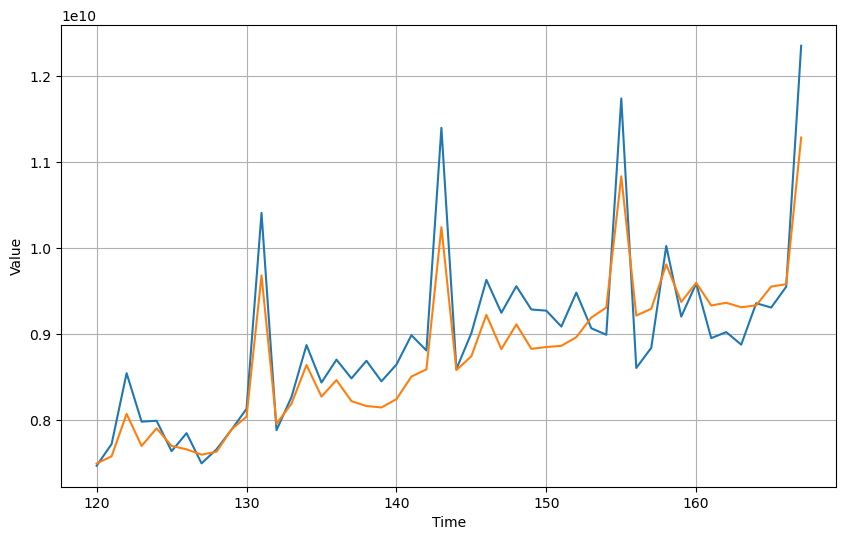

In [445]:
# e*SARIMAX+f*DNN
dnn_diff_moving_average_test_pred = np.array(e*sarimax_test_pred+f*dnn_test_pred)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_diff_moving_average_test_pred)

In [446]:
# MAPE
print('DNN MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_test_pred))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('DNN SARIMAX Average MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_sarimax_ave_test_pred))
print('DNN SARIMAX Deviation weighted MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_deviation_weighted_test_pred))
print('DNN SARIMAX Diff Moving Average MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_diff_moving_average_test_pred))

DNN MAPE:
0.04399888258441107
SARIMAX MAPE:
0.0382686725025465
DNN SARIMAX Average MAPE:
0.03684939190882404
DNN SARIMAX Deviation weighted MAPE:
0.03321738697872997
DNN SARIMAX Diff Moving Average MAPE:
0.03283588292408113


In [245]:
# DNNでは季節性トレンドの変動を捉えられないため、そこをSARIMAXで補いたい

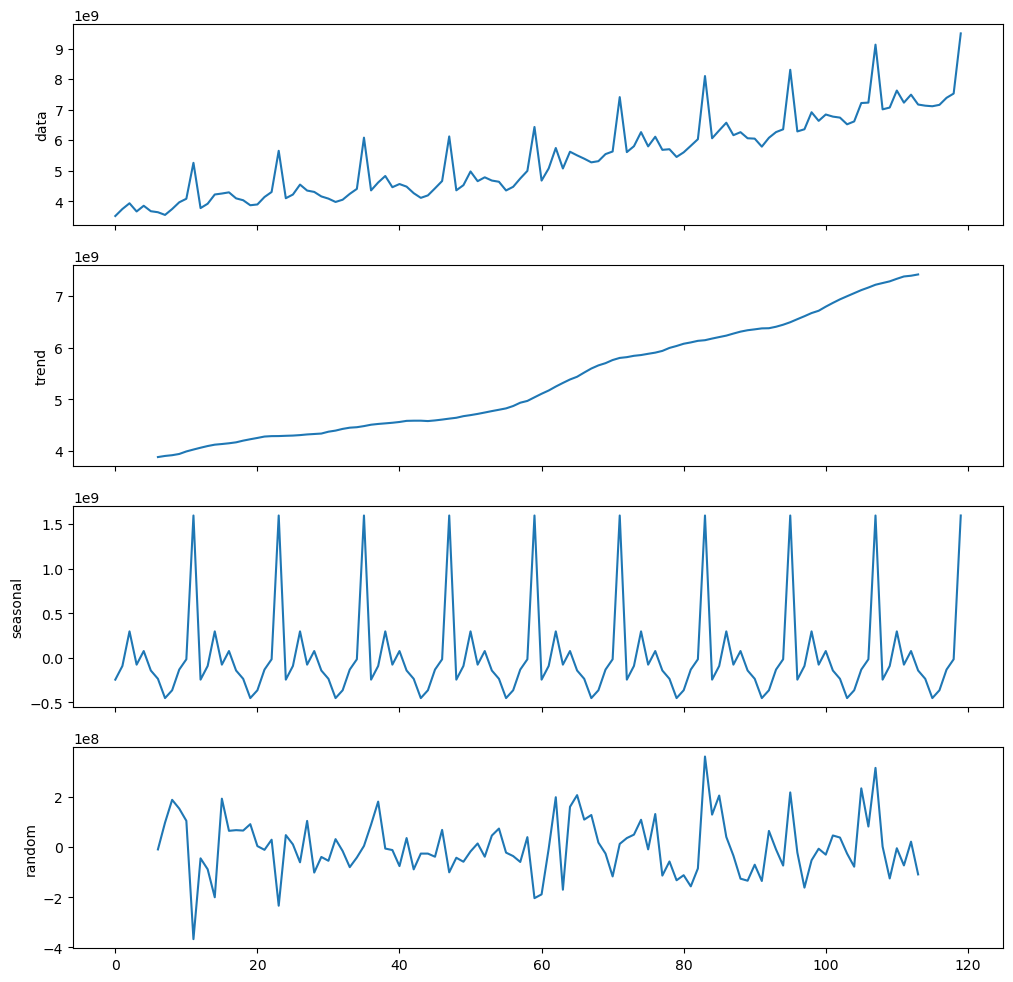

In [249]:
component_decomposition = arima.decompose(df_train.Sales.values,'additive',m=12)
utils.decomposed_plot(component_decomposition, figure_kwargs = {'figsize': (12, 12)})

In [447]:
# 季節性トレンドの絶対値
seasonal = np.array(component_decomposition.seasonal[12:24])
seasonal

array([-2.45173527e+08, -9.19304382e+07,  2.96051239e+08, -7.70708712e+07,
        7.53999805e+07, -1.42838887e+08, -2.35893442e+08, -4.52173860e+08,
       -3.64390694e+08, -1.32407422e+08, -1.68318448e+07,  1.59492187e+09])

In [448]:
# (実測値と移動平均値の差)の絶対値の偏差値
g = np.array((50.0+10.0*(seasonal-np.average(seasonal))/np.std(seasonal))/100)
g = np.ravel(np.repeat(g[None, :], 4, axis=0))                # 予想が4年分あるため
g

array([0.4486807 , 0.47864248, 0.55449986, 0.48154779, 0.51135858,
       0.46868896, 0.45049512, 0.40820842, 0.4253716 , 0.4707285 ,
       0.4933256 , 0.80845239, 0.4486807 , 0.47864248, 0.55449986,
       0.48154779, 0.51135858, 0.46868896, 0.45049512, 0.40820842,
       0.4253716 , 0.4707285 , 0.4933256 , 0.80845239, 0.4486807 ,
       0.47864248, 0.55449986, 0.48154779, 0.51135858, 0.46868896,
       0.45049512, 0.40820842, 0.4253716 , 0.4707285 , 0.4933256 ,
       0.80845239, 0.4486807 , 0.47864248, 0.55449986, 0.48154779,
       0.51135858, 0.46868896, 0.45049512, 0.40820842, 0.4253716 ,
       0.4707285 , 0.4933256 , 0.80845239])

In [449]:
h = np.array(1-g)
h

array([0.5513193 , 0.52135752, 0.44550014, 0.51845221, 0.48864142,
       0.53131104, 0.54950488, 0.59179158, 0.5746284 , 0.5292715 ,
       0.5066744 , 0.19154761, 0.5513193 , 0.52135752, 0.44550014,
       0.51845221, 0.48864142, 0.53131104, 0.54950488, 0.59179158,
       0.5746284 , 0.5292715 , 0.5066744 , 0.19154761, 0.5513193 ,
       0.52135752, 0.44550014, 0.51845221, 0.48864142, 0.53131104,
       0.54950488, 0.59179158, 0.5746284 , 0.5292715 , 0.5066744 ,
       0.19154761, 0.5513193 , 0.52135752, 0.44550014, 0.51845221,
       0.48864142, 0.53131104, 0.54950488, 0.59179158, 0.5746284 ,
       0.5292715 , 0.5066744 , 0.19154761])

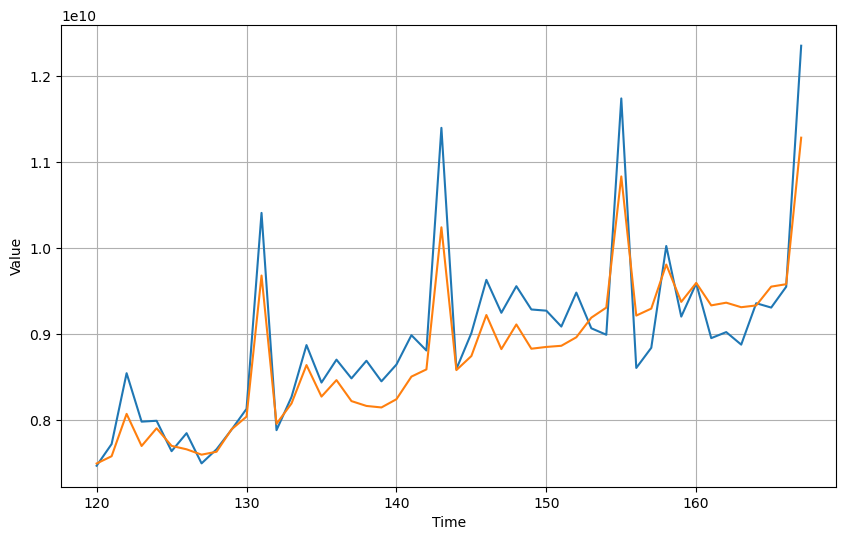

In [450]:
# g*SARIMAX+h*DNN
dnn_seasonal_trend_test_pred = np.array(g*sarimax_test_pred+h*dnn_test_pred)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_seasonal_trend_test_pred)

In [451]:
# MAPE
print('DNN MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_test_pred))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('DNN SARIMAX Average MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_sarimax_ave_test_pred))
print('DNN SARIMAX Deviation weighted MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_deviation_weighted_test_pred))
print('DNN SARIMAX Diff Moving Average MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_diff_moving_average_test_pred))
print('DNN SARIMAX Seasonal Trend MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_seasonal_trend_test_pred))

DNN MAPE:
0.04399888258441107
SARIMAX MAPE:
0.0382686725025465
DNN SARIMAX Average MAPE:
0.03684939190882404
DNN SARIMAX Deviation weighted MAPE:
0.03321738697872997
DNN SARIMAX Diff Moving Average MAPE:
0.03283588292408113
DNN SARIMAX Seasonal Trend MAPE:
0.03285194378061757


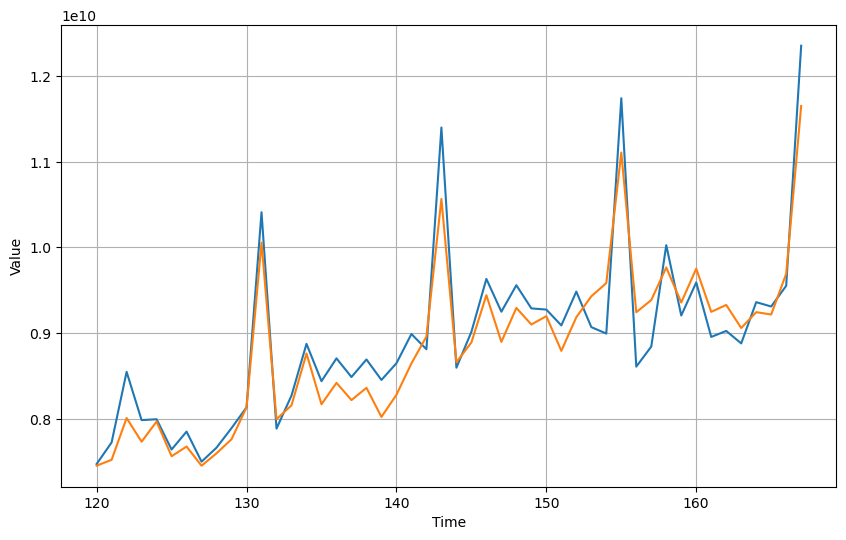

In [337]:
# 単純に12月だけSARIMAX、それ以外をDNNとしてやってみる

# sarimaxの12月の各値
sarimax_test_pred_12 = np.array(sarimax_test_pred).reshape(4,12)[:,11].reshape(4,1)

# DNNの12月以外の各値
dnn_test_pred_1_11 = dnn_test_pred.reshape(4,12)[:, 0:11]

# 1月-11月がDNN , 12月がSARIMAX
dnn_1_11_sarimax_12_test_pred =np.ravel(np.append(dnn_test_pred_1_11, sarimax_test_pred_12, axis=1))

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_1_11_sarimax_12_test_pred)

In [452]:
# MAPE
print('DNN MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_test_pred))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('DNN SARIMAX Average MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_sarimax_ave_test_pred))
print('DNN SARIMAX Deviation weighted MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_deviation_weighted_test_pred))
print('DNN SARIMAX Diff Moving Average MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_diff_moving_average_test_pred))
print('DNN SARIMAX Seasonal Trend MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_seasonal_trend_test_pred))
print('DNN 1-11 SARIMAX 12 MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_1_11_sarimax_12_test_pred))

DNN MAPE:
0.04399888258441107
SARIMAX MAPE:
0.0382686725025465
DNN SARIMAX Average MAPE:
0.03684939190882404
DNN SARIMAX Deviation weighted MAPE:
0.03321738697872997
DNN SARIMAX Diff Moving Average MAPE:
0.03283588292408113
DNN SARIMAX Seasonal Trend MAPE:
0.03285194378061757
DNN 1-11 SARIMAX 12 MAPE:
0.028249640074293255


In [339]:
# 12月だけSARIMAXにするのは恣意的だと思うが、一番良いMAPEを得ることができた。

In [78]:
# CNN

In [79]:
# 畳み込みのコード化

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [81]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [80]:
# filters・・・学習させたいフィルタの数。この数のフィルタを生成し、データに会うように時間をかけて学習する。
# kernel_size・・・フィルタの大きさ。
# strides・・・フィルタがリストをスキャンする際のステップの大きさ。通常は1。
# padding・・・リストのどちらの端からデータをドロップするかを決定する。
# activatoin・・・活性化関数。reluは層から出てくる負の値を効果的に排除することを意味する。
# input_shape・・・ネットワークに渡す入力データの形状。ここでは最初の層のため指定する必要がある。

from tensorflow.keras.layers import Conv1D

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu', input_shape=[None, 1]))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 143ms/step - loss: 104.7437
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 92.1382
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 82.8001
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 74.0800
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 61.9386
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 43.9578
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 19.2345
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 13.4185
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 12.9333
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 12.8789
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 12.8127
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 12.7836
Epoch 13/500
4/4 [==============================] - 0s 4ms

4/4 [==============================] - 0s 3ms/step - loss: 8.5226
Epoch 206/500
4/4 [==============================] - 0s 4ms/step - loss: 8.5047
Epoch 207/500
4/4 [==============================] - 0s 4ms/step - loss: 8.5647
Epoch 208/500
4/4 [==============================] - 0s 6ms/step - loss: 8.5308
Epoch 209/500
4/4 [==============================] - 0s 3ms/step - loss: 8.6302
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 8.5252
Epoch 211/500
4/4 [==============================] - 0s 2ms/step - loss: 8.5386
Epoch 212/500
4/4 [==============================] - 0s 2ms/step - loss: 8.5275
Epoch 213/500
4/4 [==============================] - 0s 2ms/step - loss: 8.5226
Epoch 214/500
4/4 [==============================] - 0s 2ms/step - loss: 8.4745
Epoch 215/500
4/4 [==============================] - 0s 2ms/step - loss: 8.6096
Epoch 216/500
4/4 [==============================] - 0s 6ms/step - loss: 8.5202
Epoch 217/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 16ms/step - loss: 8.2211
Epoch 410/500
4/4 [==============================] - 0s 3ms/step - loss: 8.8867
Epoch 411/500
4/4 [==============================] - 0s 3ms/step - loss: 8.3465
Epoch 412/500
4/4 [==============================] - 0s 4ms/step - loss: 8.3285
Epoch 413/500
4/4 [==============================] - 0s 3ms/step - loss: 8.1952
Epoch 414/500
4/4 [==============================] - 0s 3ms/step - loss: 8.2120
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 8.4618
Epoch 416/500
4/4 [==============================] - 0s 5ms/step - loss: 8.2527
Epoch 417/500
4/4 [==============================] - 0s 3ms/step - loss: 8.2034
Epoch 418/500
4/4 [==============================] - 0s 3ms/step - loss: 8.2257
Epoch 419/500
4/4 [==============================] - 0s 12ms/step - loss: 8.6318
Epoch 420/500
4/4 [==============================] - 0s 16ms/step - loss: 8.1887
Epoch 421/500
4/4 [==============================] 

5/5 [==============================] - 0s 9ms/step


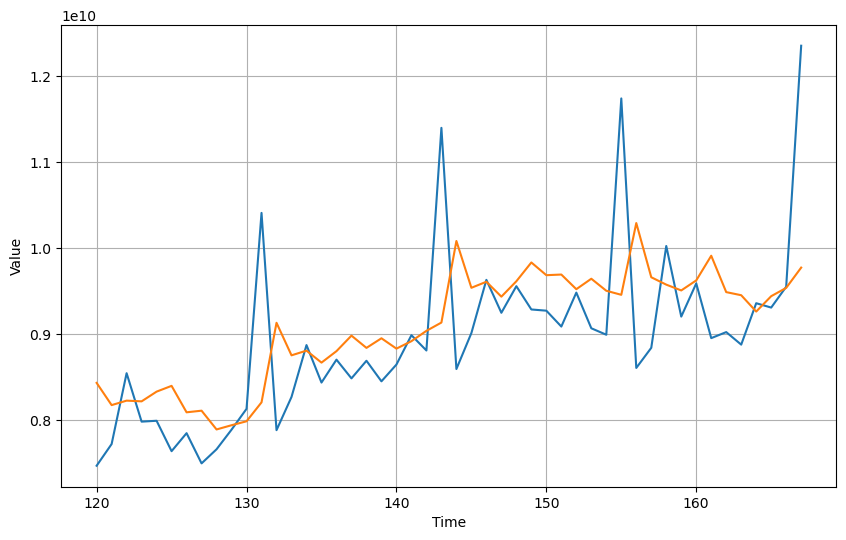

In [82]:
forecast = model_forecast(model, series[..., np.newaxis], window_size)
results = forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [85]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, results))

MAPE:
0.06259789983347462


In [83]:
# 学習率の大まかなエリアを絞り込む
# ReLU・エポック数500

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu', input_shape=[None, 1]))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss="mape", optimizer=optimizer)
history = model.fit(dataset, epochs=500, callbacks=[lr_schedule], verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 40ms/step - loss: 104.2148 - lr: 1.0000e-08
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 104.2071 - lr: 1.1220e-08
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 104.1924 - lr: 1.2589e-08
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 104.1722 - lr: 1.4125e-08
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 104.1470 - lr: 1.5849e-08
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 104.1169 - lr: 1.7783e-08
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 104.0824 - lr: 1.9953e-08
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 104.0428 - lr: 2.2387e-08
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 103.9978 - lr: 2.5119e-08
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 103.9474 - lr: 2.8184e-08
Epoch 11/500
4/4 [==========

4/4 [==============================] - 0s 3ms/step - loss: 100.0000 - lr: 3.1623
Epoch 172/500
4/4 [==============================] - 0s 2ms/step - loss: 100.0000 - lr: 3.5481
Epoch 173/500
4/4 [==============================] - 0s 2ms/step - loss: 100.0000 - lr: 3.9811
Epoch 174/500
4/4 [==============================] - 0s 3ms/step - loss: 100.0000 - lr: 4.4668
Epoch 175/500
4/4 [==============================] - 0s 2ms/step - loss: 100.0000 - lr: 5.0119
Epoch 176/500
4/4 [==============================] - 0s 2ms/step - loss: 100.0000 - lr: 5.6234
Epoch 177/500
4/4 [==============================] - 0s 2ms/step - loss: 100.0000 - lr: 6.3096
Epoch 178/500
4/4 [==============================] - 0s 3ms/step - loss: 100.0000 - lr: 7.0795
Epoch 179/500
4/4 [==============================] - 0s 2ms/step - loss: 100.0000 - lr: 7.9433
Epoch 180/500
4/4 [==============================] - 0s 2ms/step - loss: 100.0000 - lr: 8.9125
Epoch 181/500
4/4 [==============================] - 0s 3ms/step

4/4 [==============================] - 0s 5ms/step - loss: 100.0000 - lr: 562341312.0000
Epoch 337/500
4/4 [==============================] - 0s 15ms/step - loss: 99.9999 - lr: 630957376.0000
Epoch 338/500
4/4 [==============================] - 0s 4ms/step - loss: 99.9999 - lr: 707945792.0000
Epoch 339/500
4/4 [==============================] - 0s 5ms/step - loss: 99.9999 - lr: 794328256.0000
Epoch 340/500
4/4 [==============================] - 0s 9ms/step - loss: 99.9999 - lr: 891250944.0000
Epoch 341/500
4/4 [==============================] - 0s 5ms/step - loss: 99.9999 - lr: 1000000000.0000
Epoch 342/500
4/4 [==============================] - 0s 8ms/step - loss: 99.9999 - lr: 1122018432.0000
Epoch 343/500
4/4 [==============================] - 0s 7ms/step - loss: 99.9999 - lr: 1258925440.0000
Epoch 344/500
4/4 [==============================] - 0s 7ms/step - loss: 99.9999 - lr: 1412537600.0000
Epoch 345/500
4/4 [==============================] - 0s 4ms/step - loss: 99.9999 - lr: 158

Epoch 490/500
4/4 [==============================] - 0s 6ms/step - loss: 18.1672 - lr: 28183828799422464.0000
Epoch 491/500
4/4 [==============================] - 0s 5ms/step - loss: 18.1899 - lr: 31622776901074944.0000
Epoch 492/500
4/4 [==============================] - 0s 10ms/step - loss: 18.4460 - lr: 35481339012579328.0000
Epoch 493/500
4/4 [==============================] - 0s 6ms/step - loss: 18.1382 - lr: 39810717586554880.0000
Epoch 494/500
4/4 [==============================] - 0s 4ms/step - loss: 19.6568 - lr: 44668359958069248.0000
Epoch 495/500
4/4 [==============================] - 0s 6ms/step - loss: 18.5186 - lr: 50118724996300800.0000
Epoch 496/500
4/4 [==============================] - 0s 15ms/step - loss: 19.8860 - lr: 56234131360579584.0000
Epoch 497/500
4/4 [==============================] - 0s 3ms/step - loss: 20.9972 - lr: 63095732457963520.0000
Epoch 498/500
4/4 [==============================] - 0s 5ms/step - loss: 19.2440 - lr: 70794577300160512.0000
Epoch 49

(1e-08, 0.001, 0.0, 300.0)

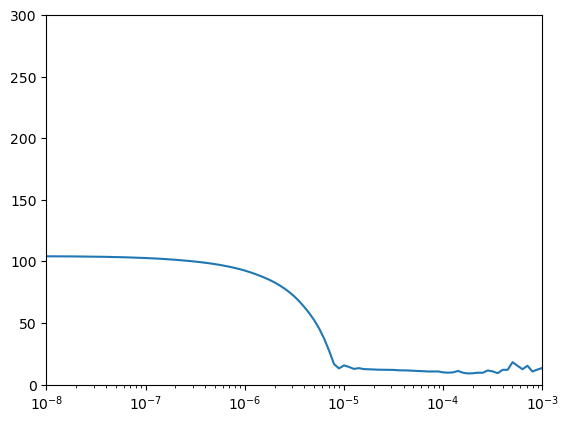

In [86]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [87]:
# MAPEが最小になる学習率は10^-4あたり

In [88]:
%%time
# keras tunerでパラメータを探索
# split_by_120/CNN_1

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv1D(filters=hp.Int('units',min_value=128, max_value=256, step=64), 
                                   kernel_size=hp.Int('kernels', min_value=3, max_value=9, step=3),
                                   strides=hp.Int('strides', min_value=1, max_value=3, step=1),
                                   padding=hp.Choice('padding', ['causal', 'valid', 'same']),
                                   activation='relu', input_shape=[None, 1]))

  model.add(Dense(units=hp.Int('units1', min_value=2, max_value=30, step=4), activation='relu'))
  model.add(Dense(units=hp.Int('units2', min_value=2, max_value=30, step=4), activation='relu'))
  model.add(Dense(1))

  model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[0.5, 0.7, 0.9]), lr=1e-4))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=100, executions_per_trial=3, directory='split_by_120', project_name='CNN_1')

tuner.search_space_summary()

tuner.search(dataset, epochs=500, verbose=1)

Trial 100 Complete [00h 02m 21s]
loss: 7.8472723960876465

Best loss So Far: 6.240069230397542
Total elapsed time: 03h 32m 26s
INFO:tensorflow:Oracle triggered exit
CPU times: user 2h 20min 45s, sys: 19min 33s, total: 2h 40min 19s
Wall time: 3h 32min 26s


In [89]:
tuner.results_summary()

Results summary
Results in split_by_120/CNN_1
Showing 10 best trials
Trial summary
Hyperparameters:
units: 128
kernels: 9
strides: 3
padding: valid
units1: 18
units2: 10
momentum: 0.5
Score: 6.240069230397542
Trial summary
Hyperparameters:
units: 128
kernels: 9
strides: 1
padding: valid
units1: 30
units2: 10
momentum: 0.9
Score: 6.327982107798259
Trial summary
Hyperparameters:
units: 256
kernels: 9
strides: 2
padding: valid
units1: 26
units2: 26
momentum: 0.7
Score: 6.361733118693034
Trial summary
Hyperparameters:
units: 256
kernels: 9
strides: 2
padding: valid
units1: 14
units2: 18
momentum: 0.5
Score: 6.372684319814046
Trial summary
Hyperparameters:
units: 128
kernels: 9
strides: 2
padding: valid
units1: 18
units2: 26
momentum: 0.9
Score: 6.381832758585612
Trial summary
Hyperparameters:
units: 128
kernels: 9
strides: 2
padding: valid
units1: 18
units2: 22
momentum: 0.9
Score: 6.388699531555176
Trial summary
Hyperparameters:
units: 192
kernels: 9
strides: 2
padding: valid
units1: 30
u

In [101]:
from tensorflow.keras.layers import Conv1D

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Conv1D(filters=128, kernel_size=9, strides=3, padding='valid', activation='relu', input_shape=[None, 1]))
model.add(Dense(18, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 10ms/step - loss: 99.2470
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 94.7969
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 89.2909
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 82.1325
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 71.6771
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 55.2826
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 24.6424
Epoch 8/500
4/4 [==============================] - 0s 8ms/step - loss: 7.4332
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 7.3570
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 6.6481
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9445
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 6.8416
Epoch 13/500
4/4 [==============================] - 0s 3ms/step -

4/4 [==============================] - 0s 2ms/step - loss: 6.6849
Epoch 207/500
4/4 [==============================] - 0s 2ms/step - loss: 7.1329
Epoch 208/500
4/4 [==============================] - 0s 2ms/step - loss: 6.6804
Epoch 209/500
4/4 [==============================] - 0s 2ms/step - loss: 6.4211
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 6.5097
Epoch 211/500
4/4 [==============================] - 0s 3ms/step - loss: 6.3967
Epoch 212/500
4/4 [==============================] - 0s 3ms/step - loss: 7.6157
Epoch 213/500
4/4 [==============================] - 0s 3ms/step - loss: 6.6136
Epoch 214/500
4/4 [==============================] - 0s 2ms/step - loss: 7.0115
Epoch 215/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8708
Epoch 216/500
4/4 [==============================] - 0s 2ms/step - loss: 7.3034
Epoch 217/500
4/4 [==============================] - 0s 3ms/step - loss: 7.1029
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 7.4547
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 7.3153
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 6.3584
Epoch 413/500
4/4 [==============================] - 0s 2ms/step - loss: 6.7628
Epoch 414/500
4/4 [==============================] - 0s 2ms/step - loss: 6.3405
Epoch 415/500
4/4 [==============================] - 0s 3ms/step - loss: 6.6965
Epoch 416/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4337
Epoch 417/500
4/4 [==============================] - 0s 2ms/step - loss: 7.4925
Epoch 418/500
4/4 [==============================] - 0s 4ms/step - loss: 7.4498
Epoch 419/500
4/4 [==============================] - 0s 3ms/step - loss: 6.6623
Epoch 420/500
4/4 [==============================] - 0s 3ms/step - loss: 6.2555
Epoch 421/500
4/4 [==============================] - 0s 2ms/step - loss: 6.5134
Epoch 422/500
4/4 [==============================] - 0

5/5 [==============================] - 0s 15ms/step


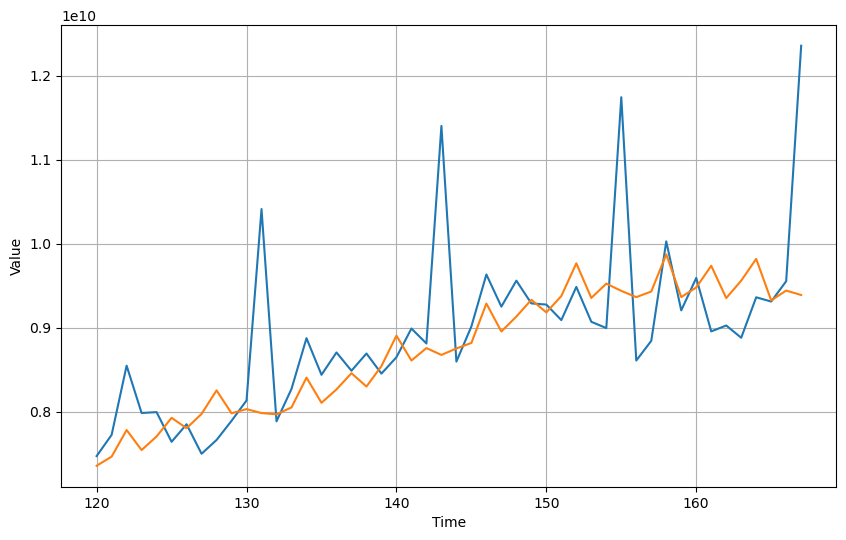

In [102]:
forecast = model_forecast(model, series[..., np.newaxis], window_size)
results = forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [103]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, results))

MAPE:
0.050908180346724084


In [265]:
cnn_forecast = forecast
cnn_test_pred = results

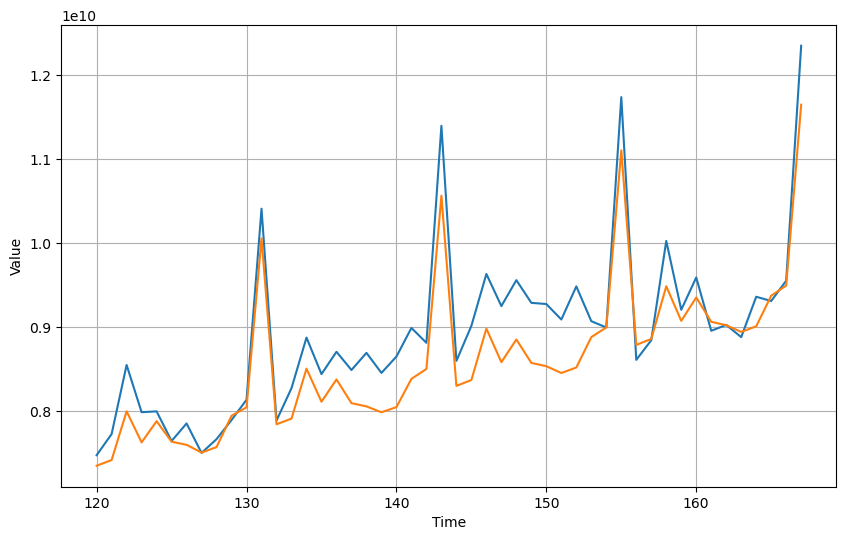

In [266]:
# SARIMAX
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, sarimax_test_pred)

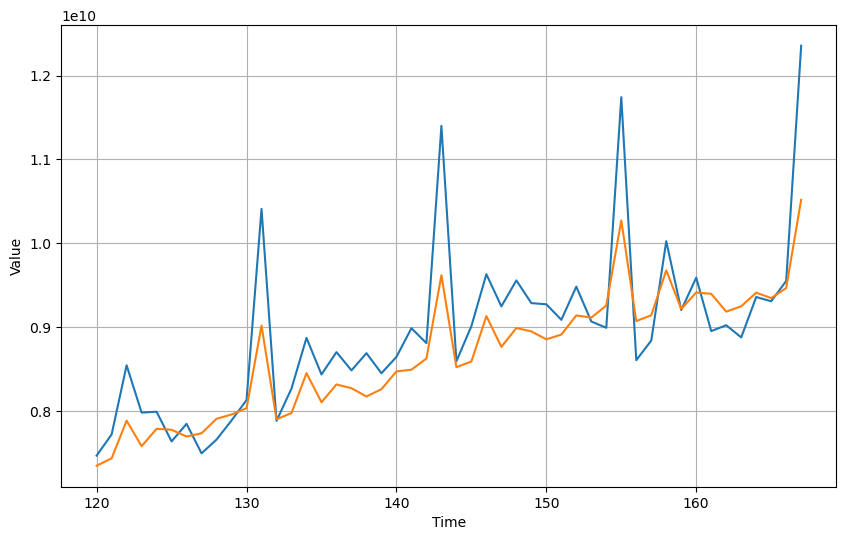

In [268]:
# SARIMAX CNN average
cnn_sarimax = np.stack((cnn_test_pred, sarimax_test_pred))
cnn_sarimax_ave_test_pred = np.mean(cnn_sarimax, axis=0)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, cnn_sarimax_ave_test_pred)

In [269]:
# MAPE
print('CNN MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_test_pred))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('CNN SARIMAX AVERAGE MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_sarimax_ave_test_pred))

CNN MAPE:
0.050908180346724084
SARIMAX MAPE:
0.0382686725025465
CNN SARIMAX AVERAGE MAPE:
0.04007397699556492


In [270]:
# SARIMAXとCNNの平均のMAPEは、CNN単体よりも改善したが、SARIMAXには及ばなかった。
# SARIMAXは12月の売上の上昇などの季節性トレンドを把握できているが、平時は微妙。
# 一方でCNNは平時の予想ができているが、季節性トレンドまでは把握できず。
# 変動が小さい時はCNNに重みを、変動が大きい時はSARIMAXに重みを大きくつければ、予測精度はより向上すると考えられる。

In [271]:
# DNNの時のようにCNNとSARIMAXに重みをつけていく

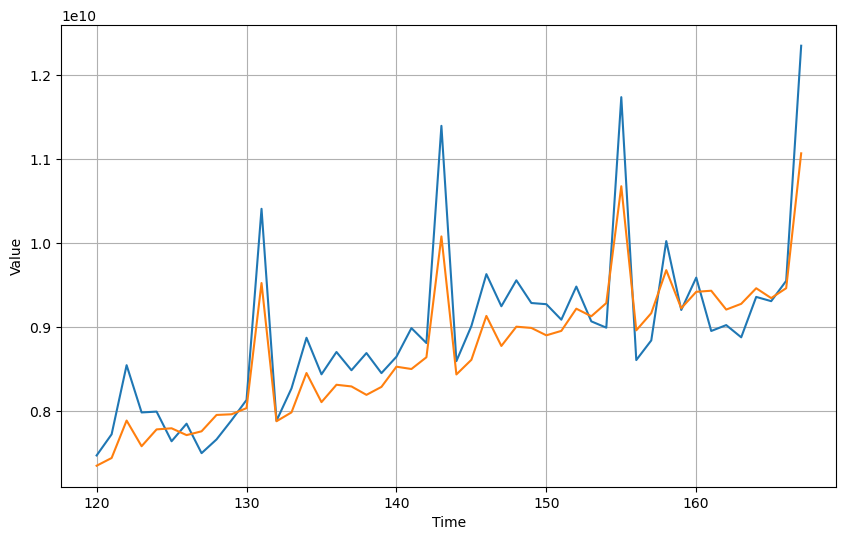

In [280]:
# b*SARIMAX+c*CNN

cnn_deviation_weighted_test_pred = np.array(b*sarimax_test_pred+c*cnn_test_pred)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, cnn_deviation_weighted_test_pred)

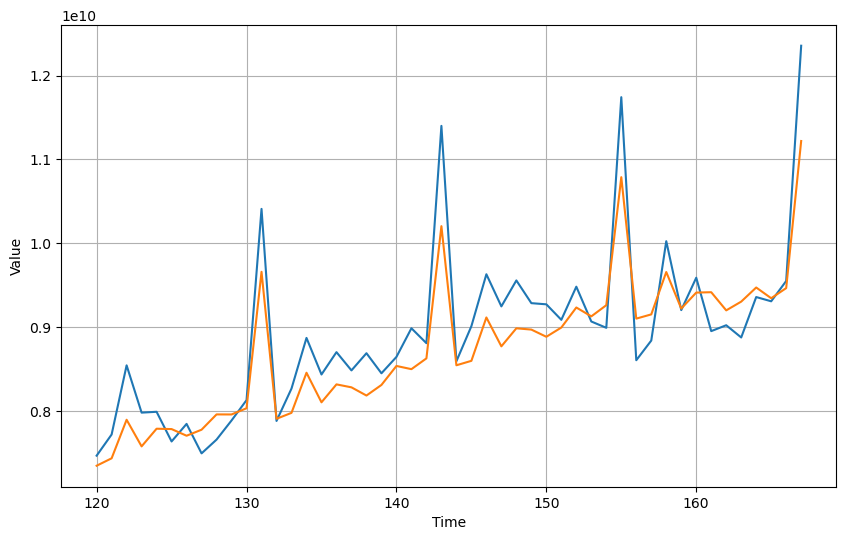

In [453]:
# e*SARIMAX+f*CNN
cnn_diff_moving_average_test_pred = np.array(e*sarimax_test_pred+f*cnn_test_pred)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, cnn_diff_moving_average_test_pred)

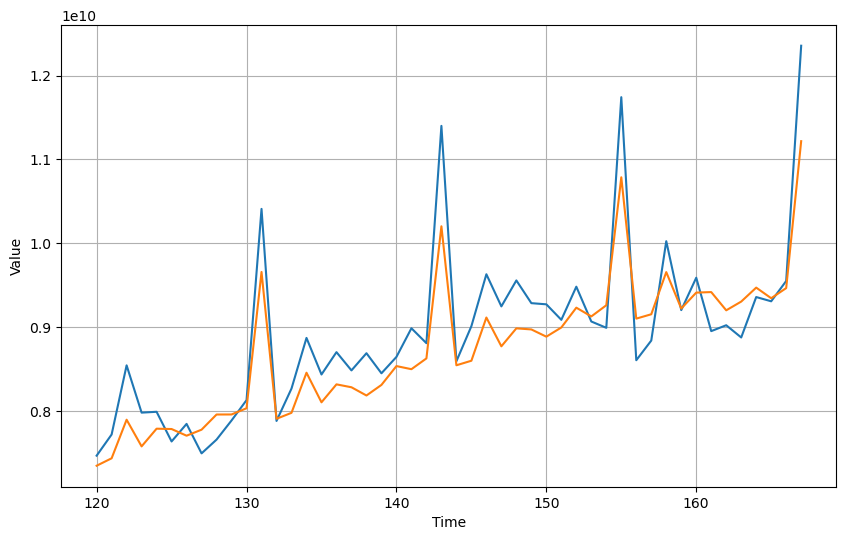

In [454]:
# g*SARIMAX+h*CNN
cnn_seasonal_trend_test_pred = np.array(g*sarimax_test_pred+h*cnn_test_pred)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, cnn_seasonal_trend_test_pred)

In [455]:
# MAPE
print('CNN MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_test_pred))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('CNN SARIMAX Average MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_sarimax_ave_test_pred))
print('CNN SARIMAX Deviation weighted MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_deviation_weighted_test_pred))
print('CNN SARIMAX Diff Moving Average MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_diff_moving_average_test_pred))
print('CNN SARIMAX Seasonal Trend MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_seasonal_trend_test_pred))

CNN MAPE:
0.050908180346724084
SARIMAX MAPE:
0.0382686725025465
CNN SARIMAX Average MAPE:
0.04007397699556492
CNN SARIMAX Deviation weighted MAPE:
0.03626086428414676
CNN SARIMAX Diff Moving Average MAPE:
0.03546420392196092
CNN SARIMAX Seasonal Trend MAPE:
0.035472860023268236


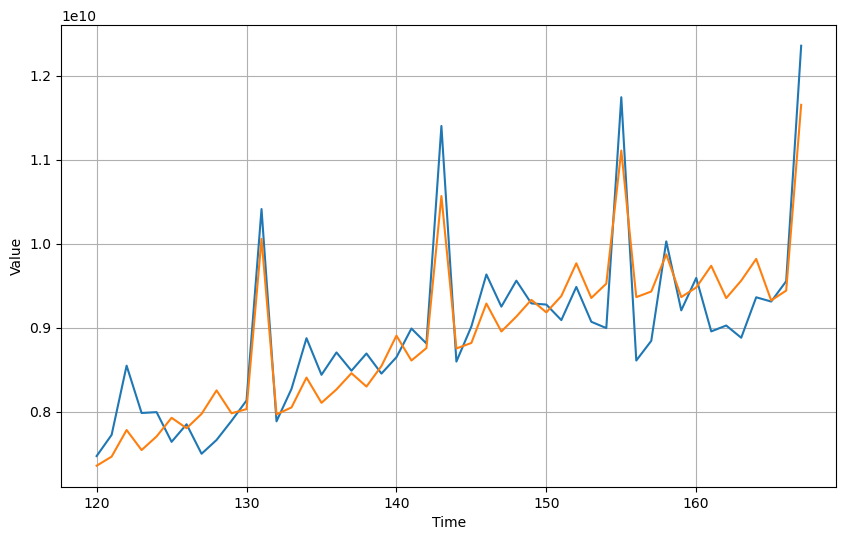

In [340]:
# 単純に12月だけSARIMAX、それ以外をCNNとしてやってみる

# CNNの12月以外の各値
cnn_test_pred_1_11 = cnn_test_pred.reshape(4,12)[:, 0:11]

# 1月-11月がDNN , 12月がSARIMAX
cnn_1_11_sarimax_12_test_pred =np.ravel(np.append(cnn_test_pred_1_11, sarimax_test_pred_12, axis=1))

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, cnn_1_11_sarimax_12_test_pred)

In [456]:
# MAPE
print('CNN MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_test_pred))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('CNN SARIMAX Average MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_sarimax_ave_test_pred))
print('CNN SARIMAX Deviation weighted MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_deviation_weighted_test_pred))
print('CNN SARIMAX Diff Moving Average MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_diff_moving_average_test_pred))
print('CNN SARIMAX Seasonal Trend MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_seasonal_trend_test_pred))
print('CNN 1-11 SARIMAX 12 MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_1_11_sarimax_12_test_pred))

CNN MAPE:
0.050908180346724084
SARIMAX MAPE:
0.0382686725025465
CNN SARIMAX Average MAPE:
0.04007397699556492
CNN SARIMAX Deviation weighted MAPE:
0.03626086428414676
CNN SARIMAX Diff Moving Average MAPE:
0.03546420392196092
CNN SARIMAX Seasonal Trend MAPE:
0.035472860023268236
CNN 1-11 SARIMAX 12 MAPE:
0.036517001523773206


In [343]:
# RNN

In [344]:
from tensorflow.keras.layers import SimpleRNN

In [382]:
%%time
# 学習率の大まかなエリアを絞り込む
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=True, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss="mape", optimizer=optimizer)
history = model.fit(dataset, epochs=500, callbacks=[lr_schedule], verbose=0)

CPU times: user 30.3 s, sys: 4.75 s, total: 35.1 s
Wall time: 18.9 s


(1e-08, 0.001, 0.0, 300.0)

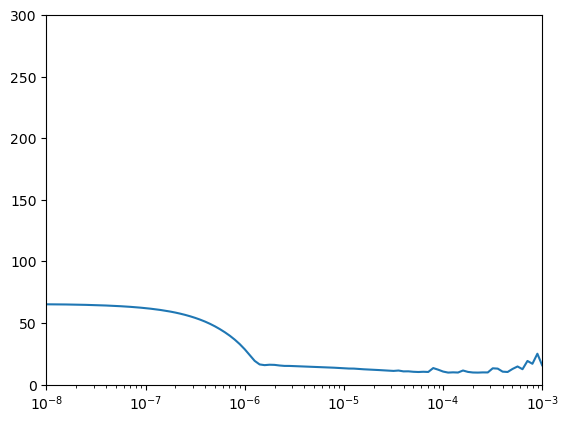

In [383]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [378]:
# MAPEは学習率が10^-4以下で最小となる

In [379]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=True, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 19ms/step - loss: 114.8186
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 100.9187
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 93.1513
Epoch 4/500
4/4 [==============================] - 0s 28ms/step - loss: 87.3804
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 79.4327
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 65.7405
Epoch 7/500
4/4 [==============================] - 0s 7ms/step - loss: 32.8186
Epoch 8/500
4/4 [==============================] - 0s 8ms/step - loss: 21.2975
Epoch 9/500
4/4 [==============================] - 0s 7ms/step - loss: 18.2093
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 16.8368
Epoch 11/500
4/4 [==============================] - 0s 8ms/step - loss: 15.9785
Epoch 12/500
4/4 [==============================] - 0s 9ms/step - loss: 15.8879
Epoch 13/500
4/4 [===========================

4/4 [==============================] - 0s 10ms/step - loss: 8.5618
Epoch 206/500
4/4 [==============================] - 0s 7ms/step - loss: 8.6845
Epoch 207/500
4/4 [==============================] - 0s 6ms/step - loss: 8.3642
Epoch 208/500
4/4 [==============================] - 0s 7ms/step - loss: 8.3851
Epoch 209/500
4/4 [==============================] - 0s 9ms/step - loss: 8.4988
Epoch 210/500
4/4 [==============================] - 0s 8ms/step - loss: 9.2079
Epoch 211/500
4/4 [==============================] - 0s 8ms/step - loss: 8.3504
Epoch 212/500
4/4 [==============================] - 0s 7ms/step - loss: 9.4235
Epoch 213/500
4/4 [==============================] - 0s 7ms/step - loss: 8.3408
Epoch 214/500
4/4 [==============================] - 0s 7ms/step - loss: 8.2980
Epoch 215/500
4/4 [==============================] - 0s 7ms/step - loss: 8.8975
Epoch 216/500
4/4 [==============================] - 0s 7ms/step - loss: 8.5249
Epoch 217/500
4/4 [==============================] - 

4/4 [==============================] - 0s 6ms/step - loss: 7.9281
Epoch 410/500
4/4 [==============================] - 0s 6ms/step - loss: 7.4796
Epoch 411/500
4/4 [==============================] - 0s 6ms/step - loss: 7.5263
Epoch 412/500
4/4 [==============================] - 0s 6ms/step - loss: 7.7558
Epoch 413/500
4/4 [==============================] - 0s 5ms/step - loss: 11.3277
Epoch 414/500
4/4 [==============================] - 0s 6ms/step - loss: 7.8046
Epoch 415/500
4/4 [==============================] - 0s 6ms/step - loss: 7.8473
Epoch 416/500
4/4 [==============================] - 0s 6ms/step - loss: 8.3867
Epoch 417/500
4/4 [==============================] - 0s 6ms/step - loss: 7.9356
Epoch 418/500
4/4 [==============================] - 0s 6ms/step - loss: 7.5561
Epoch 419/500
4/4 [==============================] - 0s 6ms/step - loss: 8.3105
Epoch 420/500
4/4 [==============================] - 0s 9ms/step - loss: 8.0120
Epoch 421/500
4/4 [==============================] - 

1/1 [==============================] - 0s 21ms/step


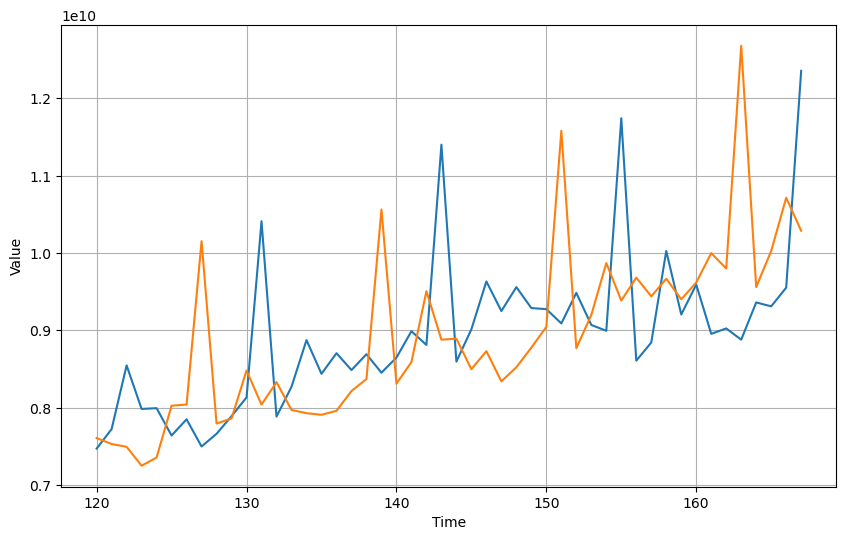

In [380]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [381]:
# ピークが微妙

In [384]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=False, activation='relu'))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 13ms/step - loss: 79.7493
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 26.6650
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 15.9691
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 7.4149
Epoch 5/500
4/4 [==============================] - 0s 8ms/step - loss: 9.0267
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 11.3238
Epoch 7/500
4/4 [==============================] - 0s 7ms/step - loss: 7.8222
Epoch 8/500
4/4 [==============================] - 0s 11ms/step - loss: 8.2355
Epoch 9/500
4/4 [==============================] - 0s 9ms/step - loss: 14.0038
Epoch 10/500
4/4 [==============================] - 0s 20ms/step - loss: 12.1126
Epoch 11/500
4/4 [==============================] - 0s 7ms/step - loss: 7.2189
Epoch 12/500
4/4 [==============================] - 0s 8ms/step - loss: 7.2389
Epoch 13/500
4/4 [==============================] -

4/4 [==============================] - 0s 6ms/step - loss: 5.8176
Epoch 207/500
4/4 [==============================] - 0s 6ms/step - loss: 5.8297
Epoch 208/500
4/4 [==============================] - 0s 5ms/step - loss: 5.5690
Epoch 209/500
4/4 [==============================] - 0s 6ms/step - loss: 7.9051
Epoch 210/500
4/4 [==============================] - 0s 6ms/step - loss: 5.5883
Epoch 211/500
4/4 [==============================] - 0s 7ms/step - loss: 5.3872
Epoch 212/500
4/4 [==============================] - 0s 7ms/step - loss: 5.9527
Epoch 213/500
4/4 [==============================] - 0s 7ms/step - loss: 5.8416
Epoch 214/500
4/4 [==============================] - 0s 6ms/step - loss: 6.7422
Epoch 215/500
4/4 [==============================] - 0s 8ms/step - loss: 7.2068
Epoch 216/500
4/4 [==============================] - 0s 6ms/step - loss: 6.0601
Epoch 217/500
4/4 [==============================] - 0s 6ms/step - loss: 5.6631
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 6ms/step - loss: 4.1907
Epoch 411/500
4/4 [==============================] - 0s 7ms/step - loss: 5.6135
Epoch 412/500
4/4 [==============================] - 0s 8ms/step - loss: 4.0757
Epoch 413/500
4/4 [==============================] - 0s 6ms/step - loss: 5.6336
Epoch 414/500
4/4 [==============================] - 0s 5ms/step - loss: 5.1875
Epoch 415/500
4/4 [==============================] - 0s 6ms/step - loss: 4.7304
Epoch 416/500
4/4 [==============================] - 0s 6ms/step - loss: 4.9176
Epoch 417/500
4/4 [==============================] - 0s 6ms/step - loss: 4.6154
Epoch 418/500
4/4 [==============================] - 0s 10ms/step - loss: 5.7403
Epoch 419/500
4/4 [==============================] - 0s 6ms/step - loss: 5.5458
Epoch 420/500
4/4 [==============================] - 0s 6ms/step - loss: 6.1971
Epoch 421/500
4/4 [==============================] - 0s 6ms/step - loss: 4.4442
Epoch 422/500
4/4 [==============================] - 

1/1 [==============================] - 0s 18ms/step


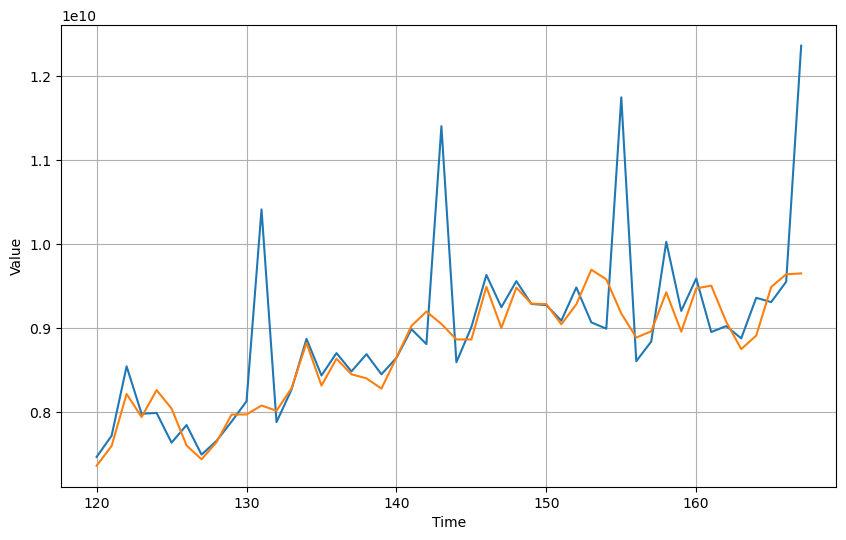

In [385]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [353]:
# ピークは取れないが、return_sequencesをFalseにした方がかなり傾向が掴める

In [386]:
%%time
# return_sequencesをFalseにした時の学習率の大まかなエリアを絞り込む
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=False, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss="mape", optimizer=optimizer)
history = model.fit(dataset, epochs=500, callbacks=[lr_schedule], verbose=0)

CPU times: user 28.7 s, sys: 4.56 s, total: 33.2 s
Wall time: 17.5 s


(1e-08, 0.001, 0.0, 300.0)

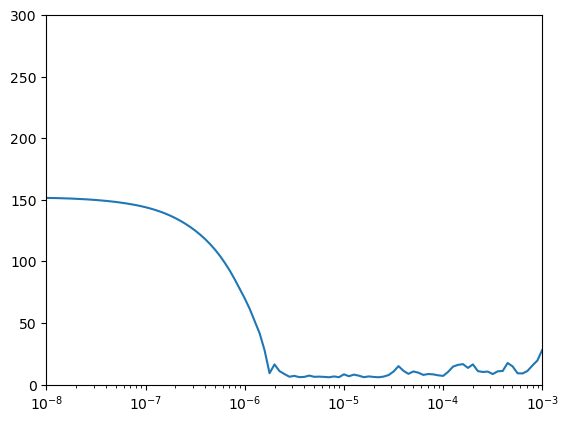

In [387]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [390]:
#この場合ではMAPEは学習率が10^-6から10^-4くらいで最小となる

In [399]:
%%time
# keras tunerでパラメータを探索
# split_by_120/RNN_1

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):
  model = Sequential()
  model.add(SimpleRNN(units=hp.Int('rnn', min_value=20, max_value=200, step=20), input_shape=[None, 1], return_sequences=False, activation='relu'))
  model.add(Dense(units=hp.Int('units2', min_value=2, max_value=30, step=4), activation='relu'))
  model.add(Dense(1))

  model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[0.5, 0.7, 0.9]), lr=1e-5))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=60, executions_per_trial=3, directory='split_by_120', project_name='RNN_1')

tuner.search_space_summary()

tuner.search(dataset, epochs=500, verbose=1)

Trial 60 Complete [00h 01m 08s]
loss: 5.965956528981526

Best loss So Far: 5.216652552286784
Total elapsed time: 01h 32m 04s
INFO:tensorflow:Oracle triggered exit
CPU times: user 1h 49min 14s, sys: 15min 16s, total: 2h 4min 31s
Wall time: 1h 32min 4s


In [400]:
tuner.results_summary()

Results summary
Results in split_by_120/RNN_1
Showing 10 best trials
Trial summary
Hyperparameters:
rnn: 120
units2: 10
momentum: 0.7
Score: 5.216652552286784
Trial summary
Hyperparameters:
rnn: 80
units2: 10
momentum: 0.9
Score: 5.224790255228679
Trial summary
Hyperparameters:
rnn: 140
units2: 10
momentum: 0.7
Score: 5.24567445119222
Trial summary
Hyperparameters:
rnn: 200
units2: 18
momentum: 0.9
Score: 5.2899525960286455
Trial summary
Hyperparameters:
rnn: 160
units2: 22
momentum: 0.7
Score: 5.309006055196126
Trial summary
Hyperparameters:
rnn: 100
units2: 10
momentum: 0.7
Score: 5.326015790303548
Trial summary
Hyperparameters:
rnn: 140
units2: 26
momentum: 0.5
Score: 5.331486225128174
Trial summary
Hyperparameters:
rnn: 120
units2: 22
momentum: 0.9
Score: 5.376912911732991
Trial summary
Hyperparameters:
rnn: 140
units2: 10
momentum: 0.5
Score: 5.377830187479655
Trial summary
Hyperparameters:
rnn: 120
units2: 18
momentum: 0.9
Score: 5.378646691640218


In [403]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(120, input_shape=[None, 1], return_sequences=False, activation='relu'))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.7))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 20ms/step - loss: 136.7263
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 124.9915
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 110.4931
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 95.5793
Epoch 5/500
4/4 [==============================] - 0s 8ms/step - loss: 81.2278
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 67.6174
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 54.8809
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 41.8292
Epoch 9/500
4/4 [==============================] - 0s 7ms/step - loss: 27.0377
Epoch 10/500
4/4 [==============================] - 0s 8ms/step - loss: 12.0217
Epoch 11/500
4/4 [==============================] - 0s 7ms/step - loss: 7.7616
Epoch 12/500
4/4 [==============================] - 0s 7ms/step - loss: 7.3912
Epoch 13/500
4/4 [===========================

4/4 [==============================] - 0s 7ms/step - loss: 5.8422
Epoch 207/500
4/4 [==============================] - 0s 7ms/step - loss: 5.7450
Epoch 208/500
4/4 [==============================] - 0s 14ms/step - loss: 5.6329
Epoch 209/500
4/4 [==============================] - 0s 9ms/step - loss: 5.7782
Epoch 210/500
4/4 [==============================] - 0s 7ms/step - loss: 5.7684
Epoch 211/500
4/4 [==============================] - 0s 8ms/step - loss: 5.5211
Epoch 212/500
4/4 [==============================] - 0s 7ms/step - loss: 6.3177
Epoch 213/500
4/4 [==============================] - 0s 8ms/step - loss: 5.4395
Epoch 214/500
4/4 [==============================] - 0s 7ms/step - loss: 5.5120
Epoch 215/500
4/4 [==============================] - 0s 7ms/step - loss: 5.5754
Epoch 216/500
4/4 [==============================] - 0s 9ms/step - loss: 5.6876
Epoch 217/500
4/4 [==============================] - 0s 9ms/step - loss: 5.5227
Epoch 218/500
4/4 [==============================] - 

4/4 [==============================] - 0s 6ms/step - loss: 5.3675
Epoch 411/500
4/4 [==============================] - 0s 9ms/step - loss: 5.2557
Epoch 412/500
4/4 [==============================] - 0s 7ms/step - loss: 5.2041
Epoch 413/500
4/4 [==============================] - 0s 6ms/step - loss: 5.1901
Epoch 414/500
4/4 [==============================] - 0s 7ms/step - loss: 5.1483
Epoch 415/500
4/4 [==============================] - 0s 6ms/step - loss: 5.3738
Epoch 416/500
4/4 [==============================] - 0s 6ms/step - loss: 5.2417
Epoch 417/500
4/4 [==============================] - 0s 6ms/step - loss: 5.1287
Epoch 418/500
4/4 [==============================] - 0s 5ms/step - loss: 5.2440
Epoch 419/500
4/4 [==============================] - 0s 5ms/step - loss: 5.5078
Epoch 420/500
4/4 [==============================] - 0s 5ms/step - loss: 5.4974
Epoch 421/500
4/4 [==============================] - 0s 7ms/step - loss: 5.1465
Epoch 422/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 20ms/step


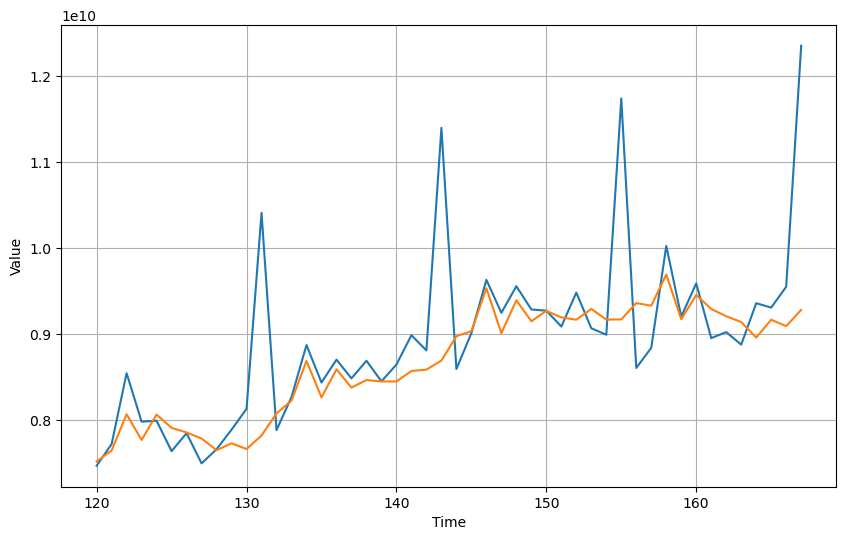

In [404]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [406]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.04217970299934127


In [407]:
rnn_forecast = forecast
rnn_test_pred = test_pred

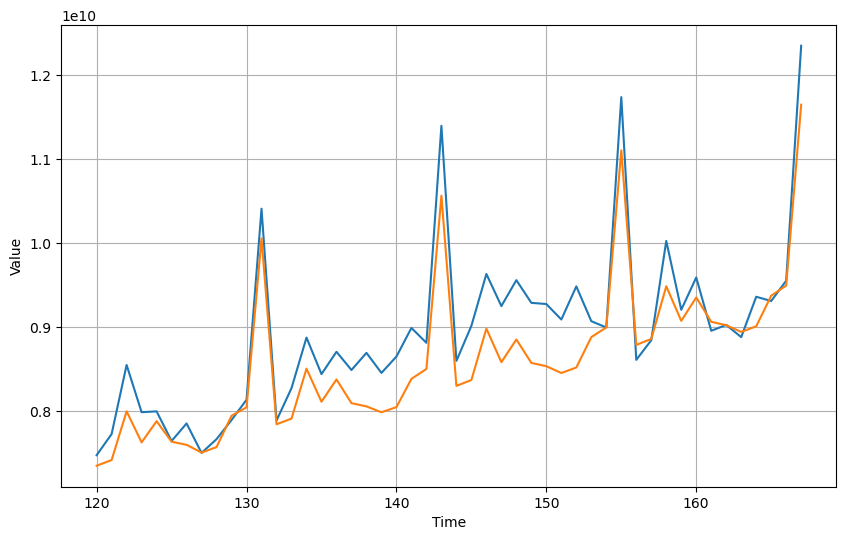

In [408]:
# SARIMAX
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, sarimax_test_pred)

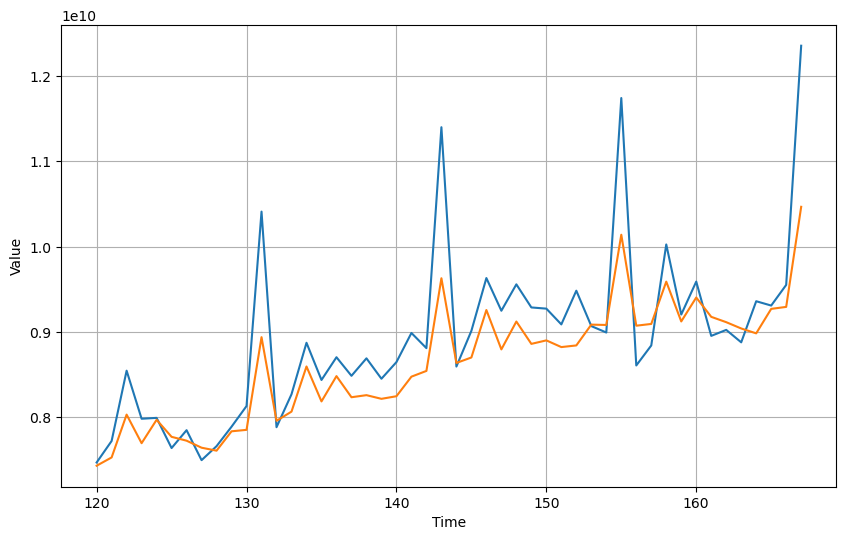

In [409]:
# SARIMAX RNN average
rnn_sarimax = np.stack((rnn_test_pred, sarimax_test_pred))
rnn_sarimax_ave_test_pred = np.mean(rnn_sarimax, axis=0)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_sarimax_ave_test_pred)

In [410]:
# MAPE
print('RNN MAPE:')
print(mean_absolute_percentage_error(x_valid, rnn_test_pred))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('RNN SARIMAX AVERAGE MAPE:')
print(mean_absolute_percentage_error(x_valid, rnn_sarimax_ave_test_pred))

RNN MAPE:
0.04217970299934127
SARIMAX MAPE:
0.0382686725025465
RNN SARIMAX AVERAGE MAPE:
0.0379929443051742


In [411]:
# SARIMAXとRNNの平均のMAPEは、RNN・SARIMAX単体よりも改善した。
# SARIMAXは12月の売上の上昇などの季節性トレンドを把握できているが、平時は微妙。
# 一方でRNNは平時の予想ができているが、季節性トレンドまでは把握できず。
# 変動が小さい時はRNNに重みを、変動が大きい時はSARIMAXに重みを大きくつければ、予測精度はより向上すると考えられる。

In [412]:
# DNN・CNNの時のようにRNNとSARIMAXに重みをつけていく

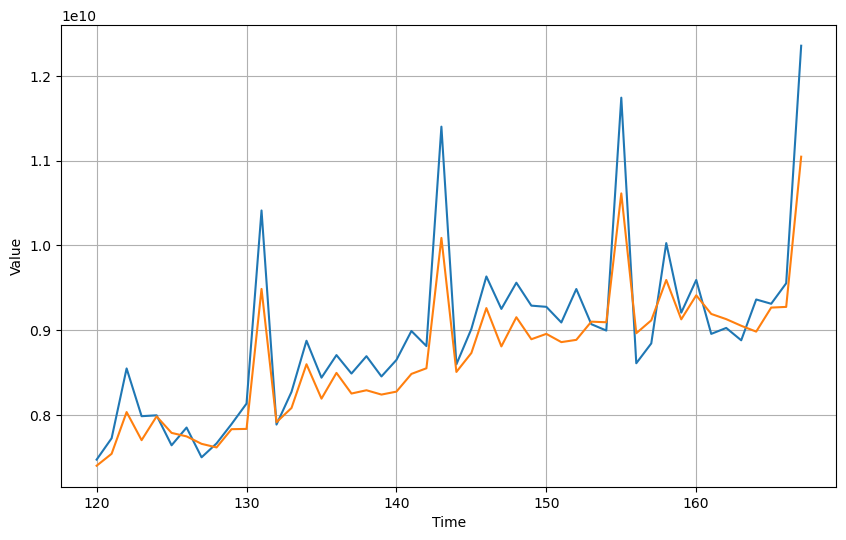

In [413]:
# b*SARIMAX+c*RNN

rnn_deviation_weighted_test_pred = np.array(b*sarimax_test_pred+c*rnn_test_pred)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_deviation_weighted_test_pred)

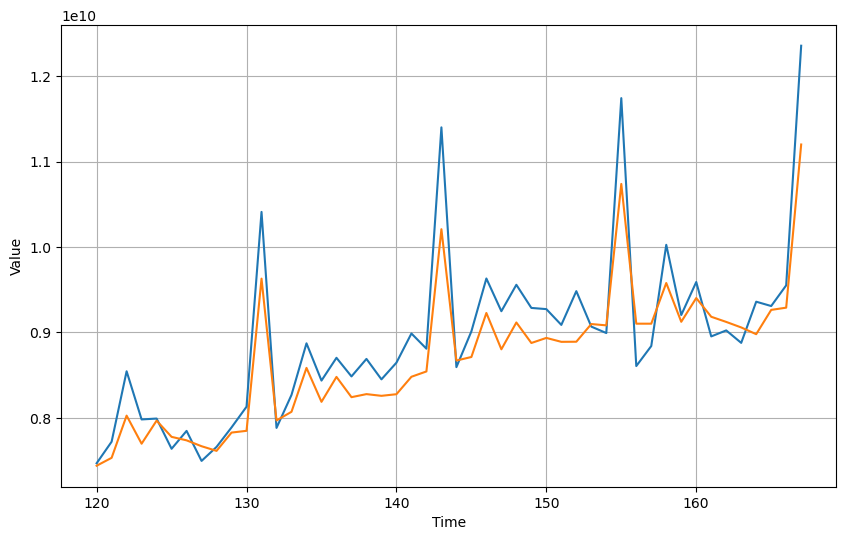

In [457]:
# e*SARIMAX+f*RNN
rnn_diff_moving_average_test_pred = np.array(e*sarimax_test_pred+f*rnn_test_pred)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_diff_moving_average_test_pred)

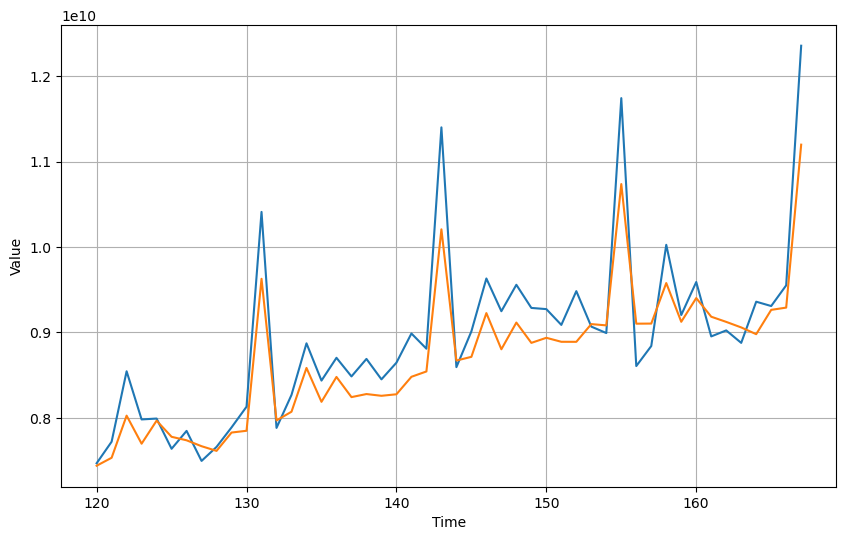

In [458]:
# g*SARIMAX+h*RNN
rnn_seasonal_trend_test_pred = np.array(g*sarimax_test_pred+h*rnn_test_pred)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_seasonal_trend_test_pred)

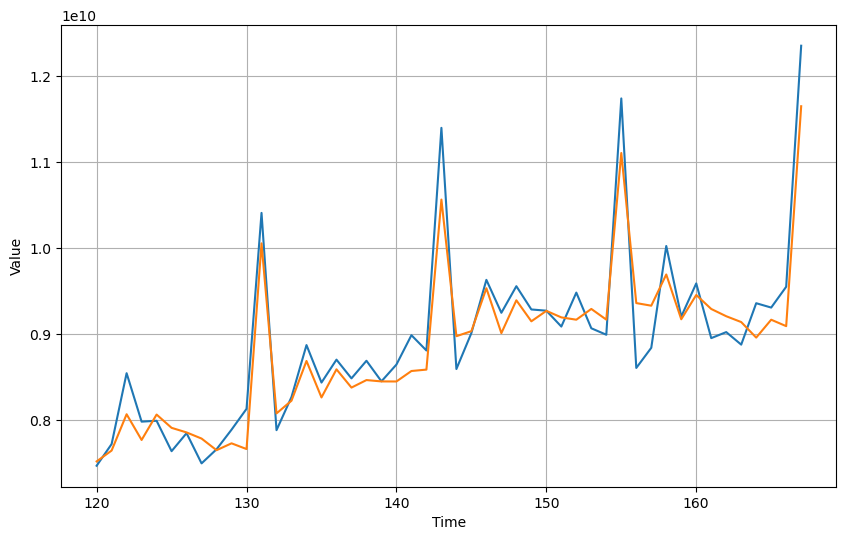

In [459]:
# 単純に12月だけSARIMAX、それ以外をCNNとしてやってみる

# RNNの12月以外の各値
rnn_test_pred_1_11 = rnn_test_pred.reshape(4,12)[:, 0:11]

# 1月-11月がRNN , 12月がSARIMAX
rnn_1_11_sarimax_12_test_pred =np.ravel(np.append(rnn_test_pred_1_11, sarimax_test_pred_12, axis=1))

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_1_11_sarimax_12_test_pred)

In [460]:
# MAPE
print('RNN MAPE:')
print(mean_absolute_percentage_error(x_valid, rnn_test_pred))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('RNN SARIMAX Average MAPE:')
print(mean_absolute_percentage_error(x_valid, rnn_sarimax_ave_test_pred))
print('RNN SARIMAX Deviation weighted MAPE:')
print(mean_absolute_percentage_error(x_valid, rnn_deviation_weighted_test_pred))
print('RNN SARIMAX Diff Moving Average MAPE:')
print(mean_absolute_percentage_error(x_valid, rnn_diff_moving_average_test_pred))
print('RNN SARIMAX Seasonal Trend MAPE:')
print(mean_absolute_percentage_error(x_valid, rnn_seasonal_trend_test_pred))
print('RNN 1-11 SARIMAX 12 MAPE:')
print(mean_absolute_percentage_error(x_valid, rnn_1_11_sarimax_12_test_pred))

RNN MAPE:
0.04217970299934127
SARIMAX MAPE:
0.0382686725025465
RNN SARIMAX Average MAPE:
0.0379929443051742
RNN SARIMAX Deviation weighted MAPE:
0.033482091569163965
RNN SARIMAX Diff Moving Average MAPE:
0.033053069868184036
RNN SARIMAX Seasonal Trend MAPE:
0.03305951684735566
RNN 1-11 SARIMAX 12 MAPE:
0.02685606659341459


In [537]:
# CNN2

In [464]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=[None, 1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 16ms/step - loss: 101.6511
Epoch 2/500
4/4 [==============================] - 0s 16ms/step - loss: 95.0997
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 89.8475
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 84.6232
Epoch 5/500
4/4 [==============================] - 0s 8ms/step - loss: 78.0673
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 69.5607
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 57.9187
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 41.7450
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 18.7843
Epoch 10/500
4/4 [==============================] - 0s 4ms/step - loss: 8.8330
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 8.1795
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 8.1425
Epoch 13/500
4/4 [==============================]

4/4 [==============================] - 0s 3ms/step - loss: 7.8433
Epoch 207/500
4/4 [==============================] - 0s 3ms/step - loss: 7.8575
Epoch 208/500
4/4 [==============================] - 0s 2ms/step - loss: 7.8022
Epoch 209/500
4/4 [==============================] - 0s 3ms/step - loss: 7.8163
Epoch 210/500
4/4 [==============================] - 0s 4ms/step - loss: 7.7749
Epoch 211/500
4/4 [==============================] - 0s 3ms/step - loss: 7.7326
Epoch 212/500
4/4 [==============================] - 0s 3ms/step - loss: 7.7720
Epoch 213/500
4/4 [==============================] - 0s 5ms/step - loss: 7.7094
Epoch 214/500
4/4 [==============================] - 0s 3ms/step - loss: 7.7284
Epoch 215/500
4/4 [==============================] - 0s 3ms/step - loss: 7.8657
Epoch 216/500
4/4 [==============================] - 0s 3ms/step - loss: 7.8049
Epoch 217/500
4/4 [==============================] - 0s 4ms/step - loss: 7.7432
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 4ms/step - loss: 7.6250
Epoch 411/500
4/4 [==============================] - 0s 4ms/step - loss: 7.7226
Epoch 412/500
4/4 [==============================] - 0s 5ms/step - loss: 7.5530
Epoch 413/500
4/4 [==============================] - 0s 5ms/step - loss: 7.6343
Epoch 414/500
4/4 [==============================] - 0s 4ms/step - loss: 7.6656
Epoch 415/500
4/4 [==============================] - 0s 7ms/step - loss: 7.6076
Epoch 416/500
4/4 [==============================] - 0s 7ms/step - loss: 7.5404
Epoch 417/500
4/4 [==============================] - 0s 3ms/step - loss: 7.5813
Epoch 418/500
4/4 [==============================] - 0s 3ms/step - loss: 7.5970
Epoch 419/500
4/4 [==============================] - 0s 6ms/step - loss: 7.5868
Epoch 420/500
4/4 [==============================] - 0s 6ms/step - loss: 7.5348
Epoch 421/500
4/4 [==============================] - 0s 3ms/step - loss: 7.7395
Epoch 422/500
4/4 [==============================] - 0

5/5 [==============================] - 0s 14ms/step


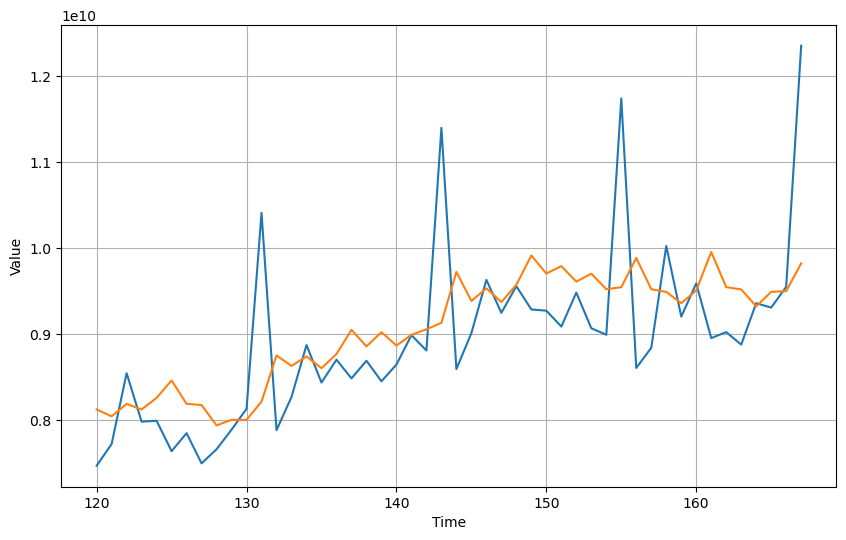

In [465]:
forecast = model_forecast(model, series[..., np.newaxis], window_size)
results = forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [466]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, results))

MAPE:
0.05923313745644171


In [467]:
# 学習率の大まかなエリアを絞り込む
# ReLU・エポック数500

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=[None, 1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss="mape", optimizer=optimizer)
history = model.fit(dataset, epochs=500, callbacks=[lr_schedule], verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 24ms/step - loss: 102.5126 - lr: 1.0000e-08
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 102.5086 - lr: 1.1220e-08
Epoch 3/500
4/4 [==============================] - 0s 22ms/step - loss: 102.5011 - lr: 1.2589e-08
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 102.4906 - lr: 1.4125e-08
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 102.4775 - lr: 1.5849e-08
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 102.4620 - lr: 1.7783e-08
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 102.4441 - lr: 1.9953e-08
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 102.4236 - lr: 2.2387e-08
Epoch 9/500
4/4 [==============================] - 0s 13ms/step - loss: 102.4004 - lr: 2.5119e-08
Epoch 10/500
4/4 [==============================] - 0s 40ms/step - loss: 102.3742 - lr: 2.8184e-08
Epoch 11/500
4/4 [==================

4/4 [==============================] - 0s 3ms/step - loss: 100.0000 - lr: 3.1623
Epoch 172/500
4/4 [==============================] - 0s 4ms/step - loss: 100.0000 - lr: 3.5481
Epoch 173/500
4/4 [==============================] - 0s 4ms/step - loss: 100.0000 - lr: 3.9811
Epoch 174/500
4/4 [==============================] - 0s 3ms/step - loss: 100.0000 - lr: 4.4668
Epoch 175/500
4/4 [==============================] - 0s 3ms/step - loss: 100.0000 - lr: 5.0119
Epoch 176/500
4/4 [==============================] - 0s 3ms/step - loss: 100.0000 - lr: 5.6234
Epoch 177/500
4/4 [==============================] - 0s 3ms/step - loss: 100.0000 - lr: 6.3096
Epoch 178/500
4/4 [==============================] - 0s 4ms/step - loss: 100.0000 - lr: 7.0795
Epoch 179/500
4/4 [==============================] - 0s 2ms/step - loss: 100.0000 - lr: 7.9433
Epoch 180/500
4/4 [==============================] - 0s 3ms/step - loss: 100.0000 - lr: 8.9125
Epoch 181/500
4/4 [==============================] - 0s 5ms/step

4/4 [==============================] - 0s 3ms/step - loss: 100.0000 - lr: 562341312.0000
Epoch 337/500
4/4 [==============================] - 0s 3ms/step - loss: 100.0000 - lr: 630957376.0000
Epoch 338/500
4/4 [==============================] - 0s 4ms/step - loss: 99.9999 - lr: 707945792.0000
Epoch 339/500
4/4 [==============================] - 0s 2ms/step - loss: 99.9999 - lr: 794328256.0000
Epoch 340/500
4/4 [==============================] - 0s 3ms/step - loss: 99.9999 - lr: 891250944.0000
Epoch 341/500
4/4 [==============================] - 0s 3ms/step - loss: 99.9999 - lr: 1000000000.0000
Epoch 342/500
4/4 [==============================] - 0s 3ms/step - loss: 99.9999 - lr: 1122018432.0000
Epoch 343/500
4/4 [==============================] - 0s 3ms/step - loss: 99.9999 - lr: 1258925440.0000
Epoch 344/500
4/4 [==============================] - 0s 2ms/step - loss: 99.9999 - lr: 1412537600.0000
Epoch 345/500
4/4 [==============================] - 0s 3ms/step - loss: 99.9999 - lr: 158

Epoch 415/500
4/4 [==============================] - 0s 4ms/step - loss: 99.5475 - lr: 5011872415744.0000
Epoch 416/500
4/4 [==============================] - 0s 4ms/step - loss: 99.4914 - lr: 5623413473280.0000
Epoch 417/500
4/4 [==============================] - 0s 4ms/step - loss: 99.4296 - lr: 6309573296128.0000
Epoch 418/500
4/4 [==============================] - 0s 4ms/step - loss: 99.3593 - lr: 7079457718272.0000
Epoch 419/500
4/4 [==============================] - 0s 3ms/step - loss: 99.2808 - lr: 7943282491392.0000
Epoch 420/500
4/4 [==============================] - 0s 6ms/step - loss: 99.1907 - lr: 8912509075456.0000
Epoch 421/500
4/4 [==============================] - 0s 6ms/step - loss: 99.0905 - lr: 9999999827968.0000
Epoch 422/500
4/4 [==============================] - 0s 3ms/step - loss: 98.9778 - lr: 11220184727552.0000
Epoch 423/500
4/4 [==============================] - 0s 3ms/step - loss: 98.8524 - lr: 12589253787648.0000
Epoch 424/500
4/4 [=========================

Epoch 491/500
4/4 [==============================] - 0s 3ms/step - loss: 18.7217 - lr: 31622776901074944.0000
Epoch 492/500
4/4 [==============================] - 0s 4ms/step - loss: 18.6141 - lr: 35481339012579328.0000
Epoch 493/500
4/4 [==============================] - 0s 4ms/step - loss: 18.1003 - lr: 39810717586554880.0000
Epoch 494/500
4/4 [==============================] - 0s 3ms/step - loss: 21.1751 - lr: 44668359958069248.0000
Epoch 495/500
4/4 [==============================] - 0s 4ms/step - loss: 20.7693 - lr: 50118724996300800.0000
Epoch 496/500
4/4 [==============================] - 0s 5ms/step - loss: 18.4045 - lr: 56234131360579584.0000
Epoch 497/500
4/4 [==============================] - 0s 3ms/step - loss: 19.2655 - lr: 63095732457963520.0000
Epoch 498/500
4/4 [==============================] - 0s 3ms/step - loss: 18.9583 - lr: 70794577300160512.0000
Epoch 499/500
4/4 [==============================] - 0s 3ms/step - loss: 19.9584 - lr: 79432825979273216.0000
Epoch 500/

(1e-08, 0.001, 0.0, 300.0)

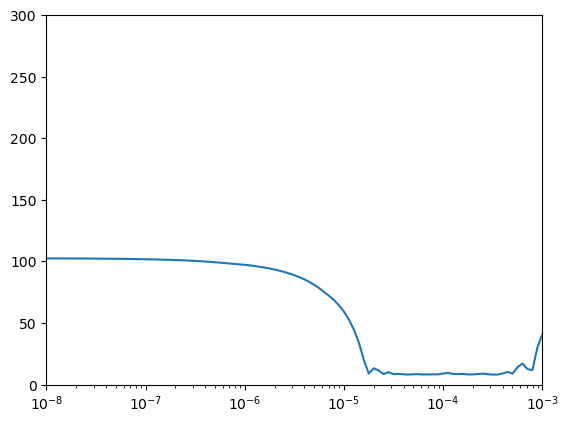

In [468]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [469]:
# MAPEが最小になる学習率は10^-3から10^-4あたり

In [474]:
%%time
# keras tunerでパラメータを探索
# split_by_120/CNN_2

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv1D(filters=hp.Int('units',min_value=128, max_value=256, step=64), 
                                   kernel_size=hp.Int('kernels', min_value=3, max_value=9, step=3),
                                   strides=hp.Int('strides', min_value=1, max_value=3, step=1),
                                   padding=hp.Choice('padding', ['causal', 'valid', 'same']),
                                   activation='relu', input_shape=[None, 1]))

  model.add(Dense(units=hp.Int('units1', min_value=2, max_value=30, step=4), activation='relu'))
  model.add(Dense(1))

  model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[0.5, 0.7, 0.9]), lr=1e-4))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=60, executions_per_trial=3, directory='split_by_120', project_name='CNN_2')

tuner.search_space_summary()

tuner.search(dataset, epochs=500, verbose=1)

Trial 60 Complete [00h 01m 13s]
loss: 7.2673659324646

Best loss So Far: 6.173786799112956
Total elapsed time: 01h 42m 53s
INFO:tensorflow:Oracle triggered exit
CPU times: user 1h 22min 8s, sys: 11min 50s, total: 1h 33min 59s
Wall time: 1h 42min 54s


In [475]:
tuner.results_summary()

Results summary
Results in split_by_120/CNN_2
Showing 10 best trials
Trial summary
Hyperparameters:
units: 256
kernels: 9
strides: 3
padding: valid
units1: 26
momentum: 0.5
Score: 6.173786799112956
Trial summary
Hyperparameters:
units: 192
kernels: 9
strides: 3
padding: valid
units1: 30
momentum: 0.7
Score: 6.240871429443359
Trial summary
Hyperparameters:
units: 192
kernels: 9
strides: 2
padding: valid
units1: 10
momentum: 0.7
Score: 6.372719923655192
Trial summary
Hyperparameters:
units: 192
kernels: 9
strides: 1
padding: valid
units1: 26
momentum: 0.7
Score: 6.377973556518555
Trial summary
Hyperparameters:
units: 256
kernels: 9
strides: 2
padding: valid
units1: 10
momentum: 0.7
Score: 6.388658364613851
Trial summary
Hyperparameters:
units: 192
kernels: 9
strides: 2
padding: same
units1: 30
momentum: 0.9
Score: 6.577395121256511
Trial summary
Hyperparameters:
units: 256
kernels: 9
strides: 2
padding: same
units1: 26
momentum: 0.5
Score: 6.6423343022664385
Trial summary
Hyperparameters

In [524]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Conv1D(filters=256, kernel_size=9, strides=3, padding='valid', activation='relu', input_shape=[None, 1]))
model.add(Dense(26, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 2s 65ms/step - loss: 82.2076
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 42.5431
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 8.3024
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 7.4138
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 6.8163
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 6.7434
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 6.7510
Epoch 8/500
4/4 [==============================] - 0s 30ms/step - loss: 6.9556
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 7.8477
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 6.5216
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 6.6440
Epoch 12/500
4/4 [==============================] - 0s 9ms/step - loss: 6.6601
Epoch 13/500
4/4 [==============================] - 0s 8ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 7.3130
Epoch 207/500
4/4 [==============================] - 0s 5ms/step - loss: 6.4246
Epoch 208/500
4/4 [==============================] - 0s 4ms/step - loss: 6.3652
Epoch 209/500
4/4 [==============================] - 0s 5ms/step - loss: 6.3547
Epoch 210/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4148
Epoch 211/500
4/4 [==============================] - 0s 4ms/step - loss: 6.3923
Epoch 212/500
4/4 [==============================] - 0s 3ms/step - loss: 6.5212
Epoch 213/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4513
Epoch 214/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4545
Epoch 215/500
4/4 [==============================] - 0s 3ms/step - loss: 6.7897
Epoch 216/500
4/4 [==============================] - 0s 3ms/step - loss: 6.6420
Epoch 217/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4164
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 4ms/step - loss: 6.5385
Epoch 411/500
4/4 [==============================] - 0s 5ms/step - loss: 6.5338
Epoch 412/500
4/4 [==============================] - 0s 3ms/step - loss: 7.3136
Epoch 413/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4657
Epoch 414/500
4/4 [==============================] - 0s 6ms/step - loss: 6.3745
Epoch 415/500
4/4 [==============================] - 0s 5ms/step - loss: 6.3670
Epoch 416/500
4/4 [==============================] - 0s 4ms/step - loss: 6.3930
Epoch 417/500
4/4 [==============================] - 0s 4ms/step - loss: 6.6582
Epoch 418/500
4/4 [==============================] - 0s 4ms/step - loss: 6.6626
Epoch 419/500
4/4 [==============================] - 0s 3ms/step - loss: 6.2919
Epoch 420/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4656
Epoch 421/500
4/4 [==============================] - 0s 4ms/step - loss: 6.8893
Epoch 422/500
4/4 [==============================] - 0

5/5 [==============================] - 1s 16ms/step


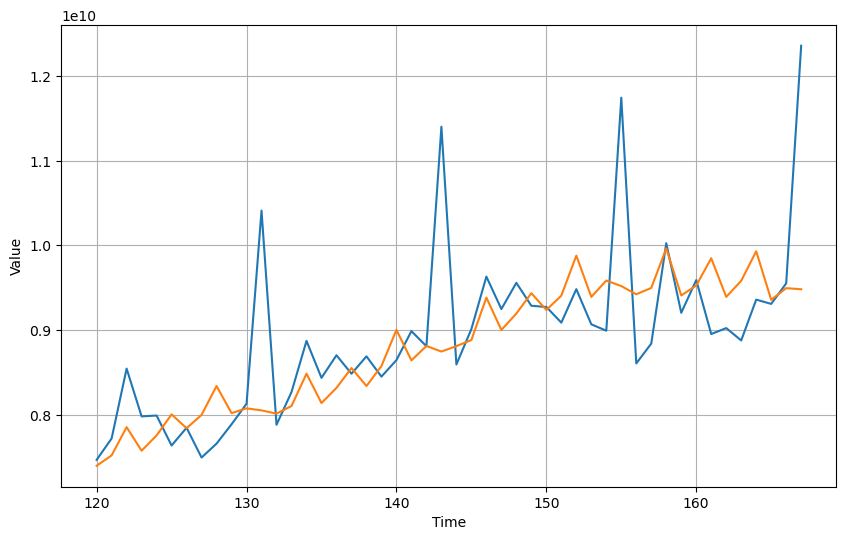

In [525]:
forecast = model_forecast(model, series[..., np.newaxis], window_size)
results = forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [526]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.05972721771515993


In [527]:
cnn_forecast_2 = forecast
cnn_test_pred_2 = results

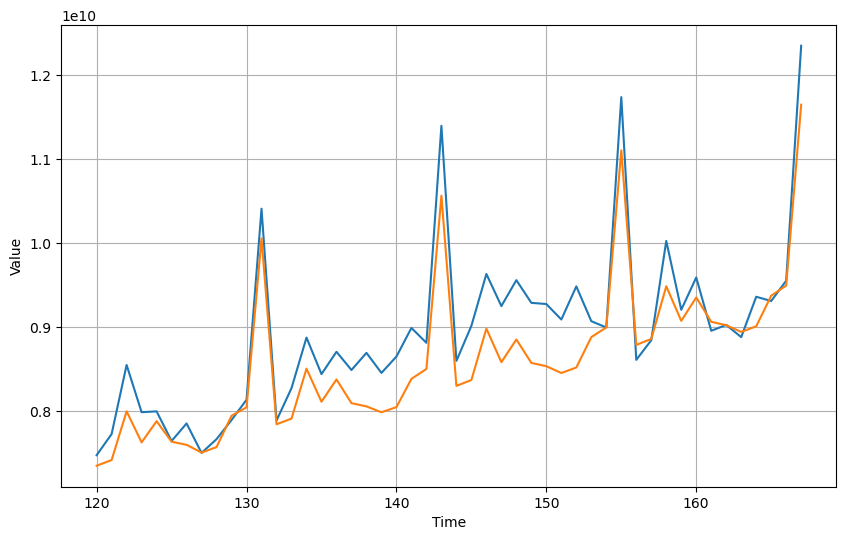

In [528]:
# SARIMAX
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, sarimax_test_pred)

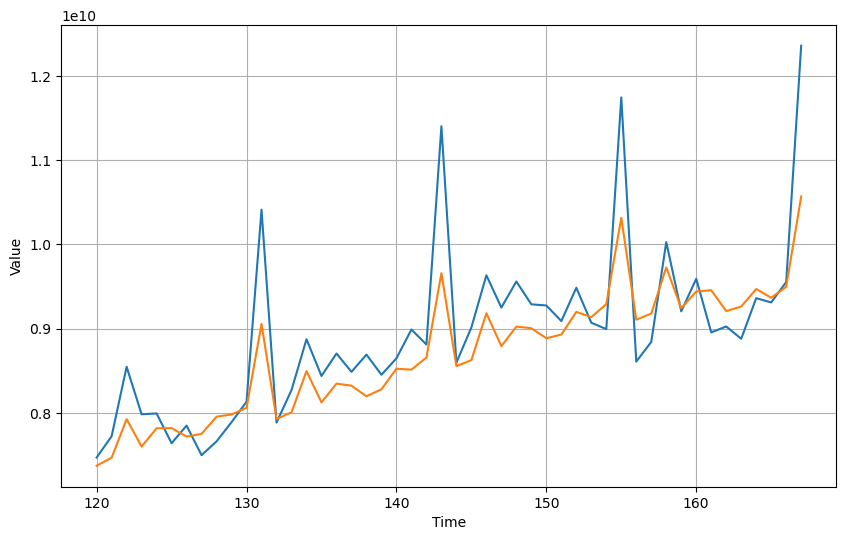

In [529]:
# SARIMAX CNN2 average
cnn_sarimax_2 = np.stack((cnn_test_pred_2, sarimax_test_pred))
cnn_sarimax_ave_test_pred_2 = np.mean(cnn_sarimax_2, axis=0)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, cnn_sarimax_ave_test_pred_2)

In [530]:
# MAPE
print('CNN 2 MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_test_pred_2))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('CNN 2 SARIMAX AVERAGE MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_sarimax_ave_test_pred_2))

CNN 2 MAPE:
0.050648839335217244
SARIMAX MAPE:
0.0382686725025465
CNN 2 SARIMAX AVERAGE MAPE:
0.038736805521627185


In [531]:
# SARIMAXとCNN2の平均のMAPEは、CNN2単体よりも改善したが、SARIMAXより悪化した。
# SARIMAXは12月の売上の上昇などの季節性トレンドを把握できているが、平時は微妙。
# 一方でCNNは平時の予想ができているが、季節性トレンドまでは把握できず。
# 変動が小さい時はCNNに重みを、変動が大きい時はSARIMAXに重みを大きくつければ、予測精度はより向上すると考えられる。

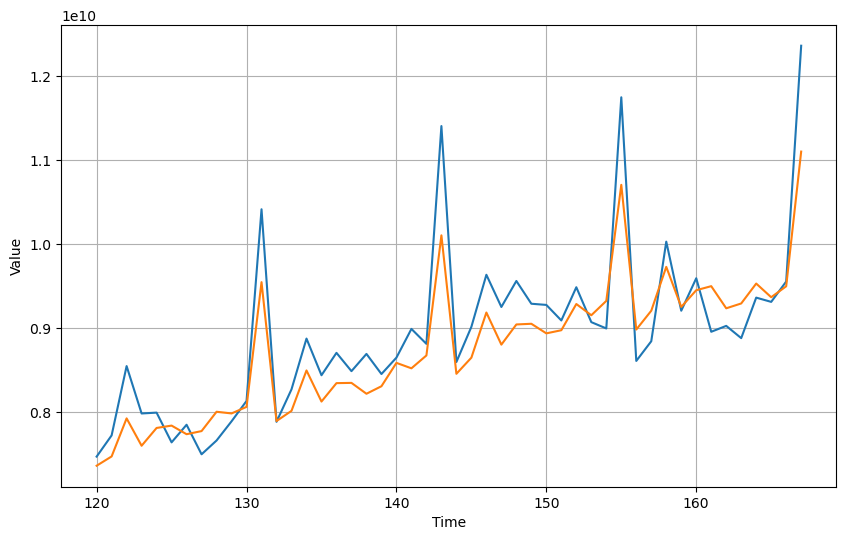

In [532]:
# b*SARIMAX+c*CNN2

cnn_deviation_weighted_test_pred_2 = np.array(b*sarimax_test_pred+c*cnn_test_pred_2)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, cnn_deviation_weighted_test_pred_2)

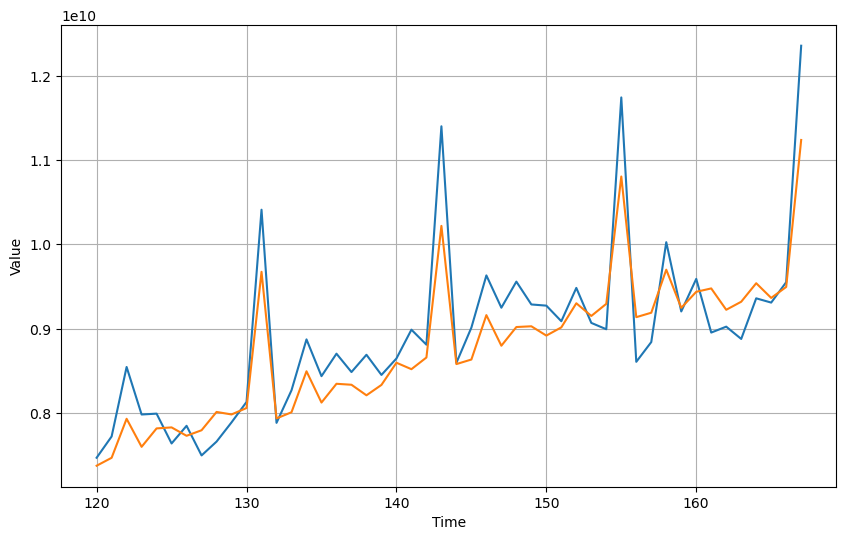

In [533]:
# e*SARIMAX+f*CNN2
cnn_diff_moving_average_test_pred_2 = np.array(e*sarimax_test_pred+f*cnn_test_pred_2)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, cnn_diff_moving_average_test_pred_2)

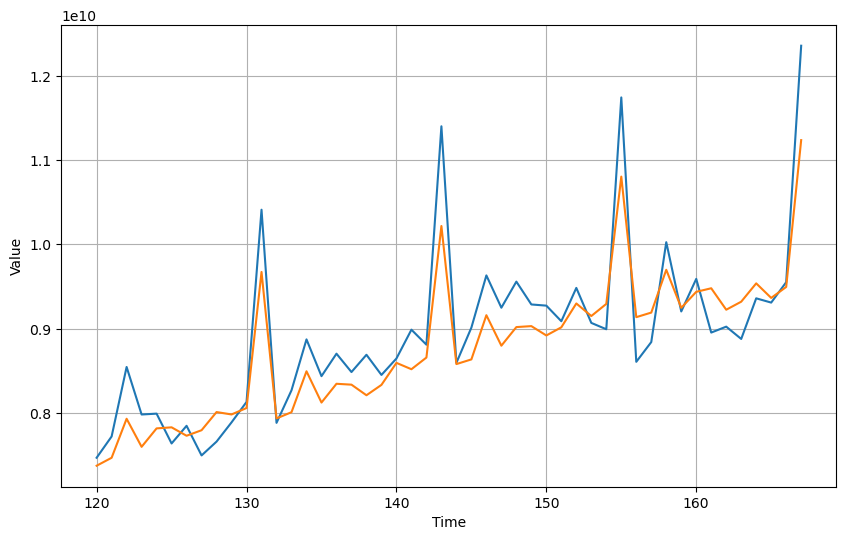

In [534]:
# g*SARIMAX+h*CNN2
cnn_seasonal_trend_test_pred_2 = np.array(g*sarimax_test_pred+h*cnn_test_pred_2)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, cnn_seasonal_trend_test_pred_2)

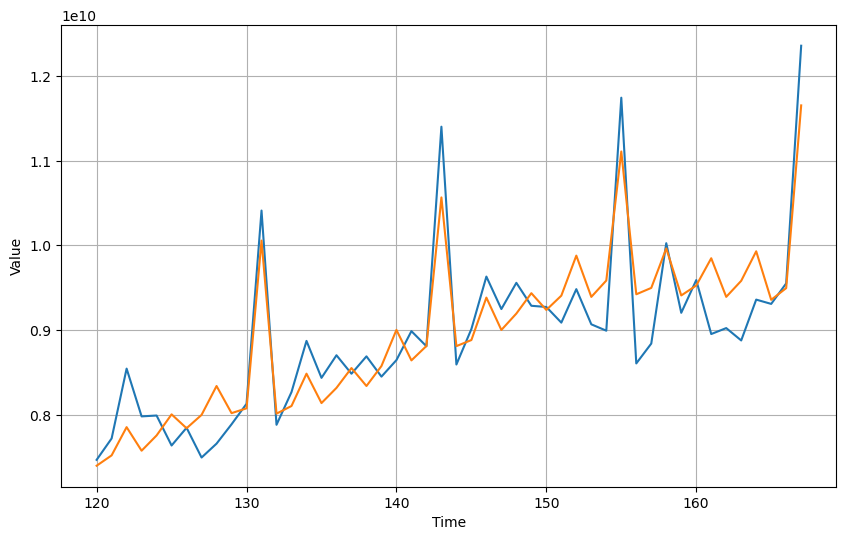

In [535]:
# 単純に12月だけSARIMAX、それ以外をCNN2としてやってみる

# RNNの12月以外の各値
cnn_test_pred_1_11_2 = cnn_test_pred_2.reshape(4,12)[:, 0:11]

# 1月-11月がRNN , 12月がSARIMAX
cnn_1_11_sarimax_12_test_pred_2 =np.ravel(np.append(cnn_test_pred_1_11_2, sarimax_test_pred_12, axis=1))

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, cnn_1_11_sarimax_12_test_pred_2)

In [536]:
# MAPE
print('CNN 2 MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_test_pred_2))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('CNN 2 SARIMAX Average MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_sarimax_ave_test_pred_2))
print('CNN 2 SARIMAX Deviation weighted MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_deviation_weighted_test_pred_2))
print('CNN 2 SARIMAX Diff Moving Average MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_diff_moving_average_test_pred_2))
print('CNN 2 SARIMAX Seasonal Trend MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_seasonal_trend_test_pred_2))
print('CNN 2 1-11 SARIMAX 12 MAPE:')
print(mean_absolute_percentage_error(x_valid, cnn_1_11_sarimax_12_test_pred_2))

CNN 2 MAPE:
0.050648839335217244
SARIMAX MAPE:
0.0382686725025465
CNN 2 SARIMAX Average MAPE:
0.038736805521627185
CNN 2 SARIMAX Deviation weighted MAPE:
0.03496672901525596
CNN 2 SARIMAX Diff Moving Average MAPE:
0.03433596324540906
CNN 2 SARIMAX Seasonal Trend MAPE:
0.03434564924017056
CNN 2 1-11 SARIMAX 12 MAPE:
0.036844239087566816


In [546]:
#  DNN(reluでやり直す)

In [547]:
%%time
# ReLU・エポック数500
# split_by_120/DNN_ReLU_1

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):

  model = Sequential()
  model.add(Dense(units=hp.Int('units1', min_value=2, max_value=30, step=4), input_shape=[window_size], activation='relu'))
  model.add(Dense(units=hp.Int('units2', min_value=2, max_value=30, step=4), activation='relu'))
  model.add(Dense(1))

  model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[0.5, 0.7, 0.9]), lr=1e-5))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=60, executions_per_trial=3, directory='split_by_120', project_name='DNN_ReLU_1')

tuner.search_space_summary()

tuner.search(dataset, epochs=500, verbose=0)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Search space summary
Default search space size: 3
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 30, 'step': 4, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 30, 'step': 4, 'sampling': None}
momentum (Choice)
{'default': 0.5, 'conditions': [], 'values': [0.5, 0.7, 0.9], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
CPU times: user 51min 6s, sys: 7min 12s, total: 58min 19s
Wall time: 48min 55s


In [548]:
tuner.results_summary()

Results summary
Results in split_by_120/DNN_ReLU_1
Showing 10 best trials
Trial summary
Hyperparameters:
units1: 30
units2: 10
momentum: 0.9
Score: 5.064099152882894
Trial summary
Hyperparameters:
units1: 22
units2: 6
momentum: 0.7
Score: 5.161929130554199
Trial summary
Hyperparameters:
units1: 22
units2: 22
momentum: 0.9
Score: 5.259281476338704
Trial summary
Hyperparameters:
units1: 26
units2: 26
momentum: 0.7
Score: 5.406042575836182
Trial summary
Hyperparameters:
units1: 14
units2: 26
momentum: 0.5
Score: 5.415865262349446
Trial summary
Hyperparameters:
units1: 18
units2: 22
momentum: 0.9
Score: 5.43685261408488
Trial summary
Hyperparameters:
units1: 26
units2: 18
momentum: 0.9
Score: 5.46015469233195
Trial summary
Hyperparameters:
units1: 18
units2: 14
momentum: 0.5
Score: 5.499372482299805
Trial summary
Hyperparameters:
units1: 18
units2: 6
momentum: 0.5
Score: 5.506455898284912
Trial summary
Hyperparameters:
units1: 30
units2: 18
momentum: 0.9
Score: 5.521748224894206


In [550]:
%%time
# units1: 30
# units2: 10
# momentum: 0.9

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(30, input_shape=[window_size], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500
4/4 [==============================] - 3s 558ms/step - loss: 18.8103
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 9.7005
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 13.5096
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 8.6839
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 13.6586
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 10.1645
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 10.7180
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 10.7450
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 8.3878
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 9.2802
Epoch 11/500
4/4 [==============================] - 0s 5ms/step - loss: 9.1102
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 7.5957
Epoch 13/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 3.8816
Epoch 207/500
4/4 [==============================] - 0s 6ms/step - loss: 3.8085
Epoch 208/500
4/4 [==============================] - 0s 8ms/step - loss: 3.9628
Epoch 209/500
4/4 [==============================] - 0s 4ms/step - loss: 4.4612
Epoch 210/500
4/4 [==============================] - 0s 4ms/step - loss: 5.9478
Epoch 211/500
4/4 [==============================] - 0s 6ms/step - loss: 3.7028
Epoch 212/500
4/4 [==============================] - 0s 3ms/step - loss: 3.8564
Epoch 213/500
4/4 [==============================] - 0s 4ms/step - loss: 4.4078
Epoch 214/500
4/4 [==============================] - 0s 4ms/step - loss: 4.3315
Epoch 215/500
4/4 [==============================] - 0s 3ms/step - loss: 4.6188
Epoch 216/500
4/4 [==============================] - 0s 3ms/step - loss: 4.0798
Epoch 217/500
4/4 [==============================] - 0s 6ms/step - loss: 4.5921
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 8ms/step - loss: 3.0412
Epoch 411/500
4/4 [==============================] - 0s 4ms/step - loss: 3.0779
Epoch 412/500
4/4 [==============================] - 0s 7ms/step - loss: 2.9996
Epoch 413/500
4/4 [==============================] - 0s 4ms/step - loss: 4.3788
Epoch 414/500
4/4 [==============================] - 0s 3ms/step - loss: 3.0436
Epoch 415/500
4/4 [==============================] - 0s 8ms/step - loss: 3.5483
Epoch 416/500
4/4 [==============================] - 0s 3ms/step - loss: 3.3252
Epoch 417/500
4/4 [==============================] - 0s 3ms/step - loss: 3.1586
Epoch 418/500
4/4 [==============================] - 0s 4ms/step - loss: 3.5434
Epoch 419/500
4/4 [==============================] - 0s 5ms/step - loss: 3.7640
Epoch 420/500
4/4 [==============================] - 0s 5ms/step - loss: 3.1991
Epoch 421/500
4/4 [==============================] - 0s 3ms/step - loss: 3.2825
Epoch 422/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 50ms/step


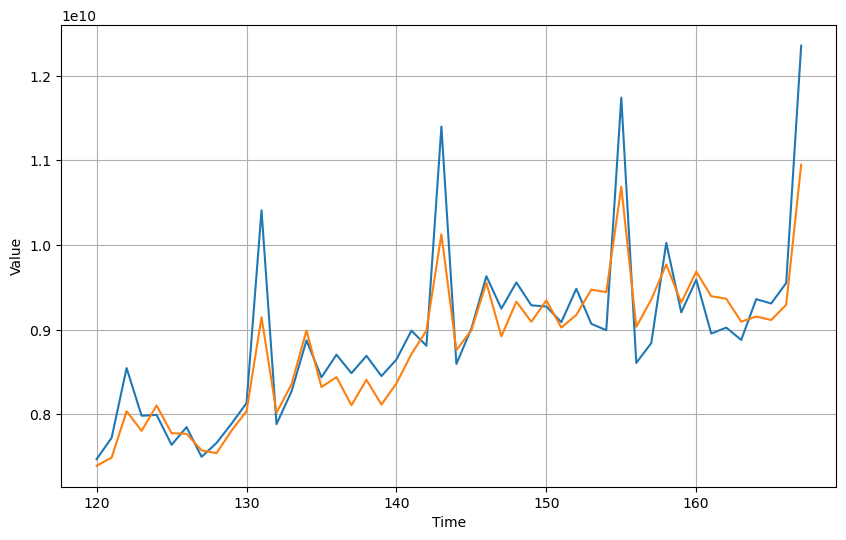

In [551]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [552]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.0317311405543211


In [553]:
dnn_forecast_2 = forecast
dnn_train_pred_2 = train_pred
dnn_test_pred_2 = test_pred

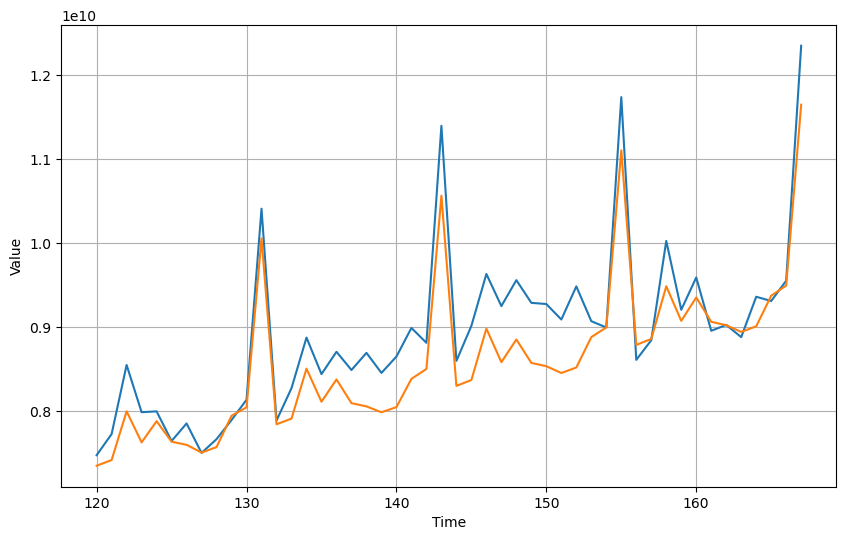

In [554]:
# SARIMAX
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, sarimax_test_pred)

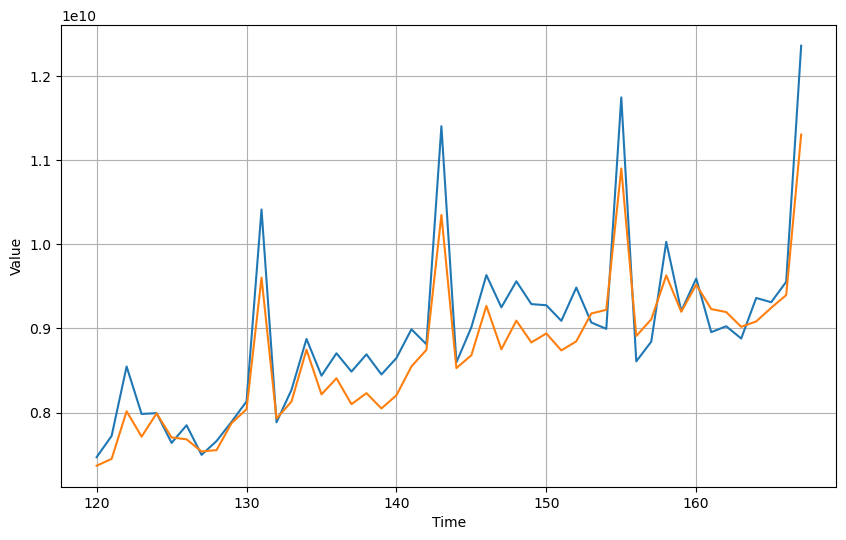

In [555]:
# SARIMAX DNN2 average
dnn_sarimax_2 = np.stack((dnn_test_pred_2, sarimax_test_pred))
dnn_sarimax_ave_test_pred_2 = np.mean(dnn_sarimax_2, axis=0)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_sarimax_ave_test_pred_2)

In [556]:
# MAPE
print('DNN 2 MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_test_pred_2))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('DNN 2 SARIMAX AVERAGE MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_sarimax_ave_test_pred_2))

DNN 2 MAPE:
0.0317311405543211
SARIMAX MAPE:
0.0382686725025465
DNN 2 SARIMAX AVERAGE MAPE:
0.03191137155856096


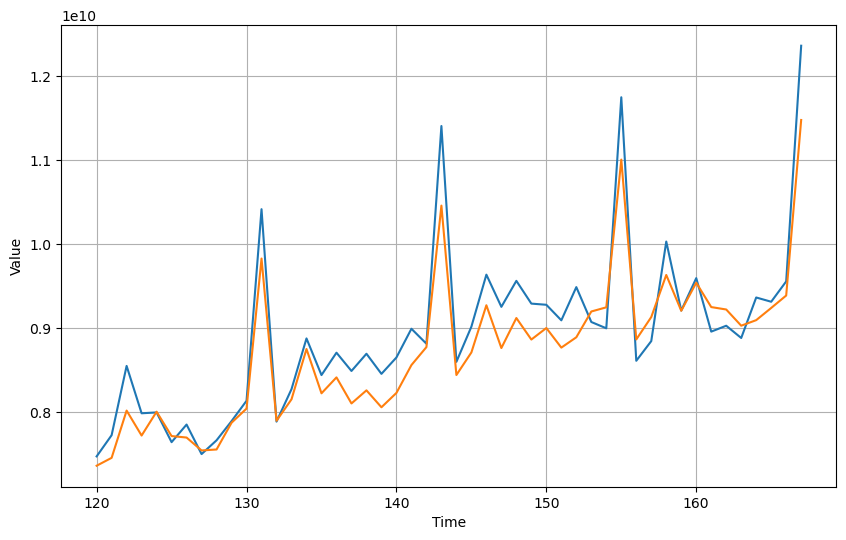

In [558]:
# b*SARIMAX+c*DNN2

dnn_deviation_weighted_test_pred_2 = np.array(b*sarimax_test_pred+c*dnn_test_pred_2)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_deviation_weighted_test_pred_2)

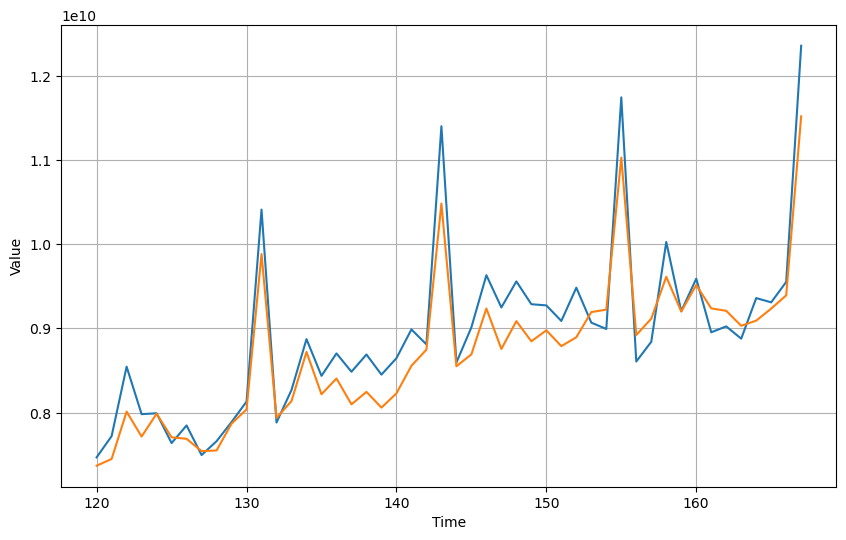

In [559]:
# e*SARIMAX+f*DNN2
dnn_diff_moving_average_test_pred_2 = np.array(e*sarimax_test_pred+f*dnn_test_pred_2)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_diff_moving_average_test_pred_2)

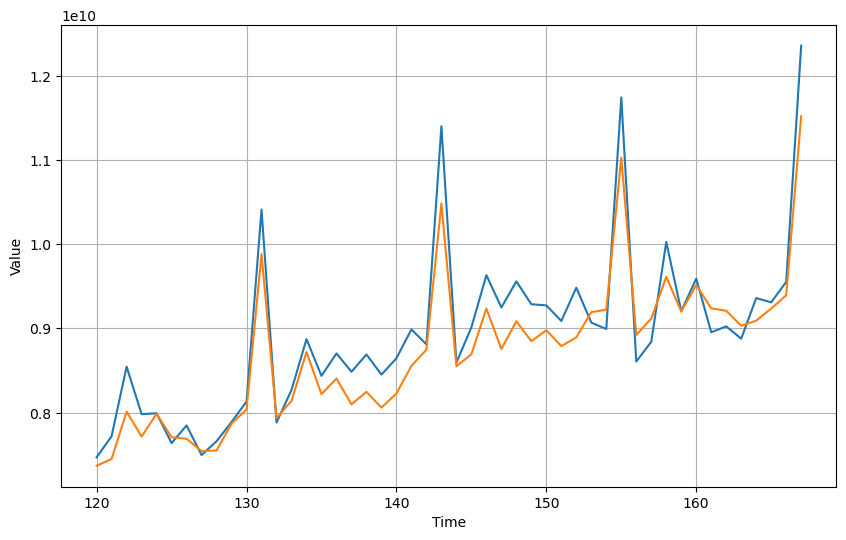

In [560]:
# g*SARIMAX+h*DNN2
dnn_seasonal_trend_test_pred_2 = np.array(g*sarimax_test_pred+h*dnn_test_pred_2)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_seasonal_trend_test_pred_2)

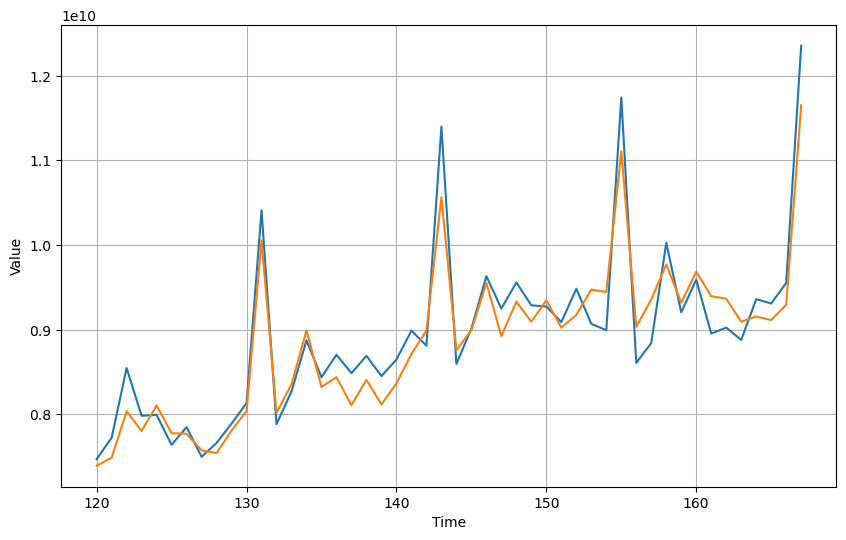

In [562]:
# 単純に12月だけSARIMAX、それ以外をDNN2としてやってみる

# DNN2の12月以外の各値
dnn_test_pred_1_11_2 = dnn_test_pred_2.reshape(4,12)[:, 0:11]

# 1月-11月がDNN2 , 12月がSARIMAX
dnn_1_11_sarimax_12_test_pred_2 =np.ravel(np.append(dnn_test_pred_1_11_2, sarimax_test_pred_12, axis=1))

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_1_11_sarimax_12_test_pred_2)

In [563]:
# MAPE
print('DNN 2 MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_test_pred_2))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('DNN 2 SARIMAX Average MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_sarimax_ave_test_pred_2))
print('DNN 2 SARIMAX Deviation weighted MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_deviation_weighted_test_pred_2))
print('DNN 2 SARIMAX Diff Moving Average MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_diff_moving_average_test_pred_2))
print('DNN 2 SARIMAX Seasonal Trend MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_seasonal_trend_test_pred_2))
print('DNN 2 1-11 SARIMAX 12 MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_1_11_sarimax_12_test_pred_2))

DNN 2 MAPE:
0.0317311405543211
SARIMAX MAPE:
0.0382686725025465
DNN 2 SARIMAX Average MAPE:
0.03191137155856096
DNN 2 SARIMAX Deviation weighted MAPE:
0.030300756513374345
DNN 2 SARIMAX Diff Moving Average MAPE:
0.03025637232944317
DNN 2 SARIMAX Seasonal Trend MAPE:
0.030262176871359403
DNN 2 1-11 SARIMAX 12 MAPE:
0.027179044296157247


In [564]:
# 組み合わせのロジックでミスがあった気がするのでやり直し

In [565]:
# 月ごとの平均の先月比売上変動率
# average_monthly_volatility：[[1月の先月売上比],[2月の先月売上比],[3月の先月売上比], ....]

volatility_list = []
for time in range(len(x_train)-12):
    volatility_list.append(x_train[time+12] / x_train[time+11])

variable_ratio = np.array(volatility_list).reshape(9, -1).T
average_monthly_volatility = np.mean(variable_ratio, axis=-1)
average_monthly_volatility

array([0.73621667, 1.03861041, 1.07980835, 0.9419914 , 1.03286418,
       0.96690145, 0.98699062, 0.96551893, 1.01983994, 1.05136349,
       1.03029797, 1.30995599])

In [566]:
# (変動率 - 1)の絶対値    (先月に比べて変動のしやすさのスコア)
a = np.abs(average_monthly_volatility-1)
a

array([0.26378333, 0.03861041, 0.07980835, 0.0580086 , 0.03286418,
       0.03309855, 0.01300938, 0.03448107, 0.01983994, 0.05136349,
       0.03029797, 0.30995599])

In [570]:
# 変動のし易さの偏差値/100
# 0.5未満のとき、他の月と比べて変動しにくい
# 0.5以上のとき、他の月と比べて変動しやすい
b = np.array((50.0+10.0*(a-np.average(a))/np.std(a))/100)
b = np.ravel(np.repeat(b[None, :], 4, axis=0))                # 予想が4年分あるため
b

array([0.69441085, 0.45566259, 0.49934429, 0.47623027, 0.44956993,
       0.44981843, 0.42851812, 0.4512843 , 0.43576047, 0.46918454,
       0.44684901, 0.74336719, 0.69441085, 0.45566259, 0.49934429,
       0.47623027, 0.44956993, 0.44981843, 0.42851812, 0.4512843 ,
       0.43576047, 0.46918454, 0.44684901, 0.74336719, 0.69441085,
       0.45566259, 0.49934429, 0.47623027, 0.44956993, 0.44981843,
       0.42851812, 0.4512843 , 0.43576047, 0.46918454, 0.44684901,
       0.74336719, 0.69441085, 0.45566259, 0.49934429, 0.47623027,
       0.44956993, 0.44981843, 0.42851812, 0.4512843 , 0.43576047,
       0.46918454, 0.44684901, 0.74336719])

In [571]:
c = np.array(1-b)
c

array([0.30558915, 0.54433741, 0.50065571, 0.52376973, 0.55043007,
       0.55018157, 0.57148188, 0.5487157 , 0.56423953, 0.53081546,
       0.55315099, 0.25663281, 0.30558915, 0.54433741, 0.50065571,
       0.52376973, 0.55043007, 0.55018157, 0.57148188, 0.5487157 ,
       0.56423953, 0.53081546, 0.55315099, 0.25663281, 0.30558915,
       0.54433741, 0.50065571, 0.52376973, 0.55043007, 0.55018157,
       0.57148188, 0.5487157 , 0.56423953, 0.53081546, 0.55315099,
       0.25663281, 0.30558915, 0.54433741, 0.50065571, 0.52376973,
       0.55043007, 0.55018157, 0.57148188, 0.5487157 , 0.56423953,
       0.53081546, 0.55315099, 0.25663281])